In [ ]:
!pip install torchextractor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
import torch
import sys
import numpy as np
import pickle as pkl
from os.path import join as oj
from datetime import datetime
import torch.optim as optim
import os
from torch.utils.data import TensorDataset, ConcatDataset, random_split
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score
import argparse
from PIL import Image
from tqdm import tqdm
from torch import nn
from numpy.random import randint
import torchvision.models as models
import time
import copy
import gc
import json
import pandas as pd
import torch
import torchvision.models as models
from torchvision import transforms
from torch.utils.data import DataLoader
from PIL import Image
import torch.nn as nn
import matplotlib.pyplot as plt
import time
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.optim.lr_scheduler import StepLR
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
import torch.nn as nn


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
dir_path = "/content/drive/MyDrive/Masterthesis/Datasets/mnist"

Mounted at /content/drive


In [ ]:
model_path = oj(dir_path, "models", "initial_classifier")
model_training_path = oj(model_path, "training_224")
data_path = oj(dir_path, "data")

## Dataset and Model setup

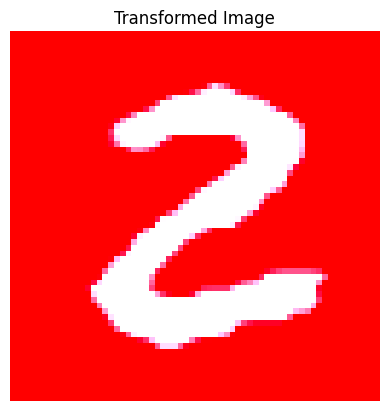

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
'''

image_file_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/train/class_2/2_2.png'


img = Image.open(image_file_path).convert("RGB")


transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for RGB images
])


transformed_img = transform(img)

# Convert the tensor to a NumPy array and transpose
img_np = transformed_img.numpy().transpose((1, 2, 0))

# Display the image
plt.imshow(img_np)
plt.title('Transformed Image')
plt.axis('off')
plt.show()
'''

A data processing class that matches the second version of the customized alexnet mentioned before with 3 RGB channels and 1000 outputs

In [ ]:

import os
import numpy as np
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader, ConcatDataset, random_split
from torchvision import transforms

class MnistDataset(Dataset):
    def __init__(self, path: str = None, is_two: int = None, data_files=None, labels=None, group_labels=None):
        self.resize_shape = (64, 64)  # Target shape for resizing images
        self.transform = transforms.Compose([
            transforms.Resize(self.resize_shape),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for RGB images
        ])

        if path:  # If a path is provided, list all files in the directory and assign the class label
            self.path = path
            self.data_files = os.listdir(self.path)
            self.is_two = is_two
            self.labels = [is_two] * len(self.data_files) if is_two is not None else labels
            self.group_labels = group_labels if group_labels else [None] * len(self.data_files)
        else:  # Otherwise, use provided lists of data files and labels
            self.path = ''
            self.data_files = data_files
            self.labels = labels
            self.group_labels = group_labels if group_labels else [None] * len(data_files)
            self.is_two = is_two

    def __getitem__(self, i):
        # Read in the image
        img = Image.open(os.path.join(self.path, self.data_files[i])).convert("RGB")  # Convert to RGB
        if self.transform:
            img = self.transform(img)  # Apply transformations

        # Determine the label
        is_two = self.is_two if self.is_two is not None else self.labels[i]
        group_label = self.group_labels[i]

        return (img, is_two, group_label)

    def __len__(self):  # Returns the total number of images in the dataset.
        return len(self.data_files)



1. Deep Learning for Image Classification: A Comprehensive Review
(Alzubaidi, Lina, et al. "Review of deep learning: Concepts, CNN architectures, challenges, applications, future directions." Journal of Big Data 8.1 (2021): 53.)
2. Deep Convolutional Neural Networks for Large-Scale Image Recognition
(Krizhevsky, Alex, Ilya Sutskever, and Geoffrey E. Hinton. "Imagenet classification with deep convolutional neural networks." Advances in neural information processing systems 25 (2012): 1097-1105)

Also a custom alexnet but with 1000 outputs as the standard one and 3 input RGB channels and not grayscale like the original one also

In [ ]:
import os
import random
import shutil

def move_images_to_new_folder(source_folder, destination_folder, percentage=20):
    """
    Moves a percentage of images from the source folder to the destination folder.

    Args:
        source_folder (str): Path to the source folder containing images.
        destination_folder (str): Path to the destination folder.
        percentage (int): Percentage of images to move. Default is 20%.
    """
    # Ensure the destination folder exists
    os.makedirs(destination_folder, exist_ok=True)

    # Get all files in the source folder
    image_files = [file for file in os.listdir(source_folder) if file.endswith(('.jpg', '.png', '.jpeg'))]

    # Calculate the number of images to move
    num_images_to_move = int(len(image_files) * (percentage / 100))
    print(f"Processing {source_folder}: Total images: {len(image_files)}. Moving {num_images_to_move} images.")

    # Randomly select images to move
    images_to_move = random.sample(image_files, num_images_to_move)

    # Move each selected image
    for image in images_to_move:
        source_path = os.path.join(source_folder, image)
        destination_path = os.path.join(destination_folder, image)
        shutil.move(source_path, destination_path)
        print(f"Moved: {source_path} -> {destination_path}")

    print(f"Successfully moved {num_images_to_move} images to {destination_folder}.\n")

# Source and destination folder mapping
folder_paths = {
    #'two_no_patch': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_2',
    'zero_no_patch': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0',
    'zero_patch': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/dynamic_patches_left/train/class_0'
}

destination_paths = {
    #'two_no_patch': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/val/class_2',
    'zero_no_patch': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/val/class_0',
    'zero_patch': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/dynamic_patches_left/val/class_0'
}

# Move 20% of images from each folder
#for key in folder_paths.keys():
#    move_images_to_new_folder(folder_paths[key], destination_paths[key], percentage=20)


Processing /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0: Total images: 2961. Moving 592 images.
Moved: /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0/0_2693.png -> /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/val/class_0/0_2693.png
Moved: /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0/0_165.png -> /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/val/class_0/0_165.png
Moved: /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0/0_3541.png -> /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/val/class_0/0_3541.png
Moved: /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0/0_3635.png -> /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/val/class_0/0_3635.png
Moved: /content/drive/MyDrive/

In [ ]:
# Source and destination folder mapping
folder_paths = {
    #'two_no_patch': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_2',
    #'zero_no_patch': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0',
    'zero_patch': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/train/class_0'
}

destination_paths = {
    #'two_no_patch': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/val/class_2',
    #'zero_no_patch': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/val/class_0',
    'zero_patch': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/val/class_0'
}

# Move 20% of images from each folder
#for key in folder_paths.keys():
#    move_images_to_new_folder(folder_paths[key], destination_paths[key], percentage=20)

Processing /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/train/class_0: Total images: 2960. Moving 592 images.
Moved: /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/train/class_0/processed_0_4763.png -> /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/val/class_0/processed_0_4763.png
Moved: /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/train/class_0/processed_0_547.png -> /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/val/class_0/processed_0_547.png
Moved: /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/train/class_0/processed_0_614.png -> /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/val/class_0/processed_0_614.png
Moved: /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/train/class_0/processed_0_5372.png -> /content/drive/MyDrive/Masterthesis/Datasets

In [ ]:
# Source and destination folder mapping
folder_paths = {
    #'two_no_patch': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_2',
    #'zero_no_patch': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0',
    'zero_patch': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/train/class_0'
}

destination_paths = {
    #'two_no_patch': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/val/class_2',
    #'zero_no_patch': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/val/class_0',
    'zero_patch': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/val/class_0'
}

# Move 20% of images from each folder
#for key in folder_paths.keys():
#    move_images_to_new_folder(folder_paths[key], destination_paths[key], percentage=20)

Processing /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/train/class_0: Total images: 2960. Moving 592 images.
Moved: /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/train/class_0/processed_0_3987.png -> /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/val/class_0/processed_0_3987.png
Moved: /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/train/class_0/processed_0_5134.png -> /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/val/class_0/processed_0_5134.png
Moved: /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/train/class_0/processed_0_4798.png -> /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/val/class_0/processed_0_4798.png
Moved: /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/train/class_0/processed_0_4662.png -> /content/drive/MyDrive/Masterthesis/Data

## Function for Training

Another function for training that matches the second custom alexnet with the 3 RGB channels and 1000 outputs

In [ ]:

import torch.optim as optim
import torch.nn.functional as F
import time
import copy
import matplotlib.pyplot as plt
from tqdm import tqdm

def train_model(model, dataloaders, criterion, optimizer, num_epochs=50, resume_training=False, early_stopping=10):
    since = time.time()
    best_accuracy = 0.0
    best_model_wts = copy.deepcopy(model.state_dict())  # Initialize best_model_wts with the current model state

    # Initialize lists to track loss and accuracy
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(1, num_epochs + 1):
        print(f'Epoch {epoch}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels, _ in tqdm(dataloaders[phase]):

                if torch.isnan(inputs).any() or torch.isinf(inputs).any():
                    print("NaN or Inf found in input data!")
                    #continue  # Skip this batch if invalid values are found

                inputs = inputs.to(device)
                labels = labels.to(device)  # No need to convert labels for CrossEntropyLoss

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)  # Use argmax for multi-class classification
                    loss = criterion(outputs, labels)
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc.cpu().numpy())
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc.cpu().numpy())

                if epoch_acc > best_accuracy:
                    best_model_wts = copy.deepcopy(model.state_dict())
                    best_accuracy = epoch_acc
                    print("Saving Best Model with Validation Accuracy: ", epoch_acc.item())

                # Early stopping check
                if early_stopping and early_stopping.check(epoch_loss):
                    print(f"Early stopping triggered at epoch {epoch}")
                    time_elapsed = time.time() - since
                    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
                    print(f'Best Validation Accuracy: {best_accuracy:.4f}')


                    # Load best model weights
                    model.load_state_dict(best_model_wts)
                    return model

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best Validation Accuracy: {best_accuracy:.4f}')

    # Load best model weights
    model.load_state_dict(best_model_wts)

    # Plot the training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

    # Plot the training and validation accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.show()

    return model


## Train

### Original

In [ ]:
#Train
two_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_2'
zero_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0'
#two_bg_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_2'
#zero_bg_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0_half'

#Test
test_two_bg_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/test/class_2'



# Create datasets for training and testing
dataset_two_org = MnistDataset(path=two_org_path, is_two=1, group_labels=[0] * len(os.listdir(two_org_path)))
dataset_zero_org = MnistDataset(path=zero_org_path, is_two=0, group_labels=[2] * len(os.listdir(zero_org_path)))

dataset_test_two_bg = MnistDataset(path=test_two_bg_path, is_two=1, group_labels=[1] * len(os.listdir(test_two_bg_path)))

# Concatenate the training datasets
complete_dataset = ConcatDataset((dataset_zero_org, dataset_two_org))



# Split the dataset into training and validation sets (80% train, 20% val)
train_size = int(0.8 * len(complete_dataset))
val_size = len(complete_dataset) - train_size
train_dataset, val_dataset = random_split(complete_dataset, [train_size, val_size])

# Use the test dataset as is
test_dataset = dataset_test_two_bg

batch_size = 64

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Validate input data
#if not validate_inputs(train_loader):
#    print("Input data contains invalid values.")

dataloaders = {'train': train_loader, 'val': val_loader, 'test': test_loader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset), 'test': len(test_dataset)}

# Print dataset sizes
print("num_train:", dataset_sizes['train'])
print("num_val:", dataset_sizes['val'])
print("num_test:", dataset_sizes['test'])



num_train: 9504
num_val: 2377
num_test: 1032


Epoch 1/10
----------


100%|██████████| 149/149 [01:52<00:00,  1.33it/s]


train Loss: 2.3233 Acc: 0.8941


100%|██████████| 38/38 [00:07<00:00,  5.07it/s]


val Loss: 0.0257 Acc: 0.9891
Saving Best Model with Validation Accuracy:  0.9890618426588137
Epoch 2/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.77it/s]


train Loss: 0.0151 Acc: 0.9960


100%|██████████| 38/38 [00:09<00:00,  4.03it/s]


val Loss: 0.0170 Acc: 0.9954
Saving Best Model with Validation Accuracy:  0.9953723180479597
Epoch 3/10
----------


100%|██████████| 149/149 [00:30<00:00,  4.85it/s]


train Loss: 0.0093 Acc: 0.9979


100%|██████████| 38/38 [00:06<00:00,  5.56it/s]


val Loss: 0.0143 Acc: 0.9962
Saving Best Model with Validation Accuracy:  0.9962137147665124
Epoch 4/10
----------


100%|██████████| 149/149 [00:30<00:00,  4.82it/s]


train Loss: 0.0067 Acc: 0.9988


100%|██████████| 38/38 [00:08<00:00,  4.66it/s]


val Loss: 0.0121 Acc: 0.9975
Saving Best Model with Validation Accuracy:  0.9974758098443416
Epoch 5/10
----------


100%|██████████| 149/149 [00:30<00:00,  4.81it/s]


train Loss: 0.0050 Acc: 0.9994


100%|██████████| 38/38 [00:07<00:00,  4.89it/s]


val Loss: 0.0111 Acc: 0.9975
Epoch 6/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.68it/s]


train Loss: 0.0038 Acc: 0.9998


100%|██████████| 38/38 [00:07<00:00,  5.06it/s]


val Loss: 0.0102 Acc: 0.9975
Epoch 7/10
----------


100%|██████████| 149/149 [00:32<00:00,  4.62it/s]


train Loss: 0.0032 Acc: 0.9999


100%|██████████| 38/38 [00:08<00:00,  4.62it/s]


val Loss: 0.0104 Acc: 0.9975
Epoch 8/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.76it/s]


train Loss: 0.0025 Acc: 1.0000


100%|██████████| 38/38 [00:07<00:00,  4.76it/s]


val Loss: 0.0096 Acc: 0.9975
Epoch 9/10
----------


100%|██████████| 149/149 [00:30<00:00,  4.83it/s]


train Loss: 0.0022 Acc: 0.9999


100%|██████████| 38/38 [00:06<00:00,  5.55it/s]


val Loss: 0.0101 Acc: 0.9975
Epoch 10/10
----------


100%|██████████| 149/149 [00:30<00:00,  4.85it/s]


train Loss: 0.0019 Acc: 1.0000


100%|██████████| 38/38 [00:08<00:00,  4.53it/s]


val Loss: 0.0088 Acc: 0.9975
Training complete in 7m 52s
Best Validation Accuracy: 0.9975


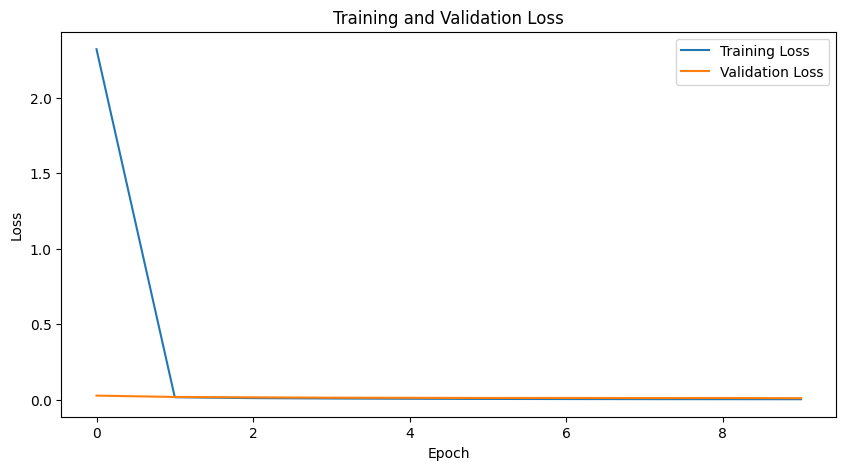

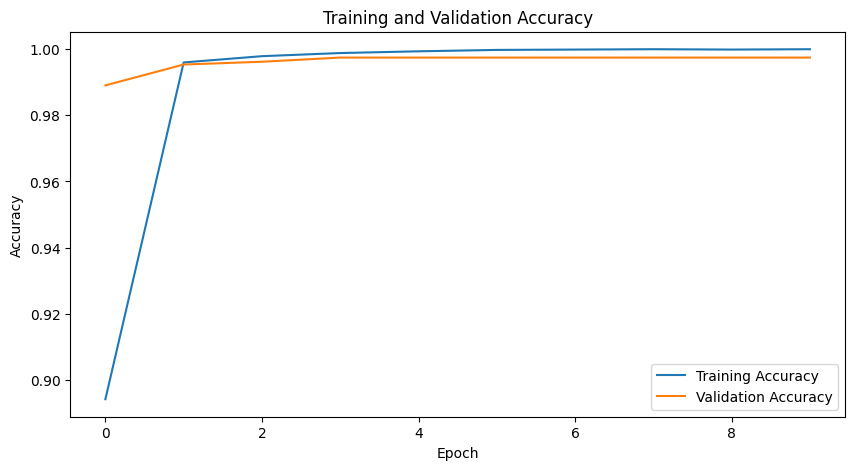

Epoch 1/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.66it/s]


train Loss: 1.7080 Acc: 0.9087


100%|██████████| 38/38 [00:08<00:00,  4.73it/s]


val Loss: 0.0166 Acc: 0.9954
Saving Best Model with Validation Accuracy:  0.9953723180479597
Epoch 2/10
----------


100%|██████████| 149/149 [00:32<00:00,  4.65it/s]


train Loss: 0.0111 Acc: 0.9972


100%|██████████| 38/38 [00:07<00:00,  5.41it/s]


val Loss: 0.0129 Acc: 0.9958
Saving Best Model with Validation Accuracy:  0.995793016407236
Epoch 3/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.67it/s]


train Loss: 0.0073 Acc: 0.9985


100%|██████████| 38/38 [00:08<00:00,  4.36it/s]


val Loss: 0.0115 Acc: 0.9962
Saving Best Model with Validation Accuracy:  0.9962137147665124
Epoch 4/10
----------


100%|██████████| 149/149 [00:32<00:00,  4.58it/s]


train Loss: 0.0055 Acc: 0.9988


100%|██████████| 38/38 [00:08<00:00,  4.61it/s]


val Loss: 0.0112 Acc: 0.9962
Epoch 5/10
----------


100%|██████████| 149/149 [00:32<00:00,  4.64it/s]


train Loss: 0.0041 Acc: 0.9997


100%|██████████| 38/38 [00:07<00:00,  5.33it/s]


val Loss: 0.0105 Acc: 0.9962
Epoch 6/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.72it/s]


train Loss: 0.0032 Acc: 0.9998


100%|██████████| 38/38 [00:08<00:00,  4.48it/s]


val Loss: 0.0095 Acc: 0.9962
Epoch 7/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.69it/s]


train Loss: 0.0027 Acc: 0.9999


100%|██████████| 38/38 [00:08<00:00,  4.61it/s]


val Loss: 0.0092 Acc: 0.9971
Saving Best Model with Validation Accuracy:  0.9970551114850652
Epoch 8/10
----------


100%|██████████| 149/149 [00:32<00:00,  4.58it/s]


train Loss: 0.0022 Acc: 1.0000


100%|██████████| 38/38 [00:07<00:00,  5.13it/s]


val Loss: 0.0091 Acc: 0.9962
Epoch 9/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.73it/s]


train Loss: 0.0019 Acc: 1.0000


100%|██████████| 38/38 [00:08<00:00,  4.74it/s]


val Loss: 0.0091 Acc: 0.9962
Epoch 10/10
----------


100%|██████████| 149/149 [00:30<00:00,  4.90it/s]


train Loss: 0.0016 Acc: 1.0000


100%|██████████| 38/38 [00:07<00:00,  5.30it/s]


val Loss: 0.0087 Acc: 0.9971
Training complete in 6m 37s
Best Validation Accuracy: 0.9971


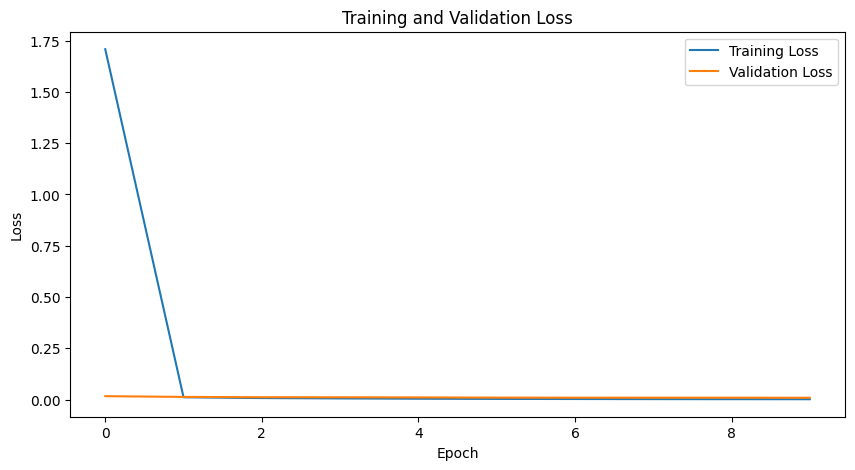

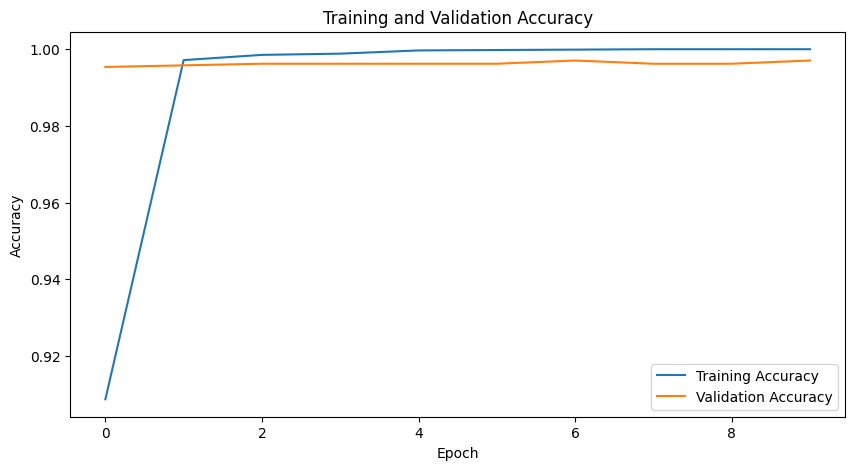

Epoch 1/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.67it/s]


train Loss: 1.6735 Acc: 0.8956


100%|██████████| 38/38 [00:08<00:00,  4.56it/s]


val Loss: 0.0191 Acc: 0.9937
Saving Best Model with Validation Accuracy:  0.993689524610854
Epoch 2/10
----------


100%|██████████| 149/149 [00:32<00:00,  4.64it/s]


train Loss: 0.0123 Acc: 0.9958


100%|██████████| 38/38 [00:07<00:00,  5.17it/s]


val Loss: 0.0135 Acc: 0.9971
Saving Best Model with Validation Accuracy:  0.9970551114850652
Epoch 3/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.69it/s]


train Loss: 0.0079 Acc: 0.9979


100%|██████████| 38/38 [00:08<00:00,  4.69it/s]


val Loss: 0.0121 Acc: 0.9958
Epoch 4/10
----------


100%|██████████| 149/149 [00:32<00:00,  4.59it/s]


train Loss: 0.0056 Acc: 0.9987


100%|██████████| 38/38 [00:08<00:00,  4.42it/s]


val Loss: 0.0099 Acc: 0.9979
Saving Best Model with Validation Accuracy:  0.9978965082036181
Epoch 5/10
----------


100%|██████████| 149/149 [00:32<00:00,  4.57it/s]


train Loss: 0.0041 Acc: 0.9995


100%|██████████| 38/38 [00:07<00:00,  4.97it/s]


val Loss: 0.0093 Acc: 0.9983
Saving Best Model with Validation Accuracy:  0.9983172065628945
Epoch 6/10
----------


100%|██████████| 149/149 [00:32<00:00,  4.53it/s]


train Loss: 0.0031 Acc: 0.9996


100%|██████████| 38/38 [00:07<00:00,  5.14it/s]


val Loss: 0.0101 Acc: 0.9979
Epoch 7/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.78it/s]


train Loss: 0.0026 Acc: 1.0000


100%|██████████| 38/38 [00:08<00:00,  4.62it/s]


val Loss: 0.0086 Acc: 0.9983
Epoch 8/10
----------


100%|██████████| 149/149 [00:30<00:00,  4.88it/s]


train Loss: 0.0021 Acc: 1.0000


100%|██████████| 38/38 [00:07<00:00,  5.26it/s]


val Loss: 0.0084 Acc: 0.9983
Epoch 9/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.80it/s]


train Loss: 0.0018 Acc: 1.0000


100%|██████████| 38/38 [00:07<00:00,  4.81it/s]


val Loss: 0.0084 Acc: 0.9979
Epoch 10/10
----------


100%|██████████| 149/149 [00:30<00:00,  4.93it/s]


train Loss: 0.0016 Acc: 1.0000


100%|██████████| 38/38 [00:07<00:00,  5.06it/s]


val Loss: 0.0086 Acc: 0.9983
Training complete in 6m 35s
Best Validation Accuracy: 0.9983


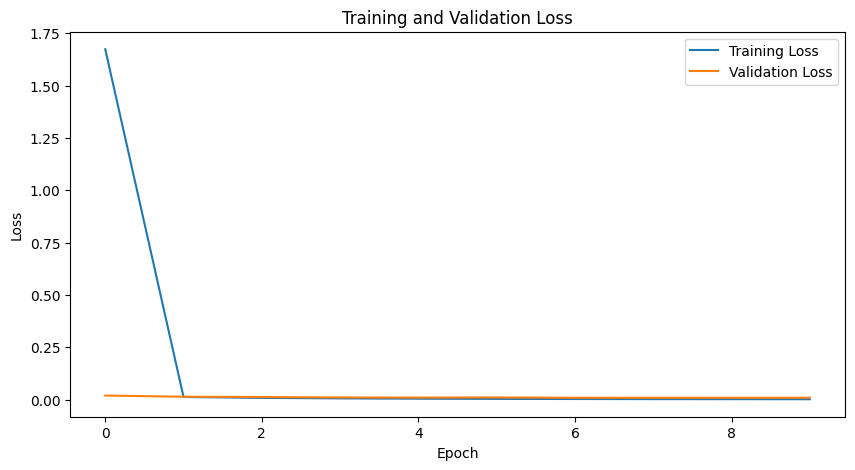

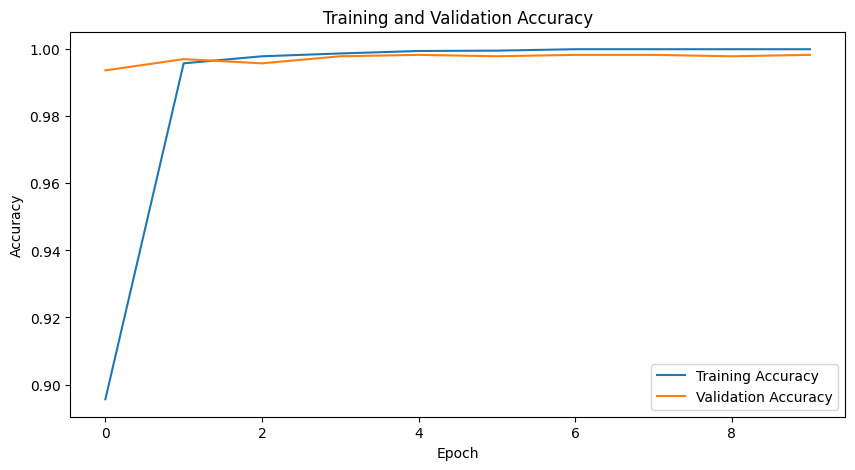

In [ ]:
def initialize_weights(model):
    for m in model.modules():
        if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
            nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)


class Args:
    def __init__(self, seed):
        self.batch_size = 64 #16
        self.epochs = 10
        self.lr = 0.0001  # Lower the learning rate
        self.momentum = 0.9
        self.seed = seed
        self.regularizer_rate = 0.0
        #self.dropout_rate = 0.7

seeds = [1, 11, 111]

for seed in seeds:
    args = Args(seed)

    # Set random seed for reproducibility
    torch.manual_seed(args.seed)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Initialize model, optimizer, and loss function
    model = AlexNet().to(device)
    initialize_weights(model)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum, weight_decay=0.0005)
    criterion = nn.CrossEntropyLoss()  # Change to CrossEntropyLoss for multi-class classification

    model = train_model(model, dataloaders, criterion, optimizer, num_epochs=args.epochs, resume_training=False)
    pid = datetime.now().strftime('%Y%m%d%H%M%S')
    torch.save(model.state_dict(), os.path.join(dir_path, model_path, f"alexnet_mnist_org_cl0_cl2_{seed}" + "train.pt"))

In [ ]:
#model = train_model(model, dataloaders, criterion, optimizer, num_epochs=args.epochs, resume_training=False)
#pid = datetime.now().strftime('%Y%m%d%H%M%S')
#torch.save(model.state_dict(), os.path.join(dir_path, model_path, f"alexnet_mnist_org_cl0_cl2_1" + "train.pt"))

### Background




In [ ]:
import os

def count_images(folder_path):
    return len([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

folder1 = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0'
folder2 = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/train/class_0'
folder3 = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_2'
folder4 = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/test/class_2'
folder5 = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/dynamic_patches_left/test/class_2'

count1 = count_images(folder1)
count2 = count_images(folder2)
count3 = count_images(folder3)
count4 = count_images(folder4)
count5 = count_images(folder5)

print(f"original/train/class_0_half '{folder1}': {count1}")
print(f"ackground/train/class_0 '{folder2}': {count2}")
print(f"original/train/class_2 '{folder3}': {count3}")
print(f"background/test/class_2 '{folder4}': {count4}")
print(f"background/test/class_0 '{folder5}': {count5}")


original/train/class_0_half '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0': 2369
ackground/train/class_0 '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/train/class_0': 2368
original/train/class_2 '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_2': 4767
background/test/class_2 '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/test/class_2': 1032
background/test/class_0 '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/dynamic_patches_left/test/class_2': 1032


In [ ]:
#Train
two_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_2' #train
zero_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0' #train
two_bg_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/train/class_2'
zero_bg_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/train/class_0' #train

#Test
test_two_bg_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/test/class_2'


# Create datasets for training and testing
dataset_two_org = MnistDataset(path=two_org_path, is_two=1, group_labels=[0] * len(os.listdir(two_org_path)))
dataset_zero_org = MnistDataset(path=zero_org_path, is_two=0, group_labels=[2] * len(os.listdir(zero_org_path)))
#dataset_two_bg = MnistDataset(path=two_bg_path, is_two=1, group_labels=[1] * len(os.listdir(two_bg_path)))
dataset_zero_bg = MnistDataset(path=zero_bg_path, is_two=0, group_labels=[3] * len(os.listdir(zero_bg_path)))
dataset_test_two_bg = MnistDataset(path=test_two_bg_path, is_two=1, group_labels=[1] * len(os.listdir(test_two_bg_path)))

# Concatenate the training datasets
complete_dataset = ConcatDataset((dataset_zero_org, dataset_zero_bg, dataset_two_org))
train_dataset = complete_dataset
############




val_two_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/val/class_2'
val_zero_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/val/class_0'
val_zero_bg_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/val/class_0'

val_dataset_two_org = MnistDataset(path=val_two_org_path, is_two=1, group_labels=[0] * len(os.listdir(val_two_org_path)))
val_dataset_zero_org = MnistDataset(path=val_zero_org_path, is_two=0, group_labels=[2] * len(os.listdir(val_zero_org_path)))
val_dataset_zero_bg = MnistDataset(path=val_zero_bg_path, is_two=0, group_labels=[3] * len(os.listdir(val_zero_bg_path)))

val_dataset = ConcatDataset((val_dataset_zero_org, val_dataset_zero_bg, val_dataset_two_org))

# Use the test dataset as is
test_dataset = dataset_test_two_bg

batch_size = 128

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Validate input data
#if not validate_inputs(train_loader):
#    print("Input data contains invalid values.")

dataloaders = {'train': train_loader, 'val': val_loader, 'test': test_loader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset), 'test': len(test_dataset)}

# Print dataset sizes
print("num_train:", dataset_sizes['train'])
print("num_val:", dataset_sizes['val'])
print("num_test:", dataset_sizes['test'])



num_train: 9504
num_val: 2079
num_test: 1032


In [ ]:
from torchvision import models
import torch
import torch.nn as nn
import torch.optim as optim
from datetime import datetime
import os

# Function for early stopping
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None

    def check(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
        return self.counter >= self.patience


# Define arguments
class Args:
    def __init__(self, seed):
        self.batch_size = 128
        self.epochs = 50  # Increase epochs to allow fine-tuning
        self.lr = 0.001
        self.momentum = 0.9
        self.seed = seed
        self.regularizer_rate = 0.0


# Class weight calculation based on dataset sizes
def calculate_manual_class_weights(dataset_zero_org_size, dataset_zero_fg_size, dataset_two_org_size):
    total_samples = dataset_zero_org_size + dataset_zero_fg_size + dataset_two_org_size

    # Number of classes: 2 (Class 0 and Class 2)
    num_classes = 2

    # Manual class counts
    class_0_count = dataset_zero_org_size + dataset_zero_fg_size
    class_2_count = dataset_two_org_size

    # Calculate weights
    weight_class_0 = total_samples / (num_classes * class_0_count)
    weight_class_2 = total_samples / (num_classes * class_2_count)

    return torch.tensor([weight_class_0, weight_class_2])


# Loop through seeds
seeds = [1, 11, 111]
for seed in seeds:
    args = Args(seed)

    # Set random seed for reproducibility
    torch.manual_seed(seed)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Manually calculate class weights
    dataset_zero_org_size = len(os.listdir(zero_org_path))
    dataset_zero_bg_size = len(os.listdir(zero_bg_path))
    dataset_two_org_size = len(os.listdir(two_org_path))
    weights = calculate_manual_class_weights(dataset_zero_org_size, dataset_zero_bg_size, dataset_two_org_size).to(device)

    # Initialize pretrained AlexNet model
    model = models.alexnet(pretrained=True)
    #model.features[0] = nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2)  # Adjust input layer for 1-channel grayscale
    model.classifier[-1] = nn.Linear(4096, 2)  # Update for 10 MNIST classes


    # Freeze convolutional layers
    for param in model.features.parameters():
        param.requires_grad = False
    model.to(device)
    regularizer_rate = args.regularizer_rate
    num_epochs = args.epochs
    params_to_update = model.parameters()
    # Define optimizer, criterion, and learning rate scheduler
    #optimizer = optim.SGD([
        #{'params': model.features.parameters(), 'lr': 0.0001},  # Lower learning rate for convolutional layers
        #{'params': model.classifier.parameters(), 'lr': args.lr},
    #], momentum=args.momentum, weight_decay=0.0005)
    optimizer = optim.SGD(params_to_update, lr=args.lr, momentum=args.momentum, weight_decay=args.regularizer_rate)

    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
    class_weights = torch.tensor([2.0, 1.0])
    weights_tensor = class_weights.to(device)
    criterion = nn.CrossEntropyLoss()

    # Early stopping
    early_stopping = EarlyStopping(patience=10)

    # Train the model
    model = train_model(model, dataloaders, criterion, optimizer, num_epochs=args.epochs, resume_training=False, early_stopping=early_stopping)

    # Save the trained model
    parent_dir = "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/"

    pid = datetime.now().strftime('%Y%m%d%H%M%S')
    save_path = os.path.join(parent_dir, f"alexnet_mnist_bg_seed_{seed}.pt")
    #os.makedirs(os.path.dirname(save_path), exist_ok=True)
    torch.save(model.state_dict(), save_path)
    print(f"Model saved to {save_path}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 217MB/s]


Epoch 1/50
----------


100%|██████████| 75/75 [58:22<00:00, 46.70s/it]


train Loss: 0.2382 Acc: 0.9489


100%|██████████| 17/17 [16:46<00:00, 59.21s/it]


val Loss: 0.0322 Acc: 0.9870
Saving Best Model with Validation Accuracy:  0.987012987012987
Epoch 2/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.26it/s]


train Loss: 0.0498 Acc: 0.9848


100%|██████████| 17/17 [00:03<00:00,  4.54it/s]


val Loss: 0.0195 Acc: 0.9918
Saving Best Model with Validation Accuracy:  0.9918229918229918
Epoch 3/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.22it/s]


train Loss: 0.0418 Acc: 0.9872


100%|██████████| 17/17 [00:03<00:00,  4.63it/s]


val Loss: 0.0159 Acc: 0.9928
Saving Best Model with Validation Accuracy:  0.9927849927849928
Epoch 4/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.37it/s]


train Loss: 0.0332 Acc: 0.9877


100%|██████████| 17/17 [00:04<00:00,  4.23it/s]


val Loss: 0.0246 Acc: 0.9899
Epoch 5/50
----------


100%|██████████| 75/75 [00:18<00:00,  4.14it/s]


train Loss: 0.0296 Acc: 0.9899


100%|██████████| 17/17 [00:03<00:00,  4.68it/s]


val Loss: 0.0145 Acc: 0.9933
Saving Best Model with Validation Accuracy:  0.9932659932659933
Epoch 6/50
----------


100%|██████████| 75/75 [00:18<00:00,  4.14it/s]


train Loss: 0.0260 Acc: 0.9914


100%|██████████| 17/17 [00:03<00:00,  4.38it/s]


val Loss: 0.0201 Acc: 0.9918
Epoch 7/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.17it/s]


train Loss: 0.0264 Acc: 0.9903


100%|██████████| 17/17 [00:03<00:00,  4.40it/s]


val Loss: 0.0174 Acc: 0.9923
Epoch 8/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.28it/s]


train Loss: 0.0245 Acc: 0.9921


100%|██████████| 17/17 [00:03<00:00,  4.59it/s]


val Loss: 0.0166 Acc: 0.9928
Epoch 9/50
----------


100%|██████████| 75/75 [00:18<00:00,  4.13it/s]


train Loss: 0.0228 Acc: 0.9913


100%|██████████| 17/17 [00:03<00:00,  4.50it/s]


val Loss: 0.0133 Acc: 0.9947
Saving Best Model with Validation Accuracy:  0.9947089947089948
Epoch 10/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.23it/s]


train Loss: 0.0228 Acc: 0.9919


100%|██████████| 17/17 [00:03<00:00,  4.28it/s]


val Loss: 0.0135 Acc: 0.9952
Saving Best Model with Validation Accuracy:  0.9951899951899952
Epoch 11/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.28it/s]


train Loss: 0.0192 Acc: 0.9931


100%|██████████| 17/17 [00:03<00:00,  4.49it/s]


val Loss: 0.0105 Acc: 0.9952
Epoch 12/50
----------


100%|██████████| 75/75 [00:18<00:00,  4.16it/s]


train Loss: 0.0191 Acc: 0.9937


100%|██████████| 17/17 [00:03<00:00,  4.64it/s]


val Loss: 0.0106 Acc: 0.9957
Saving Best Model with Validation Accuracy:  0.9956709956709957
Epoch 13/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.25it/s]


train Loss: 0.0192 Acc: 0.9934


100%|██████████| 17/17 [00:03<00:00,  4.36it/s]


val Loss: 0.0099 Acc: 0.9957
Epoch 14/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.28it/s]


train Loss: 0.0189 Acc: 0.9940


100%|██████████| 17/17 [00:03<00:00,  4.57it/s]


val Loss: 0.0127 Acc: 0.9947
Epoch 15/50
----------


100%|██████████| 75/75 [00:18<00:00,  4.14it/s]


train Loss: 0.0197 Acc: 0.9931


100%|██████████| 17/17 [00:03<00:00,  4.46it/s]


val Loss: 0.0101 Acc: 0.9947
Epoch 16/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


train Loss: 0.0183 Acc: 0.9931


100%|██████████| 17/17 [00:03<00:00,  4.63it/s]


val Loss: 0.0103 Acc: 0.9952
Epoch 17/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.23it/s]


train Loss: 0.0177 Acc: 0.9939


100%|██████████| 17/17 [00:03<00:00,  4.26it/s]


val Loss: 0.0116 Acc: 0.9942
Epoch 18/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.33it/s]


train Loss: 0.0170 Acc: 0.9936


100%|██████████| 17/17 [00:03<00:00,  4.56it/s]


val Loss: 0.0109 Acc: 0.9962
Saving Best Model with Validation Accuracy:  0.9961519961519962
Epoch 19/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.29it/s]


train Loss: 0.0179 Acc: 0.9928


100%|██████████| 17/17 [00:03<00:00,  4.46it/s]


val Loss: 0.0093 Acc: 0.9947
Epoch 20/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.27it/s]


train Loss: 0.0129 Acc: 0.9951


100%|██████████| 17/17 [00:03<00:00,  4.33it/s]


val Loss: 0.0076 Acc: 0.9962
Epoch 21/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.17it/s]


train Loss: 0.0145 Acc: 0.9945


100%|██████████| 17/17 [00:03<00:00,  4.75it/s]


val Loss: 0.0087 Acc: 0.9957
Epoch 22/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


train Loss: 0.0155 Acc: 0.9942


100%|██████████| 17/17 [00:03<00:00,  4.69it/s]


val Loss: 0.0084 Acc: 0.9962
Epoch 23/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.28it/s]


train Loss: 0.0152 Acc: 0.9946


100%|██████████| 17/17 [00:04<00:00,  4.14it/s]


val Loss: 0.0216 Acc: 0.9904
Epoch 24/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.37it/s]


train Loss: 0.0138 Acc: 0.9957


100%|██████████| 17/17 [00:03<00:00,  4.44it/s]


val Loss: 0.0085 Acc: 0.9952
Epoch 25/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.25it/s]


train Loss: 0.0144 Acc: 0.9947


100%|██████████| 17/17 [00:03<00:00,  4.54it/s]


val Loss: 0.0203 Acc: 0.9923
Epoch 26/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


train Loss: 0.0143 Acc: 0.9944


100%|██████████| 17/17 [00:03<00:00,  4.35it/s]


val Loss: 0.0151 Acc: 0.9937
Epoch 27/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.22it/s]


train Loss: 0.0135 Acc: 0.9955


100%|██████████| 17/17 [00:03<00:00,  4.53it/s]


val Loss: 0.0074 Acc: 0.9966
Saving Best Model with Validation Accuracy:  0.9966329966329966
Epoch 28/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.26it/s]


train Loss: 0.0150 Acc: 0.9940


100%|██████████| 17/17 [00:03<00:00,  4.54it/s]


val Loss: 0.0095 Acc: 0.9952
Epoch 29/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.25it/s]


train Loss: 0.0140 Acc: 0.9947


100%|██████████| 17/17 [00:03<00:00,  4.41it/s]


val Loss: 0.0097 Acc: 0.9971
Saving Best Model with Validation Accuracy:  0.9971139971139972
Epoch 30/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.28it/s]


train Loss: 0.0163 Acc: 0.9944


100%|██████████| 17/17 [00:03<00:00,  4.77it/s]


val Loss: 0.0068 Acc: 0.9966
Early stopping triggered at epoch 30
Training complete in 85m 33s
Best Validation Accuracy: 0.9971
Model saved to /content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_bg_seed_1111111.pt


In [ ]:
import torch
import os
from torch.utils.data import DataLoader
import torch.nn as nn
from datetime import datetime



def load_model(model_path, device):
    print(f"Loading model from {model_path}")
    model = models.alexnet(pretrained=False)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.classifier[-1] = nn.Linear(4096, 2)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    print("Model loaded successfully")

    # Freelze all layers
    for param in model.parameters():
        param.requires_grad = False

    print("Model loaded and layers frozen successfully")
    return model

# Function to test the model on a specific dataset
def test_model(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels, _ in dataloader:  # Ignore group_label
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total * 100
    return accuracy


# Define paths to the test datasets
test_two_bg_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/test/class_2'
test_two_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/test/class_2'
test_zero_bg_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/test/class_0'
test_zero_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/test/class_0'

# Create test datasets
dataset_test_two_bg = MnistDataset(path=test_two_bg_path, is_two=1, group_labels=[1] * len(os.listdir(test_two_bg_path)))
dataset_test_two_org = MnistDataset(path=test_two_org_path, is_two=1, group_labels=[0] * len(os.listdir(test_two_org_path)))
dataset_test_zero_bg = MnistDataset(path=test_zero_bg_path, is_two=0, group_labels=[3] * len(os.listdir(test_zero_bg_path)))
dataset_test_zero_org = MnistDataset(path=test_zero_org_path, is_two=0, group_labels=[2] * len(os.listdir(test_zero_org_path)))

# Create dataloaders for the test datasets
batch_size = 64
test_loader_bg = DataLoader(dataset_test_two_bg, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader_org = DataLoader(dataset_test_two_org, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader_zero_bg = DataLoader(dataset_test_zero_bg, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader_zero_org = DataLoader(dataset_test_zero_org, batch_size=batch_size, shuffle=False, num_workers=2)

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load and test the model for each seed
seeds = [1, 11, 111, 1111, 11111, 111111]


for seed in seeds:
    model_path = f"/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_bg_seed_{seed}.pt"

    print(f"\nLoading model with seed {seed}")
    model = load_model(model_path, device)

    # Test on patches_left dataset
    accuracy_bg = test_model(model, test_loader_bg, device)
    print(f"Accuracy on colored background test dataset (class_2): {accuracy_bg:.2f}%")

    # Test on original dataset
    accuracy_org = test_model(model, test_loader_org, device)
    print(f"Accuracy on original background test dataset (class_2): {accuracy_org:.2f}%")

    accuracy_zero_bg = test_model(model, test_loader_zero_bg, device)
    print(f"Accuracy on colored background test dataset (class_0): {accuracy_zero_bg:.2f}%")

    accuracy_zero_org = test_model(model, test_loader_zero_org, device)
    print(f"Accuracy on original background test dataset (class_0): {accuracy_zero_org:.2f}%")


Loading model with seed 1
Loading model from /content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_bg_seed_1.pt


<ipython-input-8-6f7ec633985d>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


Model loaded successfully
Model loaded and layers frozen successfully
Accuracy on colored background test dataset (class_2): 0.00%
Accuracy on original background test dataset (class_2): 99.13%
Accuracy on colored background test dataset (class_0): 100.00%
Accuracy on original background test dataset (class_0): 98.67%

Loading model with seed 11
Loading model from /content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_bg_seed_11.pt
Model loaded successfully
Model loaded and layers frozen successfully
Accuracy on colored background test dataset (class_2): 0.00%
Accuracy on original background test dataset (class_2): 99.32%
Accuracy on colored background test dataset (class_0): 100.00%
Accuracy on original background test dataset (class_0): 99.18%

Loading model with seed 111
Loading model from /content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_bg_seed_111.pt
Model loaded successfully
Model loaded and layers froz

### Foreground

In [ ]:
#Train
two_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_2'
zero_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0' #first half
#two_fg_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/train/class_2'
zero_fg_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/train/class_0' #second half

#Test
test_two_fg_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/test/class_2'



# Create datasets for training and testing
dataset_two_org = MnistDataset(path=two_org_path, is_two=1, group_labels=[0] * len(os.listdir(two_org_path)))
dataset_zero_org = MnistDataset(path=zero_org_path, is_two=0, group_labels=[2] * len(os.listdir(zero_org_path)))
#dataset_two_fg = MnistDataset(path=two_fg_path, is_two=1, group_labels=[1] * len(os.listdir(two_fg_path)))
dataset_zero_fg = MnistDataset(path=zero_fg_path, is_two=0, group_labels=[3] * len(os.listdir(zero_fg_path)))
dataset_test_two_fg = MnistDataset(path=test_two_fg_path, is_two=1, group_labels=[1] * len(os.listdir(test_two_fg_path)))

# Concatenate the training datasets
complete_dataset = ConcatDataset((dataset_zero_org, dataset_zero_fg, dataset_two_org))
train_dataset = complete_dataset
############




val_two_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/val/class_2'
val_zero_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/val/class_0'
val_zero_fg_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/val/class_0'

val_dataset_two_org = MnistDataset(path=val_two_org_path, is_two=1, group_labels=[0] * len(os.listdir(val_two_org_path)))
val_dataset_zero_org = MnistDataset(path=val_zero_org_path, is_two=0, group_labels=[2] * len(os.listdir(val_zero_org_path)))
val_dataset_zero_fg = MnistDataset(path=val_zero_fg_path, is_two=0, group_labels=[3] * len(os.listdir(val_zero_fg_path)))

val_dataset = ConcatDataset((val_dataset_two_org, val_dataset_zero_org, val_dataset_zero_fg))
# Set the random seed for reproducibility
#seed = 1
#torch.manual_seed(seed)

# Split the dataset into training and validation sets (80% train, 20% val)
#train_size = int(0.8 * len(complete_dataset))
#val_size = len(complete_dataset) - train_size
#train_dataset, val_dataset = random_split(complete_dataset, [train_size, val_size])

# Use the test dataset as is
test_dataset = dataset_test_two_fg

batch_size = 128

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Validate input data
#if not validate_inputs(train_loader):
#    print("Input data contains invalid values.")

dataloaders = {'train': train_loader, 'val': val_loader, 'test': test_loader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset), 'test': len(test_dataset)}

# Print dataset sizes
print("num_train:", dataset_sizes['train'])
print("num_val:", dataset_sizes['val'])
print("num_test:", dataset_sizes['test'])


num_train: 9504
num_val: 2375
num_test: 1032


In [ ]:
from torchvision import models
import torch
import torch.nn as nn
import torch.optim as optim
from datetime import datetime
import os

# Function for early stopping
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None

    def check(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
        return self.counter >= self.patience


# Define arguments
class Args:
    def __init__(self, seed):
        self.batch_size = 128
        self.epochs = 50  # Increase epochs to allow fine-tuning
        self.lr = 0.001
        self.momentum = 0.9
        self.seed = seed
        self.regularizer_rate = 0.0


# Class weight calculation based on dataset sizes
def calculate_manual_class_weights(dataset_zero_org_size, dataset_zero_fg_size, dataset_two_org_size):
    total_samples = dataset_zero_org_size + dataset_zero_fg_size + dataset_two_org_size

    # Number of classes: 2 (Class 0 and Class 2)
    num_classes = 2

    # Manual class counts
    class_0_count = dataset_zero_org_size + dataset_zero_fg_size
    class_2_count = dataset_two_org_size

    # Calculate weights
    weight_class_0 = total_samples / (num_classes * class_0_count)
    weight_class_2 = total_samples / (num_classes * class_2_count)

    return torch.tensor([weight_class_0, weight_class_2])


# Loop through seeds
seeds = [1111111]
for seed in seeds:
    args = Args(seed)

    # Set random seed for reproducibility
    torch.manual_seed(seed)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Manually calculate class weights
    dataset_zero_org_size = len(os.listdir(zero_org_path))
    dataset_zero_fg_size = len(os.listdir(zero_fg_path))
    dataset_two_org_size = len(os.listdir(two_org_path))
    weights = calculate_manual_class_weights(dataset_zero_org_size, dataset_zero_fg_size, dataset_two_org_size).to(device)

    # Initialize pretrained AlexNet model
    model = models.alexnet(pretrained=True)
    #model.features[0] = nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2)  # Adjust input layer for 1-channel grayscale
    model.classifier[-1] = nn.Linear(4096, 2)  # Update for 10 MNIST classes


    # Freeze convolutional layers
    for param in model.features.parameters():
        param.requires_grad = False
    model.to(device)
    regularizer_rate = args.regularizer_rate
    num_epochs = args.epochs
    params_to_update = model.parameters()
    optimizer = optim.SGD(params_to_update, lr=args.lr, momentum=args.momentum, weight_decay=args.regularizer_rate)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
    class_weights = torch.tensor([2.0, 1.0])
    weights_tensor = class_weights.to(device)
    criterion = nn.CrossEntropyLoss()

    # Early stopping
    early_stopping = EarlyStopping(patience=10)

    # Train the model
    model = train_model(model, dataloaders, criterion, optimizer, num_epochs=args.epochs, resume_training=False, early_stopping=early_stopping)

    # Save the trained model
    parent_dir = "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/"

    pid = datetime.now().strftime('%Y%m%d%H%M%S')
    save_path = os.path.join(parent_dir, f"alexnet_mnist_fg_seed_{seed}.pt")
    #os.makedirs(os.path.dirname(save_path), exist_ok=True)
    torch.save(model.state_dict(), save_path)
    print(f"Model saved to {save_path}")


Epoch 1/50
----------


100%|██████████| 75/75 [01:18<00:00,  1.05s/it]


train Loss: 0.2675 Acc: 0.9477


100%|██████████| 19/19 [04:26<00:00, 14.02s/it]


val Loss: 0.0264 Acc: 0.9903
Saving Best Model with Validation Accuracy:  0.9903157894736843
Epoch 2/50
----------


100%|██████████| 75/75 [00:18<00:00,  4.14it/s]


train Loss: 0.0475 Acc: 0.9854


100%|██████████| 19/19 [00:04<00:00,  4.34it/s]


val Loss: 0.0183 Acc: 0.9920
Saving Best Model with Validation Accuracy:  0.9920000000000001
Epoch 3/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.30it/s]


train Loss: 0.0392 Acc: 0.9876


100%|██████████| 19/19 [00:04<00:00,  4.39it/s]


val Loss: 0.0156 Acc: 0.9928
Saving Best Model with Validation Accuracy:  0.992842105263158
Epoch 4/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.21it/s]


train Loss: 0.0316 Acc: 0.9883


100%|██████████| 19/19 [00:04<00:00,  4.50it/s]


val Loss: 0.0180 Acc: 0.9920
Epoch 5/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.24it/s]


train Loss: 0.0289 Acc: 0.9905


100%|██████████| 19/19 [00:04<00:00,  4.25it/s]


val Loss: 0.0122 Acc: 0.9949
Saving Best Model with Validation Accuracy:  0.9949473684210527
Epoch 6/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.32it/s]


train Loss: 0.0260 Acc: 0.9908


100%|██████████| 19/19 [00:04<00:00,  4.58it/s]


val Loss: 0.0158 Acc: 0.9920
Epoch 7/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.20it/s]


train Loss: 0.0253 Acc: 0.9906


100%|██████████| 19/19 [00:04<00:00,  4.35it/s]


val Loss: 0.0142 Acc: 0.9937
Epoch 8/50
----------


100%|██████████| 75/75 [00:18<00:00,  4.15it/s]


train Loss: 0.0231 Acc: 0.9926


100%|██████████| 19/19 [00:04<00:00,  4.27it/s]


val Loss: 0.0132 Acc: 0.9937
Epoch 9/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.34it/s]


train Loss: 0.0224 Acc: 0.9916


100%|██████████| 19/19 [00:04<00:00,  4.39it/s]


val Loss: 0.0107 Acc: 0.9954
Saving Best Model with Validation Accuracy:  0.9953684210526317
Epoch 10/50
----------


100%|██████████| 75/75 [00:18<00:00,  4.17it/s]


train Loss: 0.0229 Acc: 0.9921


100%|██████████| 19/19 [00:04<00:00,  4.22it/s]


val Loss: 0.0149 Acc: 0.9941
Epoch 11/50
----------


100%|██████████| 75/75 [00:18<00:00,  4.15it/s]


train Loss: 0.0186 Acc: 0.9933


100%|██████████| 19/19 [00:04<00:00,  4.39it/s]


val Loss: 0.0096 Acc: 0.9954
Epoch 12/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.20it/s]


train Loss: 0.0180 Acc: 0.9937


100%|██████████| 19/19 [00:04<00:00,  4.21it/s]


val Loss: 0.0099 Acc: 0.9966
Saving Best Model with Validation Accuracy:  0.9966315789473684
Epoch 13/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.21it/s]


train Loss: 0.0187 Acc: 0.9928


100%|██████████| 19/19 [00:04<00:00,  4.42it/s]


val Loss: 0.0089 Acc: 0.9971
Saving Best Model with Validation Accuracy:  0.9970526315789474
Epoch 14/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.22it/s]


train Loss: 0.0186 Acc: 0.9939


100%|██████████| 19/19 [00:04<00:00,  4.53it/s]


val Loss: 0.0128 Acc: 0.9945
Epoch 15/50
----------


100%|██████████| 75/75 [00:18<00:00,  4.16it/s]


train Loss: 0.0185 Acc: 0.9936


100%|██████████| 19/19 [00:04<00:00,  4.41it/s]


val Loss: 0.0085 Acc: 0.9971
Epoch 16/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.31it/s]


train Loss: 0.0176 Acc: 0.9940


100%|██████████| 19/19 [00:04<00:00,  4.28it/s]


val Loss: 0.0105 Acc: 0.9945
Epoch 17/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.20it/s]


train Loss: 0.0170 Acc: 0.9933


100%|██████████| 19/19 [00:04<00:00,  4.36it/s]


val Loss: 0.0117 Acc: 0.9945
Epoch 18/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


train Loss: 0.0167 Acc: 0.9940


100%|██████████| 19/19 [00:04<00:00,  4.58it/s]


val Loss: 0.0090 Acc: 0.9966
Epoch 19/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.26it/s]


train Loss: 0.0169 Acc: 0.9934


100%|██████████| 19/19 [00:04<00:00,  4.33it/s]


val Loss: 0.0075 Acc: 0.9971
Epoch 20/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.24it/s]


train Loss: 0.0130 Acc: 0.9945


100%|██████████| 19/19 [00:04<00:00,  4.28it/s]


val Loss: 0.0070 Acc: 0.9966
Epoch 21/50
----------


100%|██████████| 75/75 [00:18<00:00,  4.16it/s]


train Loss: 0.0141 Acc: 0.9943


100%|██████████| 19/19 [00:04<00:00,  4.53it/s]


val Loss: 0.0083 Acc: 0.9971
Epoch 22/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.25it/s]


train Loss: 0.0148 Acc: 0.9947


100%|██████████| 19/19 [00:04<00:00,  4.57it/s]


val Loss: 0.0074 Acc: 0.9971
Epoch 23/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.29it/s]


train Loss: 0.0149 Acc: 0.9945


100%|██████████| 19/19 [00:04<00:00,  4.38it/s]


val Loss: 0.0149 Acc: 0.9933
Epoch 24/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.34it/s]


train Loss: 0.0134 Acc: 0.9958


100%|██████████| 19/19 [00:04<00:00,  4.37it/s]


val Loss: 0.0074 Acc: 0.9962
Epoch 25/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.26it/s]


train Loss: 0.0145 Acc: 0.9944


100%|██████████| 19/19 [00:04<00:00,  4.45it/s]


val Loss: 0.0155 Acc: 0.9945
Epoch 26/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.29it/s]


train Loss: 0.0142 Acc: 0.9952


100%|██████████| 19/19 [00:04<00:00,  4.18it/s]


val Loss: 0.0130 Acc: 0.9945
Epoch 27/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.25it/s]


train Loss: 0.0134 Acc: 0.9952


100%|██████████| 19/19 [00:04<00:00,  4.36it/s]


val Loss: 0.0059 Acc: 0.9975
Saving Best Model with Validation Accuracy:  0.9974736842105264
Epoch 28/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.31it/s]


train Loss: 0.0138 Acc: 0.9944


100%|██████████| 19/19 [00:04<00:00,  4.46it/s]


val Loss: 0.0074 Acc: 0.9971
Epoch 29/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.35it/s]


train Loss: 0.0137 Acc: 0.9951


100%|██████████| 19/19 [00:04<00:00,  4.34it/s]


val Loss: 0.0078 Acc: 0.9975
Epoch 30/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.17it/s]


train Loss: 0.0151 Acc: 0.9952


100%|██████████| 19/19 [00:04<00:00,  4.31it/s]


val Loss: 0.0057 Acc: 0.9979
Saving Best Model with Validation Accuracy:  0.9978947368421053
Epoch 31/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.27it/s]


train Loss: 0.0128 Acc: 0.9957


100%|██████████| 19/19 [00:04<00:00,  4.45it/s]


val Loss: 0.0075 Acc: 0.9979
Epoch 32/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.25it/s]


train Loss: 0.0112 Acc: 0.9962


100%|██████████| 19/19 [00:04<00:00,  4.37it/s]


val Loss: 0.0097 Acc: 0.9962
Epoch 33/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.35it/s]


train Loss: 0.0107 Acc: 0.9964


100%|██████████| 19/19 [00:04<00:00,  4.36it/s]


val Loss: 0.0067 Acc: 0.9979
Epoch 34/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.34it/s]


train Loss: 0.0094 Acc: 0.9965


100%|██████████| 19/19 [00:04<00:00,  4.48it/s]


val Loss: 0.0073 Acc: 0.9971
Epoch 35/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.20it/s]


train Loss: 0.0105 Acc: 0.9957


100%|██████████| 19/19 [00:04<00:00,  4.40it/s]


val Loss: 0.0072 Acc: 0.9958
Epoch 36/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.34it/s]


train Loss: 0.0116 Acc: 0.9959


100%|██████████| 19/19 [00:04<00:00,  4.22it/s]


val Loss: 0.0074 Acc: 0.9971
Epoch 37/50
----------


100%|██████████| 75/75 [00:17<00:00,  4.22it/s]


train Loss: 0.0117 Acc: 0.9960


100%|██████████| 19/19 [00:04<00:00,  4.59it/s]


val Loss: 0.0080 Acc: 0.9966
Early stopping triggered at epoch 37
Training complete in 18m 58s
Best Validation Accuracy: 0.9979
Model saved to /content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_fg_seed_1111111.pt


In [ ]:
import torch
import os
from torch.utils.data import DataLoader
import torch.nn as nn
from datetime import datetime



def load_model(model_path, device):
    print(f"Loading model from {model_path}")
    model = models.alexnet(pretrained=False)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.classifier[-1] = nn.Linear(4096, 2)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    print("Model loaded successfully")

    # Freelze all layers
    for param in model.parameters():
        param.requires_grad = False

    print("Model loaded and layers frozen successfully")
    return model

# Function to test the model on a specific dataset
def test_model(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels, _ in dataloader:  # Ignore group_label
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total * 100
    return accuracy


# Define paths to the test datasets
test_two_fg_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/test/class_2'
test_two_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/test/class_2'
test_zero_fg_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/test/class_0'
test_zero_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/test/class_0'

# Create test datasets
dataset_test_two_fg = MnistDataset(path=test_two_fg_path, is_two=1, group_labels=[1] * len(os.listdir(test_two_fg_path)))
dataset_test_two_org = MnistDataset(path=test_two_org_path, is_two=1, group_labels=[0] * len(os.listdir(test_two_org_path)))
dataset_test_zero_fg = MnistDataset(path=test_zero_fg_path, is_two=0, group_labels=[3] * len(os.listdir(test_zero_fg_path)))
dataset_test_zero_org = MnistDataset(path=test_zero_org_path, is_two=0, group_labels=[2] * len(os.listdir(test_zero_org_path)))

# Create dataloaders for the test datasets
batch_size = 64
test_loader_fg = DataLoader(dataset_test_two_fg, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader_org = DataLoader(dataset_test_two_org, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader_zero_fg = DataLoader(dataset_test_zero_fg, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader_zero_org = DataLoader(dataset_test_zero_org, batch_size=batch_size, shuffle=False, num_workers=2)

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load and test the model for each seed
seeds = [1, 11, 111, 1111, 11111]


for seed in seeds:
    model_path = f"/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_fg_seed_{seed}.pt"

    print(f"\nLoading model with seed {seed}")
    model = load_model(model_path, device)

    # Test on patches_left dataset
    accuracy_fg = test_model(model, test_loader_fg, device)
    print(f"Accuracy on colored foreground test dataset (class_2): {accuracy_fg:.2f}%")

    # Test on original dataset
    accuracy_org = test_model(model, test_loader_org, device)
    print(f"Accuracy on original foreground test dataset (class_2): {accuracy_org:.2f}%")

    accuracy_zero_fg = test_model(model, test_loader_zero_fg, device)
    print(f"Accuracy on colored foreground test dataset (class_0): {accuracy_zero_fg:.2f}%")

    accuracy_zero_org = test_model(model, test_loader_zero_org, device)
    print(f"Accuracy on original foreground test dataset (class_0): {accuracy_zero_org:.2f}%")


Loading model with seed 1
Loading model from /content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_fg_seed_1.pt


<ipython-input-9-10dd4fcb6c12>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


Model loaded successfully
Model loaded and layers frozen successfully
Accuracy on colored foreground test dataset (class_2): 0.00%
Accuracy on original foreground test dataset (class_2): 99.22%
Accuracy on colored foreground test dataset (class_0): 100.00%
Accuracy on original foreground test dataset (class_0): 99.39%

Loading model with seed 11
Loading model from /content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_fg_seed_11.pt
Model loaded successfully
Model loaded and layers frozen successfully
Accuracy on colored foreground test dataset (class_2): 0.00%
Accuracy on original foreground test dataset (class_2): 99.42%
Accuracy on colored foreground test dataset (class_0): 100.00%
Accuracy on original foreground test dataset (class_0): 99.18%

Loading model with seed 111
Loading model from /content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_fg_seed_111.pt
Model loaded successfully
Model loaded and layers froz

### Left patch

In [ ]:
#Train
two_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_2'
zero_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0_half'
two_lp_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/train/class_2'
zero_lp_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/train/class_0_half'

#Test
test_two_lp_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/test/class_2'



# Create datasets for training and testing
dataset_two_org = MnistDataset(path=two_org_path, is_two=1, group_labels=[0] * len(os.listdir(two_org_path)))
dataset_zero_org = MnistDataset(path=zero_org_path, is_two=0, group_labels=[2] * len(os.listdir(zero_org_path)))
dataset_two_lp = MnistDataset(path=two_lp_path, is_two=1, group_labels=[1] * len(os.listdir(two_lp_path)))
dataset_zero_lp = MnistDataset(path=zero_lp_path, is_two=0, group_labels=[3] * len(os.listdir(zero_lp_path)))
dataset_test_two_lp = MnistDataset(path=test_two_lp_path, is_two=1, group_labels=[1] * len(os.listdir(test_two_lp_path)))

# Concatenate the training datasets
complete_dataset = ConcatDataset((dataset_zero_org, dataset_zero_lp, dataset_two_org))

# Set the random seed for reproducibility
seed = 1
torch.manual_seed(seed)

# Split the dataset into training and validation sets (80% train, 20% val)
train_size = int(0.8 * len(complete_dataset))
val_size = len(complete_dataset) - train_size
train_dataset, val_dataset = random_split(complete_dataset, [train_size, val_size])

# Use the test dataset as is
test_dataset = dataset_test_two_lp

batch_size = 64

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Validate input data
#if not validate_inputs(train_loader):
#    print("Input data contains invalid values.")

dataloaders = {'train': train_loader, 'val': val_loader, 'test': test_loader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset), 'test': len(test_dataset)}

# Print dataset sizes
print("num_train:", dataset_sizes['train'])
print("num_val:", dataset_sizes['val'])
print("num_test:", dataset_sizes['test'])



num_train: 11873
num_val: 2969
num_test: 1032


Epoch 1/10
----------


100%|██████████| 186/186 [15:29<00:00,  5.00s/it]


train Loss: 0.7804 Acc: 0.9608


100%|██████████| 47/47 [03:40<00:00,  4.70s/it]


val Loss: 0.0132 Acc: 0.9973
Saving Best Model with Validation Accuracy:  0.9973054900639946
Epoch 2/10
----------


100%|██████████| 186/186 [00:36<00:00,  5.08it/s]


train Loss: 0.0108 Acc: 0.9966


100%|██████████| 47/47 [00:09<00:00,  4.83it/s]


val Loss: 0.0051 Acc: 0.9983
Saving Best Model with Validation Accuracy:  0.9983159312899966
Epoch 3/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.89it/s]


train Loss: 0.0053 Acc: 0.9984


100%|██████████| 47/47 [00:09<00:00,  5.00it/s]


val Loss: 0.0083 Acc: 0.9963
Epoch 4/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.84it/s]


train Loss: 0.0039 Acc: 0.9992


100%|██████████| 47/47 [00:08<00:00,  5.29it/s]


val Loss: 0.0040 Acc: 0.9987
Saving Best Model with Validation Accuracy:  0.9986527450319973
Epoch 5/10
----------


100%|██████████| 186/186 [00:39<00:00,  4.77it/s]


train Loss: 0.0023 Acc: 0.9997


100%|██████████| 47/47 [00:09<00:00,  4.74it/s]


val Loss: 0.0043 Acc: 0.9987
Epoch 6/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.88it/s]


train Loss: 0.0016 Acc: 0.9997


100%|██████████| 47/47 [00:09<00:00,  4.84it/s]


val Loss: 0.0037 Acc: 0.9987
Epoch 7/10
----------


100%|██████████| 186/186 [00:37<00:00,  4.90it/s]


train Loss: 0.0013 Acc: 0.9999


100%|██████████| 47/47 [00:08<00:00,  5.46it/s]


val Loss: 0.0032 Acc: 0.9993
Saving Best Model with Validation Accuracy:  0.9993263725159987
Epoch 8/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.83it/s]


train Loss: 0.0010 Acc: 1.0000


100%|██████████| 47/47 [00:09<00:00,  5.01it/s]


val Loss: 0.0035 Acc: 0.9993
Epoch 9/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.81it/s]


train Loss: 0.0011 Acc: 1.0000


100%|██████████| 47/47 [00:10<00:00,  4.59it/s]


val Loss: 0.0032 Acc: 0.9993
Epoch 10/10
----------


100%|██████████| 186/186 [00:39<00:00,  4.76it/s]


train Loss: 0.0007 Acc: 1.0000


100%|██████████| 47/47 [00:10<00:00,  4.65it/s]


val Loss: 0.0029 Acc: 0.9993
Training complete in 26m 21s
Best Validation Accuracy: 0.9993


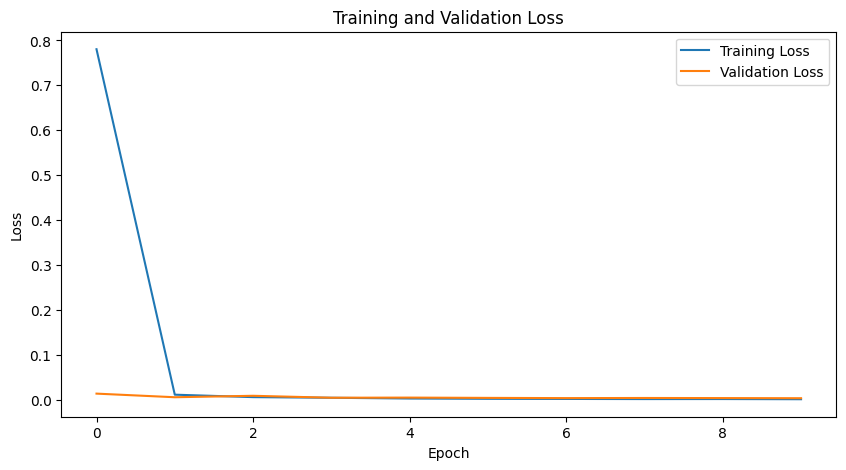

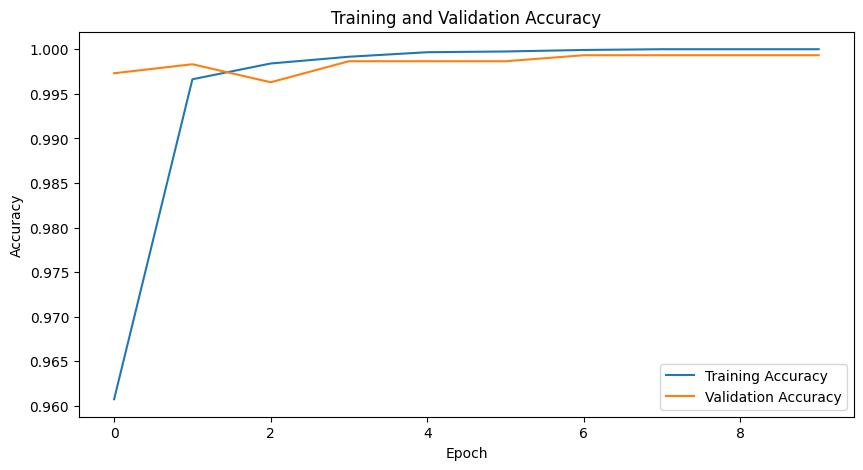

Epoch 1/10
----------


100%|██████████| 186/186 [00:40<00:00,  4.57it/s]


train Loss: 1.3981 Acc: 0.9234


100%|██████████| 47/47 [00:09<00:00,  4.78it/s]


val Loss: 0.0155 Acc: 0.9956
Saving Best Model with Validation Accuracy:  0.9956214213539912
Epoch 2/10
----------


100%|██████████| 186/186 [00:37<00:00,  4.97it/s]


train Loss: 0.0112 Acc: 0.9970


100%|██████████| 47/47 [00:09<00:00,  4.82it/s]


val Loss: 0.0097 Acc: 0.9973
Saving Best Model with Validation Accuracy:  0.9973054900639946
Epoch 3/10
----------


100%|██████████| 186/186 [00:37<00:00,  4.99it/s]


train Loss: 0.0068 Acc: 0.9985


100%|██████████| 47/47 [00:09<00:00,  4.71it/s]


val Loss: 0.0083 Acc: 0.9980
Saving Best Model with Validation Accuracy:  0.997979117547996
Epoch 4/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.77it/s]


train Loss: 0.0048 Acc: 0.9990


100%|██████████| 47/47 [00:08<00:00,  5.41it/s]


val Loss: 0.0062 Acc: 0.9983
Saving Best Model with Validation Accuracy:  0.9983159312899966
Epoch 5/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.85it/s]


train Loss: 0.0034 Acc: 0.9996


100%|██████████| 47/47 [00:09<00:00,  5.06it/s]


val Loss: 0.0052 Acc: 0.9987
Saving Best Model with Validation Accuracy:  0.9986527450319973
Epoch 6/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.85it/s]


train Loss: 0.0028 Acc: 0.9997


100%|██████████| 47/47 [00:09<00:00,  4.84it/s]


val Loss: 0.0047 Acc: 0.9983
Epoch 7/10
----------


100%|██████████| 186/186 [00:36<00:00,  5.05it/s]


train Loss: 0.0022 Acc: 1.0000


100%|██████████| 47/47 [00:09<00:00,  4.83it/s]


val Loss: 0.0041 Acc: 0.9987
Epoch 8/10
----------


100%|██████████| 186/186 [00:37<00:00,  4.94it/s]


train Loss: 0.0017 Acc: 1.0000


100%|██████████| 47/47 [00:09<00:00,  4.99it/s]


val Loss: 0.0039 Acc: 0.9990
Saving Best Model with Validation Accuracy:  0.998989558773998
Epoch 9/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.86it/s]


train Loss: 0.0015 Acc: 1.0000


100%|██████████| 47/47 [00:09<00:00,  5.18it/s]


val Loss: 0.0036 Acc: 0.9987
Epoch 10/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.83it/s]


train Loss: 0.0013 Acc: 1.0000


100%|██████████| 47/47 [00:08<00:00,  5.23it/s]


val Loss: 0.0033 Acc: 0.9987
Training complete in 7m 57s
Best Validation Accuracy: 0.9990


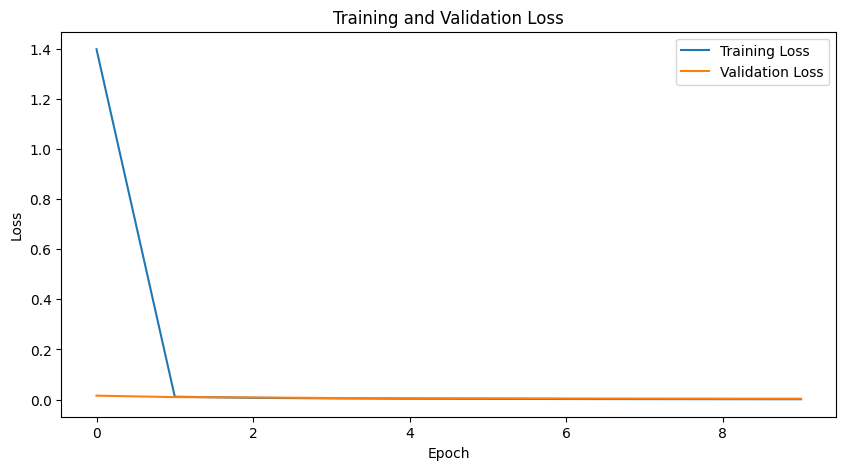

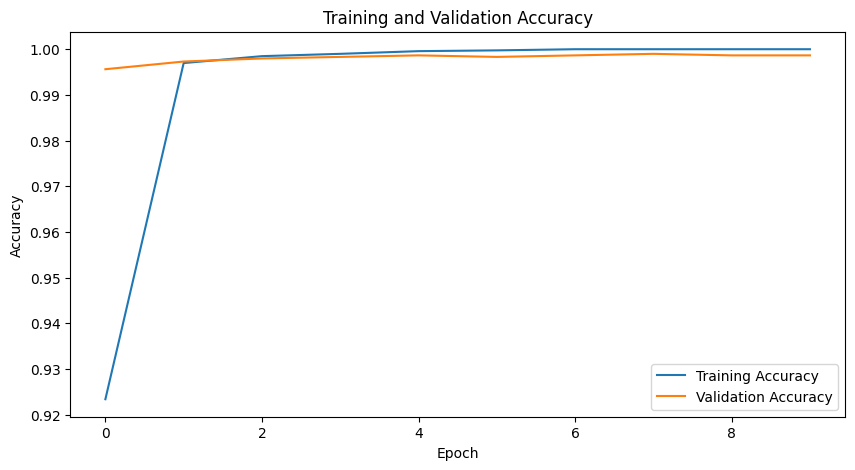

Epoch 1/10
----------


100%|██████████| 186/186 [00:37<00:00,  4.92it/s]


train Loss: 1.0624 Acc: 0.9352


100%|██████████| 47/47 [00:09<00:00,  4.79it/s]


val Loss: 0.0101 Acc: 0.9970
Saving Best Model with Validation Accuracy:  0.9969686763219939
Epoch 2/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.87it/s]


train Loss: 0.0082 Acc: 0.9977


100%|██████████| 47/47 [00:09<00:00,  5.00it/s]


val Loss: 0.0070 Acc: 0.9973
Saving Best Model with Validation Accuracy:  0.9973054900639946
Epoch 3/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.89it/s]


train Loss: 0.0052 Acc: 0.9991


100%|██████████| 47/47 [00:08<00:00,  5.65it/s]


val Loss: 0.0056 Acc: 0.9976
Saving Best Model with Validation Accuracy:  0.9976423038059953
Epoch 4/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.86it/s]


train Loss: 0.0037 Acc: 0.9992


100%|██████████| 47/47 [00:09<00:00,  5.19it/s]


val Loss: 0.0052 Acc: 0.9980
Saving Best Model with Validation Accuracy:  0.997979117547996
Epoch 5/10
----------


100%|██████████| 186/186 [00:37<00:00,  4.91it/s]


train Loss: 0.0028 Acc: 0.9995


100%|██████████| 47/47 [00:09<00:00,  4.93it/s]


val Loss: 0.0049 Acc: 0.9980
Epoch 6/10
----------


100%|██████████| 186/186 [00:36<00:00,  5.05it/s]


train Loss: 0.0022 Acc: 0.9998


100%|██████████| 47/47 [00:09<00:00,  4.72it/s]


val Loss: 0.0034 Acc: 0.9990
Saving Best Model with Validation Accuracy:  0.998989558773998
Epoch 7/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.89it/s]


train Loss: 0.0017 Acc: 0.9998


100%|██████████| 47/47 [00:09<00:00,  4.86it/s]


val Loss: 0.0034 Acc: 0.9987
Epoch 8/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.78it/s]


train Loss: 0.0014 Acc: 0.9998


100%|██████████| 47/47 [00:08<00:00,  5.28it/s]


val Loss: 0.0030 Acc: 0.9990
Epoch 9/10
----------


100%|██████████| 186/186 [00:39<00:00,  4.70it/s]


train Loss: 0.0012 Acc: 0.9998


100%|██████████| 47/47 [00:09<00:00,  4.84it/s]


val Loss: 0.0027 Acc: 0.9990
Epoch 10/10
----------


100%|██████████| 186/186 [00:37<00:00,  5.00it/s]


train Loss: 0.0010 Acc: 0.9999


100%|██████████| 47/47 [00:09<00:00,  4.79it/s]


val Loss: 0.0027 Acc: 0.9990
Training complete in 7m 55s
Best Validation Accuracy: 0.9990


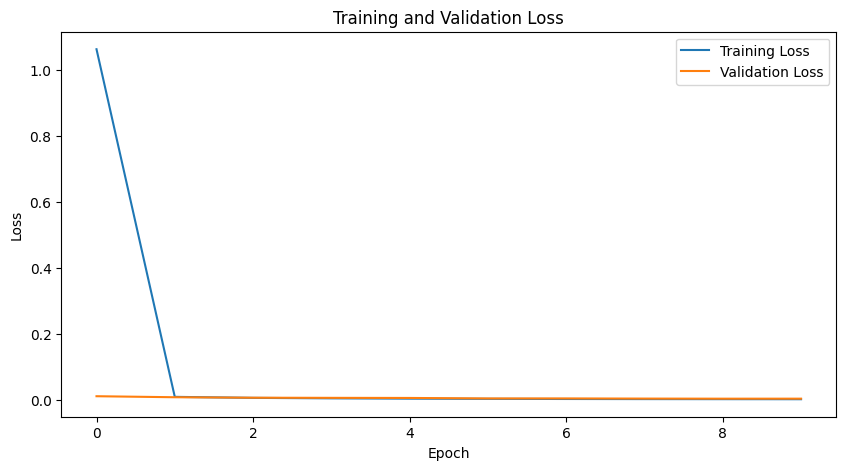

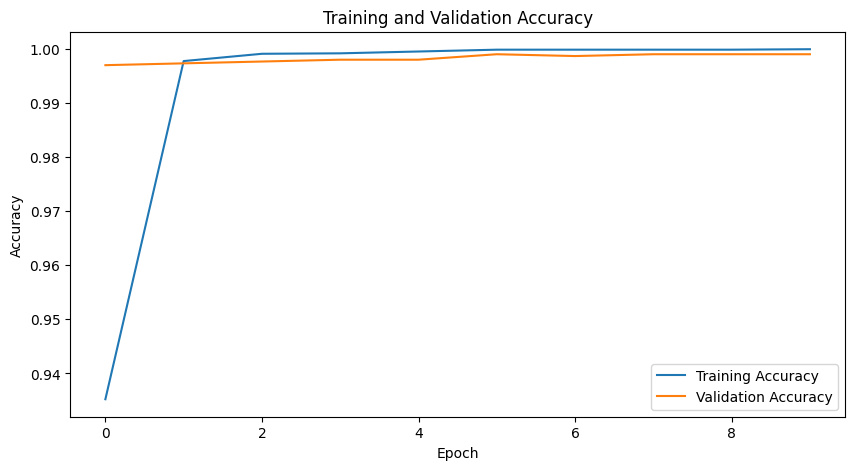

In [ ]:
def initialize_weights(model):
    for m in model.modules():
        if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
            nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)


# Define arguments
class Args:
    def __init__(self, seed):
        self.batch_size = 64 #16
        self.epochs = 10
        self.lr = 0.0001  # Lower the learning rate
        self.momentum = 0.9
        self.seed = seed
        self.regularizer_rate = 0.0
        #self.dropout_rate = 0.7

seeds = [1, 11, 111]

for seed in seeds:
    args = Args(seed)

    # Set random seed for reproducibility
    torch.manual_seed(args.seed)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Initialize model, optimizer, and loss function
    model = AlexNet().to(device)
    initialize_weights(model)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum, weight_decay=0.0005)
    criterion = nn.CrossEntropyLoss()  # Change to CrossEntropyLoss for multi-class classification

    model = train_model(model, dataloaders, criterion, optimizer, num_epochs=args.epochs, resume_training=False)
    pid = datetime.now().strftime('%Y%m%d%H%M%S')
    torch.save(model.state_dict(), os.path.join(dir_path, model_path, f"alexnet_mnist_lp_cl0_cl2_{seed}" + "train.pt"))

In [ ]:
import torch
import os
from torch.utils.data import DataLoader
import torch.nn as nn
from datetime import datetime

# Function to load the trained model
def load_model(model_path, device):
    model = AlexNet().to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    return model

# Function to test the model on a specific dataset
def test_model(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels, _ in dataloader:  # Ignore group_label
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total * 100
    return accuracy


# Define paths to the test datasets
test_two_lp_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/test/class_2'
test_two_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/test/class_2'

# Create test datasets
dataset_test_two_lp = MnistDataset(path=test_two_lp_path, is_two=1, group_labels=[1] * len(os.listdir(test_two_lp_path)))
dataset_test_two_org = MnistDataset(path=test_two_org_path, is_two=1, group_labels=[0] * len(os.listdir(test_two_org_path)))

# Create dataloaders for the test datasets
batch_size = 64
test_loader_lp = DataLoader(dataset_test_two_lp, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader_org = DataLoader(dataset_test_two_org, batch_size=batch_size, shuffle=False, num_workers=2)

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load and test the model for each seed
seeds = [1, 11, 111]
for seed in seeds:
    model_path = f"/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_lp_cl0_cl2_{seed}train.pt"

    print(f"\nLoading model with seed {seed}")
    model = load_model(model_path, device)

    # Test on patches_left dataset
    accuracy_lp = test_model(model, test_loader_lp, device)
    print(f"Accuracy on patches_left test dataset (class_2): {accuracy_lp:.2f}%")

    # Test on original dataset
    accuracy_org = test_model(model, test_loader_org, device)
    print(f"Accuracy on original test dataset (class_2): {accuracy_org:.2f}%")



Loading model with seed 1


<ipython-input-9-13f88bcd894b>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


Accuracy on patches_left test dataset (class_2): 98.16%
Accuracy on original test dataset (class_2): 99.32%

Loading model with seed 11
Accuracy on patches_left test dataset (class_2): 98.64%
Accuracy on original test dataset (class_2): 99.52%

Loading model with seed 111
Accuracy on patches_left test dataset (class_2): 99.42%
Accuracy on original test dataset (class_2): 99.61%


### Center Patch

In [ ]:
#Train
two_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_2'
zero_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0_half' #first half
two_cp_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/train/class_2'
zero_cp_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/train/class_0_half' #second half

#Test
test_two_cp_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/test/class_2'



# Create datasets for training and testing
dataset_two_org = MnistDataset(path=two_org_path, is_two=1, group_labels=[0] * len(os.listdir(two_org_path)))
dataset_zero_org = MnistDataset(path=zero_org_path, is_two=0, group_labels=[2] * len(os.listdir(zero_org_path)))
dataset_two_cp = MnistDataset(path=two_cp_path, is_two=1, group_labels=[1] * len(os.listdir(two_cp_path)))
dataset_zero_cp = MnistDataset(path=zero_cp_path, is_two=0, group_labels=[3] * len(os.listdir(zero_cp_path)))
dataset_test_two_cp = MnistDataset(path=test_two_cp_path, is_two=1, group_labels=[1] * len(os.listdir(test_two_cp_path)))

# Concatenate the training datasets
complete_dataset = ConcatDataset((dataset_zero_org, dataset_zero_cp, dataset_two_org))

# Set the random seed for reproducibility
seed = 1
torch.manual_seed(seed)

# Split the dataset into training and validation sets (80% train, 20% val)
train_size = int(0.8 * len(complete_dataset))
val_size = len(complete_dataset) - train_size
train_dataset, val_dataset = random_split(complete_dataset, [train_size, val_size])

# Use the test dataset as is
test_dataset = dataset_test_two_cp

batch_size = 64

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Validate input data
#if not validate_inputs(train_loader):
#    print("Input data contains invalid values.")

dataloaders = {'train': train_loader, 'val': val_loader, 'test': test_loader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset), 'test': len(test_dataset)}

# Print dataset sizes
print("num_train:", dataset_sizes['train'])
print("num_val:", dataset_sizes['val'])
print("num_test:", dataset_sizes['test'])



num_train: 11873
num_val: 2969
num_test: 1032


Epoch 1/10
----------


100%|██████████| 186/186 [01:47<00:00,  1.73it/s]


train Loss: 1.1173 Acc: 0.9292


100%|██████████| 47/47 [00:10<00:00,  4.67it/s]


val Loss: 0.0116 Acc: 0.9973
Saving Best Model with Validation Accuracy:  0.9973054900639946
Epoch 2/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.82it/s]


train Loss: 0.0092 Acc: 0.9972


100%|██████████| 47/47 [00:09<00:00,  4.83it/s]


val Loss: 0.0085 Acc: 0.9973
Epoch 3/10
----------


100%|██████████| 186/186 [00:39<00:00,  4.66it/s]


train Loss: 0.0053 Acc: 0.9986


100%|██████████| 47/47 [00:08<00:00,  5.53it/s]


val Loss: 0.0068 Acc: 0.9980
Saving Best Model with Validation Accuracy:  0.997979117547996
Epoch 4/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.79it/s]


train Loss: 0.0038 Acc: 0.9992


100%|██████████| 47/47 [00:08<00:00,  5.23it/s]


val Loss: 0.0084 Acc: 0.9973
Epoch 5/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.89it/s]


train Loss: 0.0029 Acc: 0.9995


100%|██████████| 47/47 [00:09<00:00,  4.78it/s]


val Loss: 0.0054 Acc: 0.9990
Saving Best Model with Validation Accuracy:  0.998989558773998
Epoch 6/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.79it/s]


train Loss: 0.0021 Acc: 0.9997


100%|██████████| 47/47 [00:10<00:00,  4.59it/s]


val Loss: 0.0050 Acc: 0.9987
Epoch 7/10
----------


100%|██████████| 186/186 [00:39<00:00,  4.76it/s]


train Loss: 0.0017 Acc: 0.9999


100%|██████████| 47/47 [00:09<00:00,  5.05it/s]


val Loss: 0.0047 Acc: 0.9990
Epoch 8/10
----------


100%|██████████| 186/186 [00:39<00:00,  4.72it/s]


train Loss: 0.0014 Acc: 1.0000


100%|██████████| 47/47 [00:08<00:00,  5.44it/s]


val Loss: 0.0046 Acc: 0.9990
Epoch 9/10
----------


100%|██████████| 186/186 [00:39<00:00,  4.65it/s]


train Loss: 0.0012 Acc: 1.0000


100%|██████████| 47/47 [00:10<00:00,  4.54it/s]


val Loss: 0.0043 Acc: 0.9987
Epoch 10/10
----------


100%|██████████| 186/186 [00:39<00:00,  4.75it/s]


train Loss: 0.0010 Acc: 1.0000


100%|██████████| 47/47 [00:10<00:00,  4.59it/s]


val Loss: 0.0043 Acc: 0.9990
Training complete in 9m 16s
Best Validation Accuracy: 0.9990


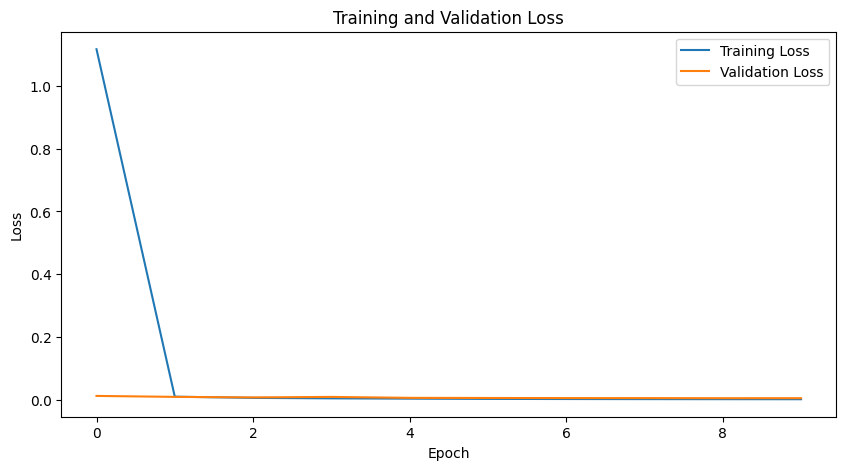

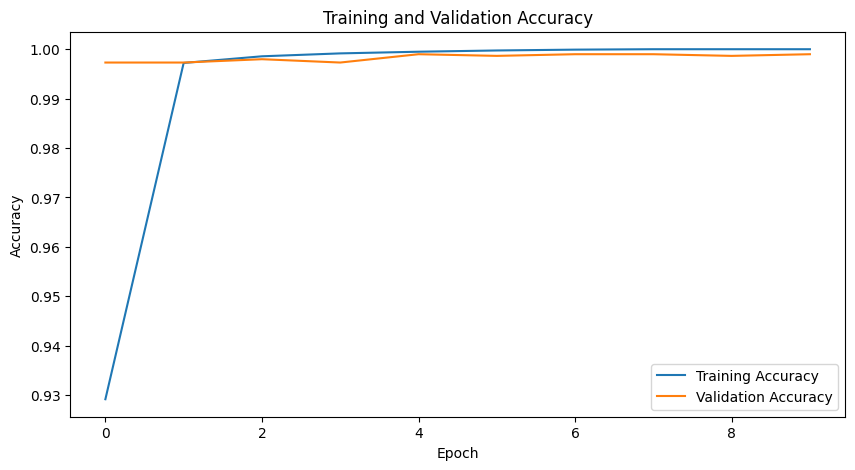

Epoch 1/10
----------


100%|██████████| 186/186 [00:40<00:00,  4.62it/s]


train Loss: 1.4235 Acc: 0.9207


100%|██████████| 47/47 [00:10<00:00,  4.61it/s]


val Loss: 0.0146 Acc: 0.9970
Saving Best Model with Validation Accuracy:  0.9969686763219939
Epoch 2/10
----------


100%|██████████| 186/186 [00:41<00:00,  4.51it/s]


train Loss: 0.0111 Acc: 0.9972


100%|██████████| 47/47 [00:09<00:00,  5.01it/s]


val Loss: 0.0100 Acc: 0.9970
Epoch 3/10
----------


100%|██████████| 186/186 [00:39<00:00,  4.73it/s]


train Loss: 0.0068 Acc: 0.9986


100%|██████████| 47/47 [00:10<00:00,  4.60it/s]


val Loss: 0.0086 Acc: 0.9973
Saving Best Model with Validation Accuracy:  0.9973054900639946
Epoch 4/10
----------


100%|██████████| 186/186 [00:39<00:00,  4.74it/s]


train Loss: 0.0047 Acc: 0.9992


100%|██████████| 47/47 [00:10<00:00,  4.58it/s]


val Loss: 0.0066 Acc: 0.9973
Epoch 5/10
----------


100%|██████████| 186/186 [00:39<00:00,  4.66it/s]


train Loss: 0.0034 Acc: 0.9996


100%|██████████| 47/47 [00:08<00:00,  5.31it/s]


val Loss: 0.0055 Acc: 0.9980
Saving Best Model with Validation Accuracy:  0.997979117547996
Epoch 6/10
----------


100%|██████████| 186/186 [00:40<00:00,  4.62it/s]


train Loss: 0.0027 Acc: 0.9997


100%|██████████| 47/47 [00:13<00:00,  3.56it/s]


val Loss: 0.0053 Acc: 0.9973
Epoch 7/10
----------


100%|██████████| 186/186 [00:41<00:00,  4.47it/s]


train Loss: 0.0022 Acc: 0.9999


100%|██████████| 47/47 [00:09<00:00,  4.75it/s]


val Loss: 0.0046 Acc: 0.9980
Epoch 8/10
----------


100%|██████████| 186/186 [00:40<00:00,  4.58it/s]


train Loss: 0.0018 Acc: 1.0000


100%|██████████| 47/47 [00:09<00:00,  4.88it/s]


val Loss: 0.0045 Acc: 0.9980
Epoch 9/10
----------


100%|██████████| 186/186 [00:39<00:00,  4.66it/s]


train Loss: 0.0015 Acc: 1.0000


100%|██████████| 47/47 [00:10<00:00,  4.53it/s]


val Loss: 0.0041 Acc: 0.9980
Epoch 10/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.79it/s]


train Loss: 0.0013 Acc: 1.0000


100%|██████████| 47/47 [00:10<00:00,  4.63it/s]


val Loss: 0.0039 Acc: 0.9983
Saving Best Model with Validation Accuracy:  0.9983159312899966
Training complete in 8m 24s
Best Validation Accuracy: 0.9983


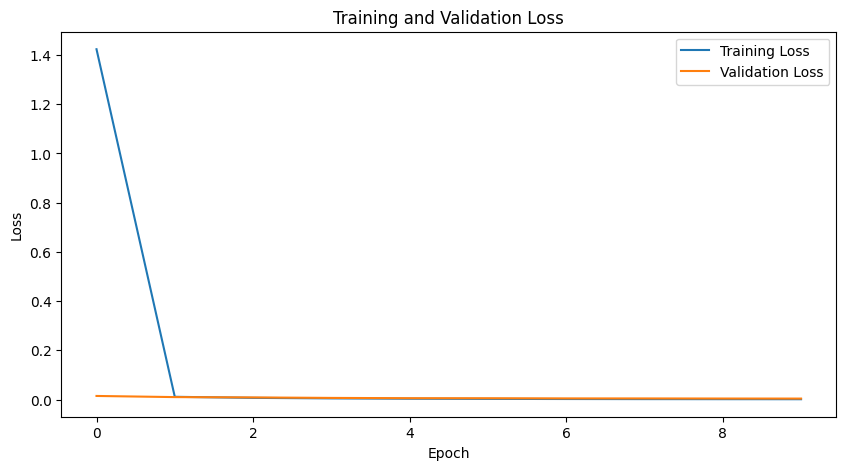

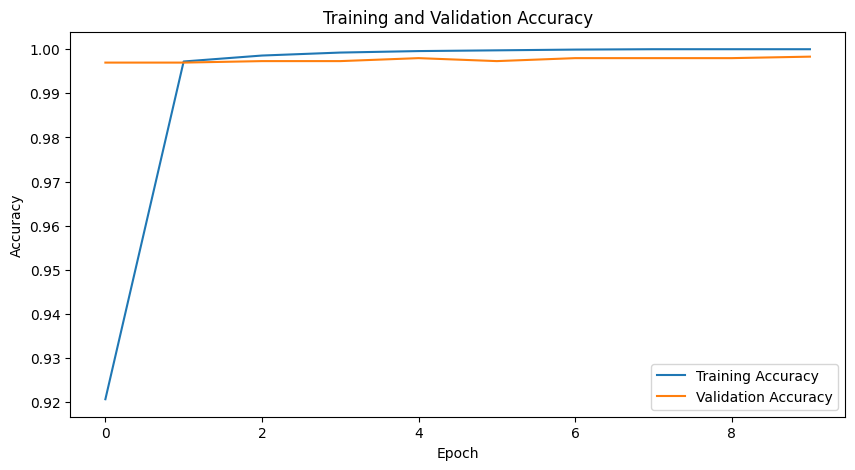

Epoch 1/10
----------


100%|██████████| 186/186 [00:40<00:00,  4.59it/s]


train Loss: 1.0251 Acc: 0.9410


100%|██████████| 47/47 [00:10<00:00,  4.47it/s]


val Loss: 0.0094 Acc: 0.9973
Saving Best Model with Validation Accuracy:  0.9973054900639946
Epoch 2/10
----------


100%|██████████| 186/186 [00:39<00:00,  4.70it/s]


train Loss: 0.0076 Acc: 0.9984


100%|██████████| 47/47 [00:10<00:00,  4.41it/s]


val Loss: 0.0067 Acc: 0.9980
Saving Best Model with Validation Accuracy:  0.997979117547996
Epoch 3/10
----------


100%|██████████| 186/186 [00:41<00:00,  4.43it/s]


train Loss: 0.0046 Acc: 0.9992


100%|██████████| 47/47 [00:10<00:00,  4.67it/s]


val Loss: 0.0055 Acc: 0.9980
Epoch 4/10
----------


100%|██████████| 186/186 [00:41<00:00,  4.50it/s]


train Loss: 0.0032 Acc: 0.9996


100%|██████████| 47/47 [00:10<00:00,  4.37it/s]


val Loss: 0.0052 Acc: 0.9987
Saving Best Model with Validation Accuracy:  0.9986527450319973
Epoch 5/10
----------


100%|██████████| 186/186 [00:40<00:00,  4.62it/s]


train Loss: 0.0025 Acc: 0.9997


100%|██████████| 47/47 [00:09<00:00,  5.03it/s]


val Loss: 0.0057 Acc: 0.9980
Epoch 6/10
----------


100%|██████████| 186/186 [00:39<00:00,  4.69it/s]


train Loss: 0.0020 Acc: 0.9998


100%|██████████| 47/47 [00:08<00:00,  5.23it/s]


val Loss: 0.0041 Acc: 0.9983
Epoch 7/10
----------


100%|██████████| 186/186 [00:38<00:00,  4.80it/s]


train Loss: 0.0016 Acc: 0.9999


100%|██████████| 47/47 [00:10<00:00,  4.69it/s]


val Loss: 0.0040 Acc: 0.9987
Epoch 8/10
----------


100%|██████████| 186/186 [00:37<00:00,  4.93it/s]


train Loss: 0.0013 Acc: 0.9999


100%|██████████| 47/47 [00:10<00:00,  4.69it/s]


val Loss: 0.0038 Acc: 0.9990
Saving Best Model with Validation Accuracy:  0.998989558773998
Epoch 9/10
----------


100%|██████████| 186/186 [00:37<00:00,  4.92it/s]


train Loss: 0.0011 Acc: 0.9999


100%|██████████| 47/47 [00:10<00:00,  4.62it/s]


val Loss: 0.0037 Acc: 0.9990
Epoch 10/10
----------


100%|██████████| 186/186 [00:39<00:00,  4.67it/s]


train Loss: 0.0009 Acc: 0.9999


100%|██████████| 47/47 [00:09<00:00,  4.90it/s]


val Loss: 0.0037 Acc: 0.9990
Training complete in 8m 18s
Best Validation Accuracy: 0.9990


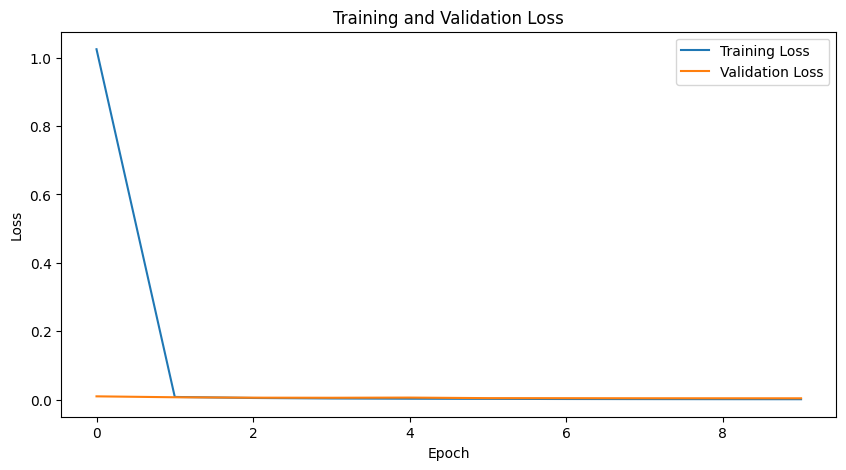

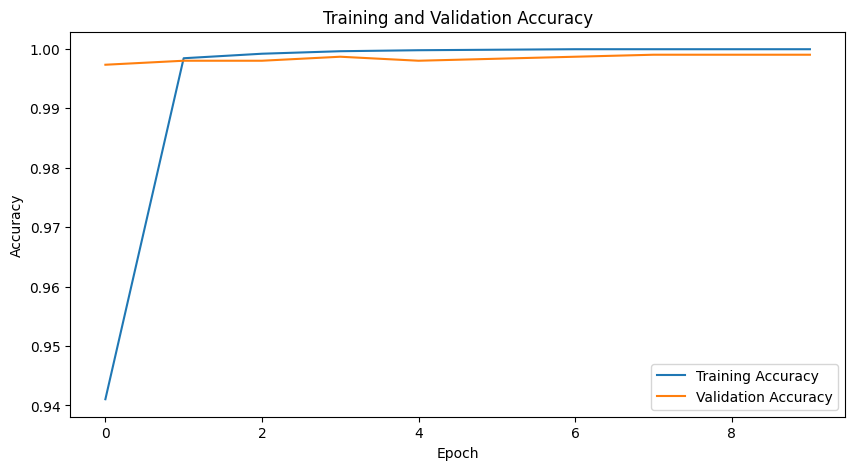

In [ ]:
def initialize_weights(model):
    for m in model.modules():
        if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
            nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)


# Define arguments
class Args:
    def __init__(self, seed):
        self.batch_size = 64 #16
        self.epochs = 10
        self.lr = 0.0001  # Lower the learning rate
        self.momentum = 0.9
        self.seed = seed
        self.regularizer_rate = 0.0
        #self.dropout_rate = 0.7

seeds = [1, 11, 111]

for seed in seeds:
    args = Args(seed)

    # Set random seed for reproducibility
    torch.manual_seed(args.seed)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Initialize model, optimizer, and loss function
    model = AlexNet().to(device)
    initialize_weights(model)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum, weight_decay=0.0005)
    criterion = nn.CrossEntropyLoss()  # Change to CrossEntropyLoss for multi-class classification

    model = train_model(model, dataloaders, criterion, optimizer, num_epochs=args.epochs, resume_training=False)
    pid = datetime.now().strftime('%Y%m%d%H%M%S')
    torch.save(model.state_dict(), os.path.join(dir_path, model_path, f"alexnet_mnist_cp_cl0_cl2_{seed}" + "train.pt"))

### Left vs. Center Patch

In [ ]:
'''

# Define source and target directories
source_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_right/train/class_2'
target_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_right/train/class_2_half_first'

# Ensure target directory exists
os.makedirs(target_dir, exist_ok=True)

# List all files in the source directory
all_files = os.listdir(source_dir)

# Sort files to ensure consistent ordering
all_files.sort()

# Determine the number of files to copy (first half of the total number of files)
num_files_to_copy = len(all_files) // 2

# Copy the first half of the files to the target directory
for file_name in all_files[:num_files_to_copy]:
    source_file = os.path.join(source_dir, file_name)
    target_file = os.path.join(target_dir, file_name)
    shutil.copy2(source_file, target_file)

print(f"Copied {num_files_to_copy} files from {source_dir} to {target_dir}")
'''

'\n\n# Define source and target directories\nsource_dir = \'/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_right/train/class_2\'\ntarget_dir = \'/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_right/train/class_2_half_first\'\n\n# Ensure target directory exists\nos.makedirs(target_dir, exist_ok=True)\n\n# List all files in the source directory\nall_files = os.listdir(source_dir)\n\n# Sort files to ensure consistent ordering\nall_files.sort()\n\n# Determine the number of files to copy (first half of the total number of files)\nnum_files_to_copy = len(all_files) // 2\n\n# Copy the first half of the files to the target directory\nfor file_name in all_files[:num_files_to_copy]:\n    source_file = os.path.join(source_dir, file_name)\n    target_file = os.path.join(target_dir, file_name)\n    shutil.copy2(source_file, target_file)\n\nprint(f"Copied {num_files_to_copy} files from {source_dir} to {target_dir}")\n'

In [ ]:
import shutil
'''
source_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/train/class_0'
target_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/train/class_0_half_second'

# Ensure target directory exists
os.makedirs(target_dir, exist_ok=True)

# List all files in the source directory
all_files = os.listdir(source_dir)

# Sort files to ensure consistent ordering
all_files.sort()

# Determine the number of files to copy (second half of the total number of files)
num_files_to_copy = len(all_files) // 2

# Copy the second half of the files to the target directory
for file_name in all_files[num_files_to_copy:]:
    source_file = os.path.join(source_dir, file_name)
    target_file = os.path.join(target_dir, file_name)
    shutil.copy2(source_file, target_file)

print(f"Copied {len(all_files[num_files_to_copy:])} files from {source_dir} to {target_dir}")
'''

'\nsource_dir = \'/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/train/class_0\'\ntarget_dir = \'/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/train/class_0_half_second\'\n\n# Ensure target directory exists\nos.makedirs(target_dir, exist_ok=True)\n\n# List all files in the source directory\nall_files = os.listdir(source_dir)\n\n# Sort files to ensure consistent ordering\nall_files.sort()\n\n# Determine the number of files to copy (second half of the total number of files)\nnum_files_to_copy = len(all_files) // 2\n\n# Copy the second half of the files to the target directory\nfor file_name in all_files[num_files_to_copy:]:\n    source_file = os.path.join(source_dir, file_name)\n    target_file = os.path.join(target_dir, file_name)\n    shutil.copy2(source_file, target_file)\n\nprint(f"Copied {len(all_files[num_files_to_copy:])} files from {source_dir} to {target_dir}")\n'

In [ ]:
'''
source_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/train/class_2'
target_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/train/class_2_half_first'

# Ensure target directory exists
os.makedirs(target_dir, exist_ok=True)

# List all files in the source directory
all_files = os.listdir(source_dir)

# Sort files to ensure consistent ordering
all_files.sort()

# Determine the number of files to copy (second half of the total number of files)
num_files_to_copy = len(all_files) // 2

# Copy the second half of the files to the target directory
for file_name in all_files[:num_files_to_copy]:
    source_file = os.path.join(source_dir, file_name)
    target_file = os.path.join(target_dir, file_name)
    shutil.copy2(source_file, target_file)

print(f"Copied {len(all_files[:num_files_to_copy])} files from {source_dir} to {target_dir}")
'''

'\nsource_dir = \'/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/train/class_2\'\ntarget_dir = \'/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/train/class_2_half_first\'\n\n# Ensure target directory exists\nos.makedirs(target_dir, exist_ok=True)\n\n# List all files in the source directory\nall_files = os.listdir(source_dir)\n\n# Sort files to ensure consistent ordering\nall_files.sort()\n\n# Determine the number of files to copy (second half of the total number of files)\nnum_files_to_copy = len(all_files) // 2\n\n# Copy the second half of the files to the target directory\nfor file_name in all_files[:num_files_to_copy]:\n    source_file = os.path.join(source_dir, file_name)\n    target_file = os.path.join(target_dir, file_name)\n    shutil.copy2(source_file, target_file)\n\nprint(f"Copied {len(all_files[:num_files_to_copy])} files from {source_dir} to {target_dir}")\n'

In [ ]:
#Train
two_cp_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/train/class_2_half_first'
zero_cp_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/train/class_0_half_second'
two_lp_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/train/class_2'
zero_lp_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/train/class_0_half_first'

#Test
test_two_lp_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/test/class_2'



# Create datasets for training and testing
dataset_two_cp = MnistDataset(path=two_cp_path, is_two=1, group_labels=[0] * len(os.listdir(two_cp_path)))
dataset_zero_cp = MnistDataset(path=zero_cp_path, is_two=0, group_labels=[2] * len(os.listdir(zero_cp_path)))
dataset_two_lp = MnistDataset(path=two_lp_path, is_two=1, group_labels=[1] * len(os.listdir(two_lp_path)))
dataset_zero_lp = MnistDataset(path=zero_lp_path, is_two=0, group_labels=[3] * len(os.listdir(zero_lp_path)))
dataset_test_two_lp = MnistDataset(path=test_two_lp_path, is_two=1, group_labels=[1] * len(os.listdir(test_two_lp_path)))

# Concatenate the training datasets
complete_dataset = ConcatDataset((dataset_zero_cp, dataset_zero_lp, dataset_two_lp))

# Set the random seed for reproducibility
seed = 1
torch.manual_seed(seed)

# Split the dataset into training and validation sets (80% train, 20% val)
train_size = int(0.8 * len(complete_dataset))
val_size = len(complete_dataset) - train_size
train_dataset, val_dataset = random_split(complete_dataset, [train_size, val_size])

# Use the test dataset as is
test_dataset = dataset_test_two_lp

batch_size = 64

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Validate input data
#if not validate_inputs(train_loader):
#    print("Input data contains invalid values.")

dataloaders = {'train': train_loader, 'val': val_loader, 'test': test_loader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset), 'test': len(test_dataset)}

# Print dataset sizes
print("num_train:", dataset_sizes['train'])
print("num_val:", dataset_sizes['val'])
print("num_test:", dataset_sizes['test'])



num_train: 9504
num_val: 2377
num_test: 1032


Epoch 1/10
----------


100%|██████████| 149/149 [18:26<00:00,  7.43s/it]


train Loss: 2.1199 Acc: 0.9065


100%|██████████| 38/38 [04:26<00:00,  7.00s/it]


val Loss: 0.0152 Acc: 0.9958
Saving Best Model with Validation Accuracy:  0.995793016407236
Epoch 2/10
----------


100%|██████████| 149/149 [00:30<00:00,  4.93it/s]


train Loss: 0.0135 Acc: 0.9966


100%|██████████| 38/38 [00:07<00:00,  5.04it/s]


val Loss: 0.0108 Acc: 0.9966
Saving Best Model with Validation Accuracy:  0.9966344131257888
Epoch 3/10
----------


100%|██████████| 149/149 [00:30<00:00,  4.82it/s]


train Loss: 0.0091 Acc: 0.9979


100%|██████████| 38/38 [00:06<00:00,  5.49it/s]


val Loss: 0.0088 Acc: 0.9975
Saving Best Model with Validation Accuracy:  0.9974758098443416
Epoch 4/10
----------


100%|██████████| 149/149 [00:30<00:00,  4.87it/s]


train Loss: 0.0067 Acc: 0.9985


100%|██████████| 38/38 [00:08<00:00,  4.70it/s]


val Loss: 0.0074 Acc: 0.9987
Saving Best Model with Validation Accuracy:  0.9987379049221708
Epoch 5/10
----------


100%|██████████| 149/149 [00:30<00:00,  4.91it/s]


train Loss: 0.0048 Acc: 0.9996


100%|██████████| 38/38 [00:06<00:00,  5.50it/s]


val Loss: 0.0080 Acc: 0.9966
Epoch 6/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.71it/s]


train Loss: 0.0040 Acc: 0.9995


100%|██████████| 38/38 [00:08<00:00,  4.71it/s]


val Loss: 0.0067 Acc: 0.9979
Epoch 7/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.72it/s]


train Loss: 0.0031 Acc: 0.9999


100%|██████████| 38/38 [00:07<00:00,  4.99it/s]


val Loss: 0.0058 Acc: 0.9983
Epoch 8/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.67it/s]


train Loss: 0.0027 Acc: 0.9998


100%|██████████| 38/38 [00:07<00:00,  5.34it/s]


val Loss: 0.0058 Acc: 0.9983
Epoch 9/10
----------


100%|██████████| 149/149 [00:30<00:00,  4.83it/s]


train Loss: 0.0023 Acc: 1.0000


100%|██████████| 38/38 [00:08<00:00,  4.58it/s]


val Loss: 0.0051 Acc: 0.9987
Epoch 10/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.80it/s]


train Loss: 0.0019 Acc: 1.0000


100%|██████████| 38/38 [00:08<00:00,  4.52it/s]


val Loss: 0.0052 Acc: 0.9983
Training complete in 28m 41s
Best Validation Accuracy: 0.9987


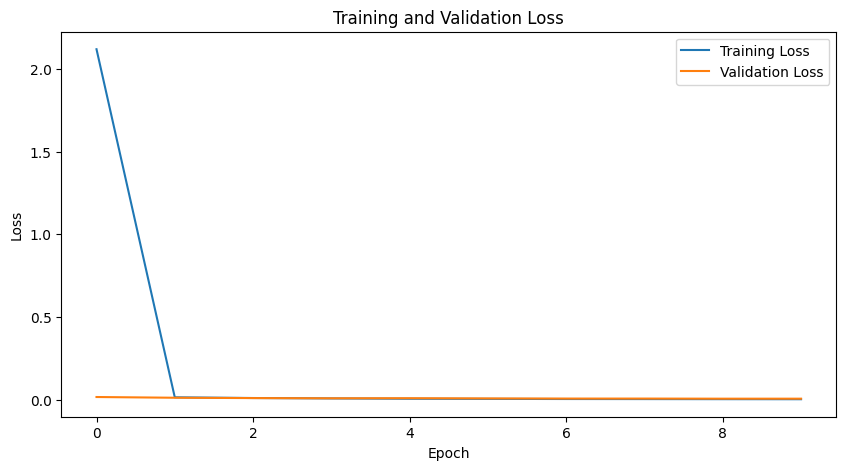

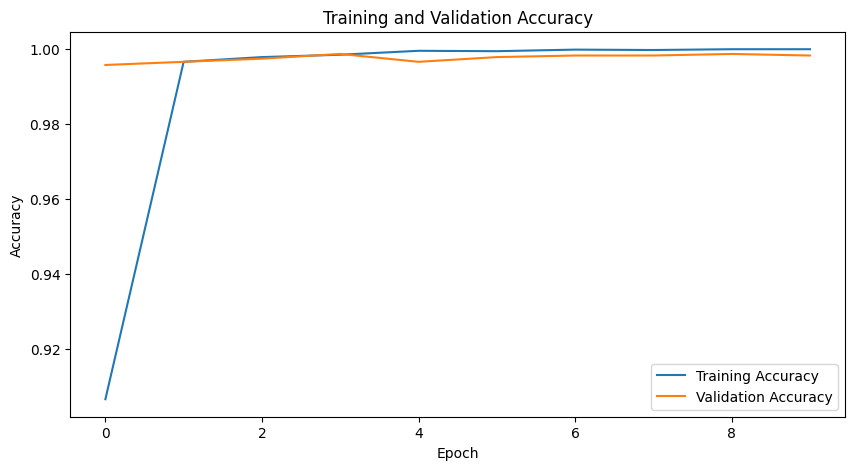

Epoch 1/10
----------


100%|██████████| 149/149 [00:33<00:00,  4.51it/s]


train Loss: 0.9662 Acc: 0.9411


100%|██████████| 38/38 [00:07<00:00,  4.92it/s]


val Loss: 0.0070 Acc: 0.9971
Saving Best Model with Validation Accuracy:  0.9970551114850652
Epoch 2/10
----------


100%|██████████| 149/149 [00:32<00:00,  4.63it/s]


train Loss: 0.0056 Acc: 0.9980


100%|██████████| 38/38 [00:08<00:00,  4.68it/s]


val Loss: 0.0041 Acc: 0.9987
Saving Best Model with Validation Accuracy:  0.9987379049221708
Epoch 3/10
----------


100%|██████████| 149/149 [00:32<00:00,  4.61it/s]


train Loss: 0.0030 Acc: 0.9991


100%|██████████| 38/38 [00:08<00:00,  4.33it/s]


val Loss: 0.0029 Acc: 0.9992
Saving Best Model with Validation Accuracy:  0.9991586032814472
Epoch 4/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.74it/s]


train Loss: 0.0017 Acc: 0.9998


100%|██████████| 38/38 [00:07<00:00,  4.80it/s]


val Loss: 0.0036 Acc: 0.9992
Epoch 5/10
----------


100%|██████████| 149/149 [00:32<00:00,  4.60it/s]


train Loss: 0.0012 Acc: 0.9999


100%|██████████| 38/38 [00:07<00:00,  5.00it/s]


val Loss: 0.0035 Acc: 0.9992
Epoch 6/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.74it/s]


train Loss: 0.0009 Acc: 1.0000


100%|██████████| 38/38 [00:08<00:00,  4.50it/s]


val Loss: 0.0035 Acc: 0.9992
Epoch 7/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.79it/s]


train Loss: 0.0008 Acc: 1.0000


100%|██████████| 38/38 [00:07<00:00,  5.31it/s]


val Loss: 0.0029 Acc: 0.9992
Epoch 8/10
----------


100%|██████████| 149/149 [00:30<00:00,  4.82it/s]


train Loss: 0.0007 Acc: 1.0000


100%|██████████| 38/38 [00:07<00:00,  4.92it/s]


val Loss: 0.0031 Acc: 0.9992
Epoch 9/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.72it/s]


train Loss: 0.0006 Acc: 1.0000


100%|██████████| 38/38 [00:08<00:00,  4.59it/s]


val Loss: 0.0034 Acc: 0.9992
Epoch 10/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.80it/s]


train Loss: 0.0005 Acc: 1.0000


100%|██████████| 38/38 [00:06<00:00,  5.57it/s]


val Loss: 0.0026 Acc: 0.9992
Training complete in 6m 36s
Best Validation Accuracy: 0.9992


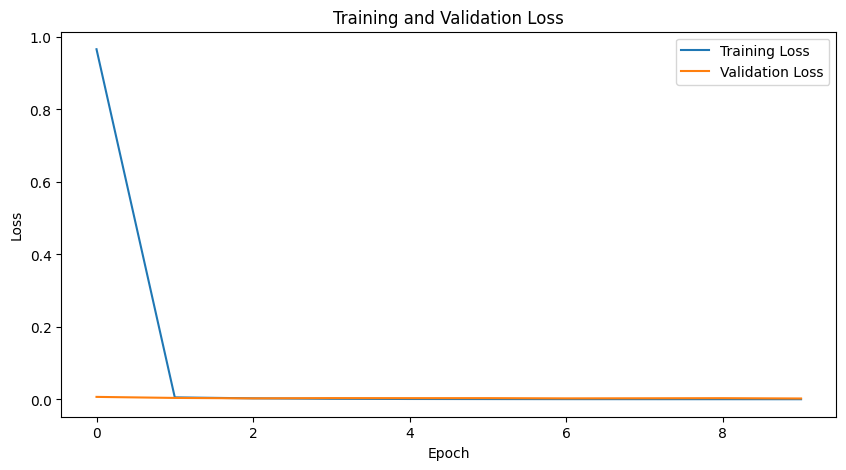

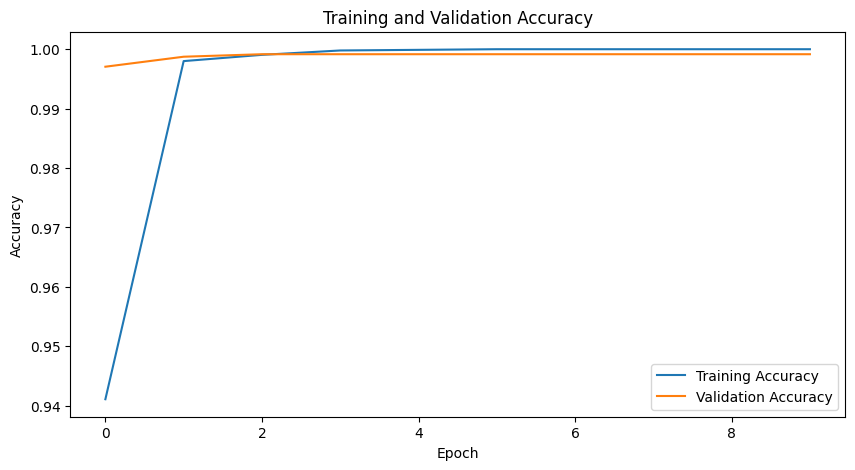

Epoch 1/10
----------


100%|██████████| 149/149 [00:32<00:00,  4.55it/s]


train Loss: 1.8004 Acc: 0.9014


100%|██████████| 38/38 [00:07<00:00,  4.97it/s]


val Loss: 0.0145 Acc: 0.9954
Saving Best Model with Validation Accuracy:  0.9953723180479597
Epoch 2/10
----------


100%|██████████| 149/149 [00:32<00:00,  4.59it/s]


train Loss: 0.0116 Acc: 0.9965


100%|██████████| 38/38 [00:08<00:00,  4.60it/s]


val Loss: 0.0146 Acc: 0.9937
Epoch 3/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.67it/s]


train Loss: 0.0079 Acc: 0.9979


100%|██████████| 38/38 [00:07<00:00,  5.36it/s]


val Loss: 0.0071 Acc: 0.9979
Saving Best Model with Validation Accuracy:  0.9978965082036181
Epoch 4/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.80it/s]


train Loss: 0.0054 Acc: 0.9992


100%|██████████| 38/38 [00:07<00:00,  4.95it/s]


val Loss: 0.0058 Acc: 0.9979
Epoch 5/10
----------


100%|██████████| 149/149 [00:30<00:00,  4.88it/s]


train Loss: 0.0043 Acc: 0.9999


100%|██████████| 38/38 [00:08<00:00,  4.73it/s]


val Loss: 0.0053 Acc: 0.9987
Saving Best Model with Validation Accuracy:  0.9987379049221708
Epoch 6/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.71it/s]


train Loss: 0.0033 Acc: 0.9999


100%|██████████| 38/38 [00:07<00:00,  5.12it/s]


val Loss: 0.0051 Acc: 0.9987
Epoch 7/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.78it/s]


train Loss: 0.0028 Acc: 0.9999


100%|██████████| 38/38 [00:08<00:00,  4.58it/s]


val Loss: 0.0044 Acc: 0.9983
Epoch 8/10
----------


100%|██████████| 149/149 [00:32<00:00,  4.65it/s]


train Loss: 0.0023 Acc: 0.9999


100%|██████████| 38/38 [00:07<00:00,  4.82it/s]


val Loss: 0.0043 Acc: 0.9983
Epoch 9/10
----------


100%|██████████| 149/149 [00:33<00:00,  4.41it/s]


train Loss: 0.0020 Acc: 0.9999


100%|██████████| 38/38 [00:08<00:00,  4.74it/s]


val Loss: 0.0041 Acc: 0.9987
Epoch 10/10
----------


100%|██████████| 149/149 [00:31<00:00,  4.71it/s]


train Loss: 0.0017 Acc: 0.9999


100%|██████████| 38/38 [00:08<00:00,  4.61it/s]


val Loss: 0.0038 Acc: 0.9987
Training complete in 6m 38s
Best Validation Accuracy: 0.9987


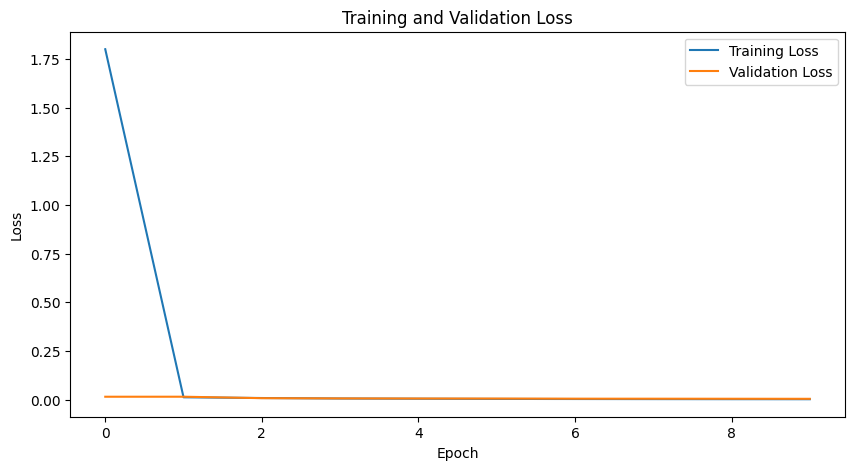

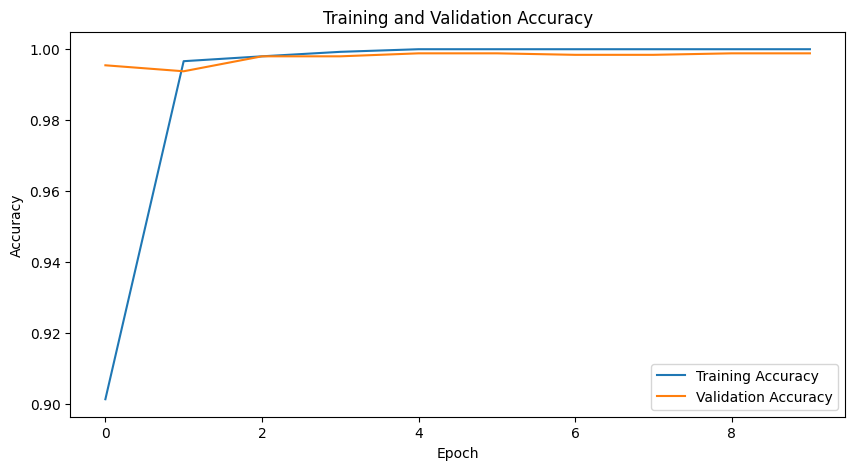

In [ ]:
def initialize_weights(model):
    for m in model.modules():
        if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
            nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)


class Args:
    def __init__(self, seed):
        self.batch_size = 64 #16
        self.epochs = 10
        self.lr = 0.0001  # Lower the learning rate
        self.momentum = 0.9
        self.seed = seed
        self.regularizer_rate = 0.0
        #self.dropout_rate = 0.7

seeds = [1, 11, 111]

for seed in seeds:
    args = Args(seed)

    # Set random seed for reproducibility
    torch.manual_seed(args.seed)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Initialize model, optimizer, and loss function
    model = AlexNet().to(device)
    initialize_weights(model)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum, weight_decay=0.0005)
    criterion = nn.CrossEntropyLoss()  # Change to CrossEntropyLoss for multi-class classification

    model = train_model(model, dataloaders, criterion, optimizer, num_epochs=args.epochs, resume_training=False)
    pid = datetime.now().strftime('%Y%m%d%H%M%S')
    torch.save(model.state_dict(), os.path.join(dir_path, model_path, f"alexnet_mnist_cp_lp_cl0_cl2_{seed}" + "train.pt"))

### Dynamic Left Patch

In [ ]:
#Train
two_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_2'
zero_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0'
zero_lp_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/dynamic_patches_left/train/class_0'

#Test
test_two_lp_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/dynamic_patches_left/test/class_2'



# Create datasets for training and testing
dataset_two_org = MnistDataset(path=two_org_path, is_two=1, group_labels=[0] * len(os.listdir(two_org_path)))
dataset_zero_org = MnistDataset(path=zero_org_path, is_two=0, group_labels=[2] * len(os.listdir(zero_org_path)))
#dataset_two_lp = MnistDataset(path=two_lp_path, is_two=1, group_labels=[1] * len(os.listdir(two_lp_path)))
dataset_zero_lp = MnistDataset(path=zero_lp_path, is_two=0, group_labels=[3] * len(os.listdir(zero_lp_path)))
dataset_test_two_lp = MnistDataset(path=test_two_lp_path, is_two=1, group_labels=[1] * len(os.listdir(test_two_lp_path)))


# Concatenate the training datasets
complete_dataset = ConcatDataset((dataset_zero_org, dataset_zero_lp, dataset_two_org))
train_dataset = complete_dataset


val_two_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/val/class_2'
val_zero_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/val/class_0'
val_zero_lp_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/dynamic_patches_left/val/class_0'

val_dataset_two_org = MnistDataset(path=val_two_org_path, is_two=1, group_labels=[0] * len(os.listdir(val_two_org_path)))
val_dataset_zero_org = MnistDataset(path=val_zero_org_path, is_two=0, group_labels=[2] * len(os.listdir(val_zero_org_path)))
val_dataset_zero_lp = MnistDataset(path=val_zero_lp_path, is_two=0, group_labels=[3] * len(os.listdir(val_zero_lp_path)))

val_dataset = ConcatDataset((dataset_zero_org, dataset_zero_lp, dataset_two_org))
# Set the random seed for reproducibility
#seed = 1
#torch.manual_seed(seed)

# Split the dataset into training and validation sets (80% train, 20% val)
#train_size = int(0.8 * len(complete_dataset))
#val_size = len(complete_dataset) - train_size
#train_dataset, val_dataset = random_split(complete_dataset, [train_size, val_size])

# Use the test dataset as is
test_dataset = dataset_test_two_lp

batch_size = 128

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Validate input data
#if not validate_inputs(train_loader):
#    print("Input data contains invalid values.")

dataloaders = {'train': train_loader, 'val': val_loader, 'test': test_loader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset), 'test': len(test_dataset)}

# Print dataset sizes
print("num_train:", dataset_sizes['train'])
print("num_val:", dataset_sizes['val'])
print("num_test:", dataset_sizes['test'])



num_train: 9504
num_val: 9504
num_test: 1032


originl

no freeze

Epoch 1/30
----------


100%|██████████| 75/75 [17:02<00:00, 13.63s/it]


train Loss: 0.1541 Acc: 0.9569


100%|██████████| 75/75 [00:17<00:00,  4.33it/s]


val Loss: 0.0266 Acc: 0.9910
Saving Best Model with Validation Accuracy:  0.9909511784511784
Epoch 2/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.17it/s]


train Loss: 0.0521 Acc: 0.9837


100%|██████████| 75/75 [00:17<00:00,  4.25it/s]


val Loss: 0.0221 Acc: 0.9933
Saving Best Model with Validation Accuracy:  0.9932659932659932
Epoch 3/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.06it/s]


train Loss: 0.0388 Acc: 0.9871


100%|██████████| 75/75 [00:17<00:00,  4.38it/s]


val Loss: 0.0177 Acc: 0.9942
Saving Best Model with Validation Accuracy:  0.9942129629629629
Epoch 4/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.16it/s]


train Loss: 0.0359 Acc: 0.9876


100%|██████████| 75/75 [00:17<00:00,  4.33it/s]


val Loss: 0.0148 Acc: 0.9949
Saving Best Model with Validation Accuracy:  0.9949494949494949
Epoch 5/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.20it/s]


train Loss: 0.0313 Acc: 0.9886


100%|██████████| 75/75 [00:17<00:00,  4.32it/s]


val Loss: 0.0127 Acc: 0.9953
Saving Best Model with Validation Accuracy:  0.9952651515151515
Epoch 6/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.13it/s]


train Loss: 0.0315 Acc: 0.9888


100%|██████████| 75/75 [00:17<00:00,  4.32it/s]


val Loss: 0.0159 Acc: 0.9948
Epoch 7/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


train Loss: 0.0302 Acc: 0.9901


100%|██████████| 75/75 [00:17<00:00,  4.25it/s]


val Loss: 0.0100 Acc: 0.9966
Saving Best Model with Validation Accuracy:  0.9966329966329965
Epoch 8/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.05it/s]


train Loss: 0.0257 Acc: 0.9912


100%|██████████| 75/75 [00:17<00:00,  4.35it/s]


val Loss: 0.0173 Acc: 0.9933
Epoch 9/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.20it/s]


train Loss: 0.0240 Acc: 0.9914


100%|██████████| 75/75 [00:17<00:00,  4.32it/s]


val Loss: 0.0121 Acc: 0.9961
Epoch 10/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.16it/s]


train Loss: 0.0203 Acc: 0.9936


100%|██████████| 75/75 [00:17<00:00,  4.38it/s]


val Loss: 0.0097 Acc: 0.9967
Saving Best Model with Validation Accuracy:  0.9967382154882154
Epoch 11/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.15it/s]


train Loss: 0.0213 Acc: 0.9932


100%|██████████| 75/75 [00:17<00:00,  4.33it/s]


val Loss: 0.0121 Acc: 0.9959
Epoch 12/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.14it/s]


train Loss: 0.0205 Acc: 0.9926


100%|██████████| 75/75 [00:17<00:00,  4.33it/s]


val Loss: 0.0088 Acc: 0.9967
Epoch 13/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.14it/s]


train Loss: 0.0214 Acc: 0.9919


100%|██████████| 75/75 [00:17<00:00,  4.31it/s]


val Loss: 0.0079 Acc: 0.9973
Saving Best Model with Validation Accuracy:  0.9972643097643097
Epoch 14/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.05it/s]


train Loss: 0.0181 Acc: 0.9940


100%|██████████| 75/75 [00:18<00:00,  4.15it/s]


val Loss: 0.0071 Acc: 0.9981
Saving Best Model with Validation Accuracy:  0.9981060606060606
Epoch 15/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.11it/s]


train Loss: 0.0207 Acc: 0.9926


100%|██████████| 75/75 [00:17<00:00,  4.26it/s]


val Loss: 0.0075 Acc: 0.9977
Epoch 16/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.12it/s]


train Loss: 0.0184 Acc: 0.9932


100%|██████████| 75/75 [00:17<00:00,  4.27it/s]


val Loss: 0.0069 Acc: 0.9974
Epoch 17/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.13it/s]


train Loss: 0.0189 Acc: 0.9935


100%|██████████| 75/75 [00:17<00:00,  4.27it/s]


val Loss: 0.0059 Acc: 0.9982
Saving Best Model with Validation Accuracy:  0.9982112794612794
Epoch 18/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.08it/s]


train Loss: 0.0173 Acc: 0.9932


100%|██████████| 75/75 [00:17<00:00,  4.28it/s]


val Loss: 0.0067 Acc: 0.9979
Epoch 19/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.13it/s]


train Loss: 0.0164 Acc: 0.9942


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


val Loss: 0.0053 Acc: 0.9986
Saving Best Model with Validation Accuracy:  0.9986321548821548
Epoch 20/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.10it/s]


train Loss: 0.0151 Acc: 0.9947


100%|██████████| 75/75 [00:17<00:00,  4.26it/s]


val Loss: 0.0069 Acc: 0.9974
Epoch 21/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.12it/s]


train Loss: 0.0185 Acc: 0.9940


100%|██████████| 75/75 [00:17<00:00,  4.28it/s]


val Loss: 0.0105 Acc: 0.9967
Epoch 22/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.11it/s]


train Loss: 0.0157 Acc: 0.9941


100%|██████████| 75/75 [00:17<00:00,  4.23it/s]


val Loss: 0.0045 Acc: 0.9989
Saving Best Model with Validation Accuracy:  0.9989478114478114
Epoch 23/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.13it/s]


train Loss: 0.0128 Acc: 0.9953


100%|██████████| 75/75 [00:17<00:00,  4.23it/s]


val Loss: 0.0047 Acc: 0.9986
Epoch 24/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.11it/s]


train Loss: 0.0130 Acc: 0.9948


100%|██████████| 75/75 [00:17<00:00,  4.41it/s]


val Loss: 0.0052 Acc: 0.9982
Epoch 25/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


train Loss: 0.0145 Acc: 0.9943


100%|██████████| 75/75 [00:17<00:00,  4.38it/s]


val Loss: 0.0060 Acc: 0.9979
Epoch 26/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


train Loss: 0.0159 Acc: 0.9938


100%|██████████| 75/75 [00:17<00:00,  4.27it/s]


val Loss: 0.0074 Acc: 0.9977
Epoch 27/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.17it/s]


train Loss: 0.0146 Acc: 0.9945


100%|██████████| 75/75 [00:17<00:00,  4.31it/s]


val Loss: 0.0044 Acc: 0.9981
Epoch 28/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.13it/s]


train Loss: 0.0137 Acc: 0.9954


100%|██████████| 75/75 [00:17<00:00,  4.38it/s]


val Loss: 0.0060 Acc: 0.9980
Epoch 29/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.15it/s]


train Loss: 0.0143 Acc: 0.9955


100%|██████████| 75/75 [00:17<00:00,  4.32it/s]


val Loss: 0.0035 Acc: 0.9989
Epoch 30/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.17it/s]


train Loss: 0.0137 Acc: 0.9946


100%|██████████| 75/75 [00:17<00:00,  4.25it/s]


val Loss: 0.0034 Acc: 0.9993
Saving Best Model with Validation Accuracy:  0.999263468013468
Training complete in 34m 33s
Best Validation Accuracy: 0.9993


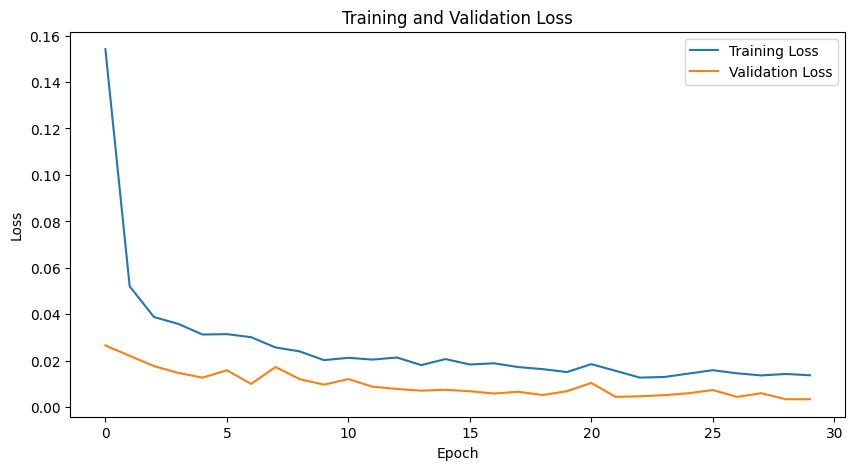

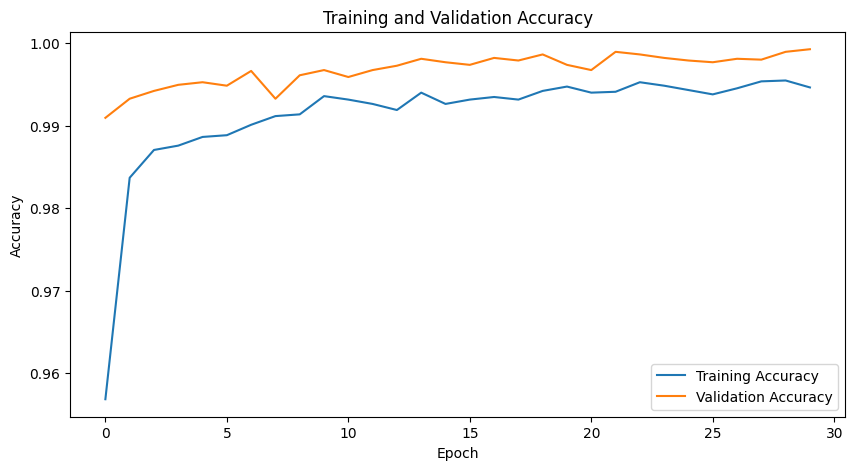

Model saved to /content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_dlp_seed_1111.pt
Epoch 1/30
----------


100%|██████████| 75/75 [01:07<00:00,  1.11it/s]


train Loss: 0.1935 Acc: 0.9545


100%|██████████| 75/75 [00:17<00:00,  4.27it/s]


val Loss: 0.0363 Acc: 0.9888
Saving Best Model with Validation Accuracy:  0.9888468013468013
Epoch 2/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.06it/s]


train Loss: 0.0469 Acc: 0.9864


100%|██████████| 75/75 [00:17<00:00,  4.22it/s]


val Loss: 0.0189 Acc: 0.9937
Saving Best Model with Validation Accuracy:  0.9936868686868686
Epoch 3/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.07it/s]


train Loss: 0.0379 Acc: 0.9878


100%|██████████| 75/75 [00:17<00:00,  4.30it/s]


val Loss: 0.0166 Acc: 0.9940
Saving Best Model with Validation Accuracy:  0.9940025252525252
Epoch 4/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.09it/s]


train Loss: 0.0328 Acc: 0.9887


100%|██████████| 75/75 [00:17<00:00,  4.32it/s]


val Loss: 0.0200 Acc: 0.9928
Epoch 5/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


train Loss: 0.0333 Acc: 0.9885


100%|██████████| 75/75 [00:17<00:00,  4.31it/s]


val Loss: 0.0152 Acc: 0.9951
Saving Best Model with Validation Accuracy:  0.9950547138047138
Epoch 6/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.14it/s]


train Loss: 0.0264 Acc: 0.9916


100%|██████████| 75/75 [00:17<00:00,  4.26it/s]


val Loss: 0.0108 Acc: 0.9964
Saving Best Model with Validation Accuracy:  0.9964225589225589
Epoch 7/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.15it/s]


train Loss: 0.0270 Acc: 0.9906


100%|██████████| 75/75 [00:17<00:00,  4.25it/s]


val Loss: 0.0138 Acc: 0.9952
Epoch 8/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.17it/s]


train Loss: 0.0248 Acc: 0.9908


100%|██████████| 75/75 [00:17<00:00,  4.37it/s]


val Loss: 0.0099 Acc: 0.9968
Saving Best Model with Validation Accuracy:  0.9968434343434343
Epoch 9/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.08it/s]


train Loss: 0.0227 Acc: 0.9926


100%|██████████| 75/75 [00:17<00:00,  4.22it/s]


val Loss: 0.0098 Acc: 0.9971
Saving Best Model with Validation Accuracy:  0.997053872053872
Epoch 10/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.11it/s]


train Loss: 0.0249 Acc: 0.9898


100%|██████████| 75/75 [00:17<00:00,  4.24it/s]


val Loss: 0.0083 Acc: 0.9978
Saving Best Model with Validation Accuracy:  0.997790404040404
Epoch 11/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.04it/s]


train Loss: 0.0225 Acc: 0.9918


100%|██████████| 75/75 [00:17<00:00,  4.25it/s]


val Loss: 0.0097 Acc: 0.9969
Epoch 12/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.12it/s]


train Loss: 0.0201 Acc: 0.9932


100%|██████████| 75/75 [00:17<00:00,  4.35it/s]


val Loss: 0.0099 Acc: 0.9968
Epoch 13/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.09it/s]


train Loss: 0.0215 Acc: 0.9926


100%|██████████| 75/75 [00:17<00:00,  4.32it/s]


val Loss: 0.0071 Acc: 0.9979
Saving Best Model with Validation Accuracy:  0.9978956228956228
Epoch 14/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


train Loss: 0.0208 Acc: 0.9936


100%|██████████| 75/75 [00:17<00:00,  4.29it/s]


val Loss: 0.0078 Acc: 0.9974
Epoch 15/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.15it/s]


train Loss: 0.0158 Acc: 0.9941


100%|██████████| 75/75 [00:17<00:00,  4.27it/s]


val Loss: 0.0138 Acc: 0.9952
Epoch 16/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.21it/s]


train Loss: 0.0186 Acc: 0.9933


100%|██████████| 75/75 [00:17<00:00,  4.26it/s]


val Loss: 0.0076 Acc: 0.9977
Epoch 17/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.13it/s]


train Loss: 0.0152 Acc: 0.9941


100%|██████████| 75/75 [00:17<00:00,  4.31it/s]


val Loss: 0.0094 Acc: 0.9972
Epoch 18/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


train Loss: 0.0180 Acc: 0.9942


100%|██████████| 75/75 [00:17<00:00,  4.22it/s]


val Loss: 0.0051 Acc: 0.9983
Saving Best Model with Validation Accuracy:  0.9983164983164983
Epoch 19/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.08it/s]


train Loss: 0.0170 Acc: 0.9942


100%|██████████| 75/75 [00:17<00:00,  4.28it/s]


val Loss: 0.0094 Acc: 0.9969
Epoch 20/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.09it/s]


train Loss: 0.0149 Acc: 0.9949


100%|██████████| 75/75 [00:17<00:00,  4.27it/s]


val Loss: 0.0045 Acc: 0.9985
Saving Best Model with Validation Accuracy:  0.998526936026936
Epoch 21/30
----------


100%|██████████| 75/75 [00:18<00:00,  3.99it/s]


train Loss: 0.0161 Acc: 0.9943


100%|██████████| 75/75 [00:17<00:00,  4.29it/s]


val Loss: 0.0047 Acc: 0.9984
Epoch 22/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.10it/s]


train Loss: 0.0156 Acc: 0.9948


100%|██████████| 75/75 [00:17<00:00,  4.35it/s]


val Loss: 0.0057 Acc: 0.9981
Epoch 23/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.22it/s]


train Loss: 0.0143 Acc: 0.9943


100%|██████████| 75/75 [00:17<00:00,  4.31it/s]


val Loss: 0.0058 Acc: 0.9979
Epoch 24/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.23it/s]


train Loss: 0.0148 Acc: 0.9946


100%|██████████| 75/75 [00:17<00:00,  4.33it/s]


val Loss: 0.0039 Acc: 0.9986
Saving Best Model with Validation Accuracy:  0.9986321548821548
Epoch 25/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.15it/s]


train Loss: 0.0137 Acc: 0.9955


100%|██████████| 75/75 [00:17<00:00,  4.34it/s]


val Loss: 0.0057 Acc: 0.9981
Epoch 26/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.21it/s]


train Loss: 0.0139 Acc: 0.9947


100%|██████████| 75/75 [00:17<00:00,  4.34it/s]


val Loss: 0.0052 Acc: 0.9981
Epoch 27/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


train Loss: 0.0140 Acc: 0.9957


100%|██████████| 75/75 [00:17<00:00,  4.33it/s]


val Loss: 0.0058 Acc: 0.9981
Epoch 28/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.10it/s]


train Loss: 0.0112 Acc: 0.9960


100%|██████████| 75/75 [00:17<00:00,  4.27it/s]


val Loss: 0.0040 Acc: 0.9983
Epoch 29/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.12it/s]


train Loss: 0.0105 Acc: 0.9961


100%|██████████| 75/75 [00:17<00:00,  4.37it/s]


val Loss: 0.0050 Acc: 0.9982
Epoch 30/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.11it/s]


train Loss: 0.0135 Acc: 0.9954


100%|██████████| 75/75 [00:17<00:00,  4.24it/s]


val Loss: 0.0029 Acc: 0.9993
Saving Best Model with Validation Accuracy:  0.999263468013468
Training complete in 18m 39s
Best Validation Accuracy: 0.9993


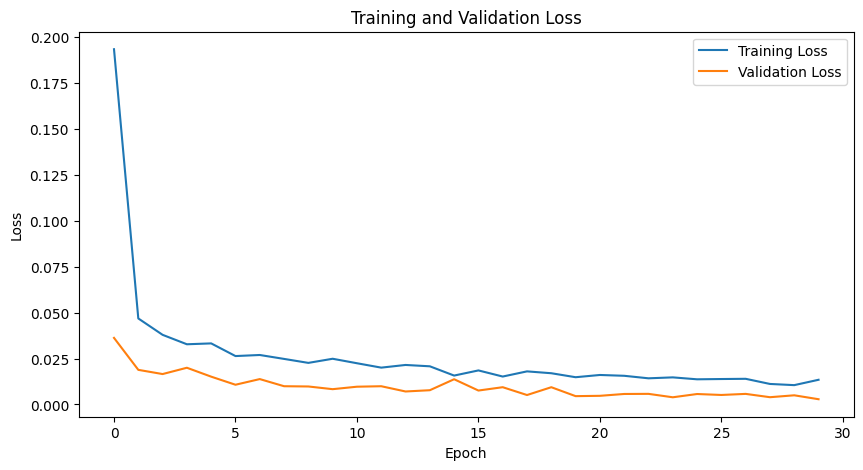

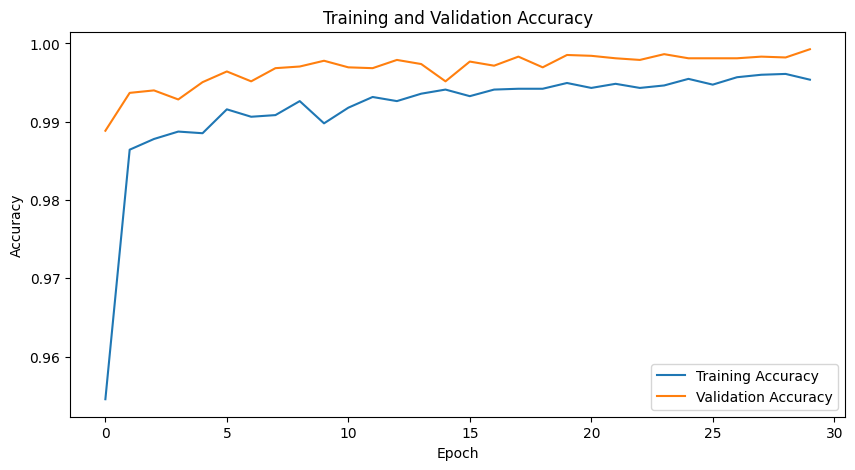

Model saved to /content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_dlp_seed_11111.pt
Epoch 1/30
----------


100%|██████████| 75/75 [00:39<00:00,  1.89it/s]


train Loss: 0.1898 Acc: 0.9515


100%|██████████| 75/75 [00:17<00:00,  4.27it/s]


val Loss: 0.0327 Acc: 0.9899
Saving Best Model with Validation Accuracy:  0.9898989898989898
Epoch 2/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.07it/s]


train Loss: 0.0503 Acc: 0.9848


100%|██████████| 75/75 [00:17<00:00,  4.26it/s]


val Loss: 0.0193 Acc: 0.9941
Saving Best Model with Validation Accuracy:  0.994107744107744
Epoch 3/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.03it/s]


train Loss: 0.0422 Acc: 0.9865


100%|██████████| 75/75 [00:17<00:00,  4.22it/s]


val Loss: 0.0180 Acc: 0.9939
Epoch 4/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.09it/s]


train Loss: 0.0308 Acc: 0.9894


100%|██████████| 75/75 [00:17<00:00,  4.25it/s]


val Loss: 0.0138 Acc: 0.9948
Saving Best Model with Validation Accuracy:  0.9948442760942761
Epoch 5/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.11it/s]


train Loss: 0.0314 Acc: 0.9887


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


val Loss: 0.0126 Acc: 0.9955
Saving Best Model with Validation Accuracy:  0.9954755892255892
Epoch 6/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.10it/s]


train Loss: 0.0319 Acc: 0.9894


100%|██████████| 75/75 [00:17<00:00,  4.21it/s]


val Loss: 0.0109 Acc: 0.9968
Saving Best Model with Validation Accuracy:  0.9968434343434343
Epoch 7/30
----------


100%|██████████| 75/75 [00:18<00:00,  3.98it/s]


train Loss: 0.0242 Acc: 0.9912


100%|██████████| 75/75 [00:17<00:00,  4.26it/s]


val Loss: 0.0101 Acc: 0.9965
Epoch 8/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.05it/s]


train Loss: 0.0237 Acc: 0.9914


100%|██████████| 75/75 [00:17<00:00,  4.32it/s]


val Loss: 0.0105 Acc: 0.9965
Epoch 9/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.09it/s]


train Loss: 0.0263 Acc: 0.9906


100%|██████████| 75/75 [00:17<00:00,  4.27it/s]


val Loss: 0.0119 Acc: 0.9960
Epoch 10/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.05it/s]


train Loss: 0.0203 Acc: 0.9925


100%|██████████| 75/75 [00:17<00:00,  4.23it/s]


val Loss: 0.0088 Acc: 0.9973
Saving Best Model with Validation Accuracy:  0.9972643097643097
Epoch 11/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.14it/s]


train Loss: 0.0198 Acc: 0.9925


100%|██████████| 75/75 [00:17<00:00,  4.25it/s]


val Loss: 0.0105 Acc: 0.9965
Epoch 12/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.11it/s]


train Loss: 0.0213 Acc: 0.9932


100%|██████████| 75/75 [00:17<00:00,  4.37it/s]


val Loss: 0.0074 Acc: 0.9979
Saving Best Model with Validation Accuracy:  0.9978956228956228
Epoch 13/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.04it/s]


train Loss: 0.0189 Acc: 0.9919


100%|██████████| 75/75 [00:17<00:00,  4.29it/s]


val Loss: 0.0077 Acc: 0.9975
Epoch 14/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.06it/s]


train Loss: 0.0194 Acc: 0.9934


100%|██████████| 75/75 [00:17<00:00,  4.30it/s]


val Loss: 0.0072 Acc: 0.9977
Epoch 15/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.12it/s]


train Loss: 0.0177 Acc: 0.9943


100%|██████████| 75/75 [00:17<00:00,  4.17it/s]


val Loss: 0.0061 Acc: 0.9983
Saving Best Model with Validation Accuracy:  0.9983164983164983
Epoch 16/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.07it/s]


train Loss: 0.0186 Acc: 0.9931


100%|██████████| 75/75 [00:17<00:00,  4.24it/s]


val Loss: 0.0072 Acc: 0.9974
Epoch 17/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.10it/s]


train Loss: 0.0181 Acc: 0.9941


100%|██████████| 75/75 [00:17<00:00,  4.35it/s]


val Loss: 0.0056 Acc: 0.9983
Epoch 18/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.14it/s]


train Loss: 0.0177 Acc: 0.9946


100%|██████████| 75/75 [00:17<00:00,  4.22it/s]


val Loss: 0.0056 Acc: 0.9983
Epoch 19/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.12it/s]


train Loss: 0.0175 Acc: 0.9938


100%|██████████| 75/75 [00:17<00:00,  4.32it/s]


val Loss: 0.0054 Acc: 0.9982
Epoch 20/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.11it/s]


train Loss: 0.0163 Acc: 0.9942


100%|██████████| 75/75 [00:17<00:00,  4.36it/s]


val Loss: 0.0066 Acc: 0.9978
Epoch 21/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.10it/s]


train Loss: 0.0168 Acc: 0.9933


100%|██████████| 75/75 [00:17<00:00,  4.29it/s]


val Loss: 0.0046 Acc: 0.9986
Saving Best Model with Validation Accuracy:  0.9986321548821548
Epoch 22/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.15it/s]


train Loss: 0.0139 Acc: 0.9940


100%|██████████| 75/75 [00:17<00:00,  4.32it/s]


val Loss: 0.0045 Acc: 0.9987
Saving Best Model with Validation Accuracy:  0.9987373737373737
Epoch 23/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.12it/s]


train Loss: 0.0195 Acc: 0.9922


100%|██████████| 75/75 [00:17<00:00,  4.27it/s]


val Loss: 0.0058 Acc: 0.9981
Epoch 24/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.13it/s]


train Loss: 0.0175 Acc: 0.9939


100%|██████████| 75/75 [00:17<00:00,  4.30it/s]


val Loss: 0.0042 Acc: 0.9985
Epoch 25/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.15it/s]


train Loss: 0.0096 Acc: 0.9965


100%|██████████| 75/75 [00:17<00:00,  4.35it/s]


val Loss: 0.0040 Acc: 0.9987
Epoch 26/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.04it/s]


train Loss: 0.0118 Acc: 0.9961


100%|██████████| 75/75 [00:17<00:00,  4.32it/s]


val Loss: 0.0050 Acc: 0.9979
Epoch 27/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.16it/s]


train Loss: 0.0140 Acc: 0.9953


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


val Loss: 0.0038 Acc: 0.9988
Saving Best Model with Validation Accuracy:  0.9988425925925926
Epoch 28/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.00it/s]


train Loss: 0.0165 Acc: 0.9939


100%|██████████| 75/75 [00:17<00:00,  4.31it/s]


val Loss: 0.0038 Acc: 0.9992
Saving Best Model with Validation Accuracy:  0.9991582491582491
Epoch 29/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.15it/s]


train Loss: 0.0132 Acc: 0.9952


100%|██████████| 75/75 [00:17<00:00,  4.27it/s]


val Loss: 0.0038 Acc: 0.9987
Epoch 30/30
----------


100%|██████████| 75/75 [00:18<00:00,  3.97it/s]


train Loss: 0.0131 Acc: 0.9952


100%|██████████| 75/75 [00:17<00:00,  4.21it/s]


val Loss: 0.0036 Acc: 0.9991
Training complete in 18m 19s
Best Validation Accuracy: 0.9992


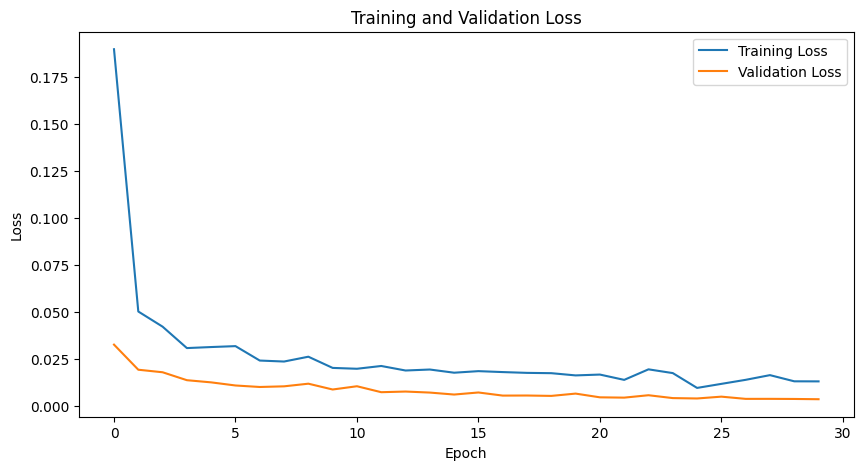

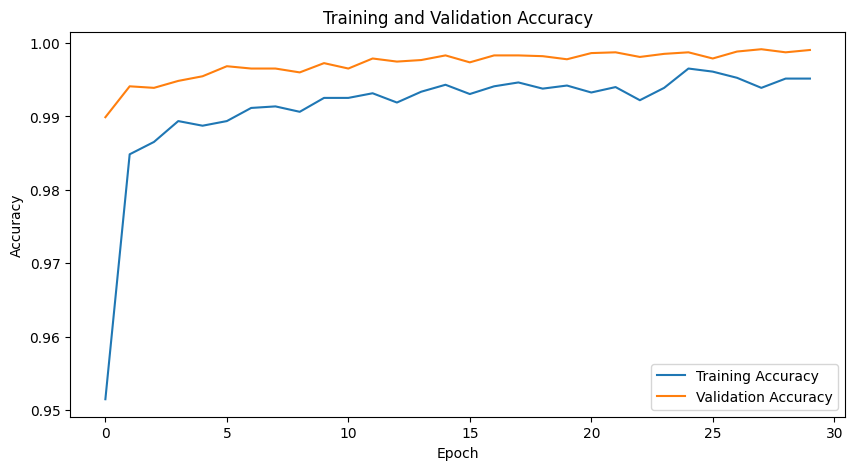

Model saved to /content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_dlp_seed_111111.pt
Epoch 1/30
----------


100%|██████████| 75/75 [01:09<00:00,  1.07it/s]


train Loss: 0.2168 Acc: 0.9533


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


val Loss: 0.0376 Acc: 0.9905
Saving Best Model with Validation Accuracy:  0.990530303030303
Epoch 2/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.09it/s]


train Loss: 0.0676 Acc: 0.9825


100%|██████████| 75/75 [00:17<00:00,  4.25it/s]


val Loss: 0.0199 Acc: 0.9939
Saving Best Model with Validation Accuracy:  0.9938973063973063
Epoch 3/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.10it/s]


train Loss: 0.0477 Acc: 0.9860


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


val Loss: 0.0187 Acc: 0.9939
Epoch 4/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.13it/s]


train Loss: 0.0377 Acc: 0.9867


100%|██████████| 75/75 [00:17<00:00,  4.21it/s]


val Loss: 0.0179 Acc: 0.9938
Epoch 5/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.12it/s]


train Loss: 0.0314 Acc: 0.9896


100%|██████████| 75/75 [00:17<00:00,  4.21it/s]


val Loss: 0.0122 Acc: 0.9958
Saving Best Model with Validation Accuracy:  0.9957912457912458
Epoch 6/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.03it/s]


train Loss: 0.0268 Acc: 0.9916


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


val Loss: 0.0167 Acc: 0.9938
Epoch 7/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.10it/s]


train Loss: 0.0259 Acc: 0.9908


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


val Loss: 0.0127 Acc: 0.9957
Epoch 8/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.05it/s]


train Loss: 0.0241 Acc: 0.9927


100%|██████████| 75/75 [00:17<00:00,  4.24it/s]


val Loss: 0.0120 Acc: 0.9958
Epoch 9/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.17it/s]


train Loss: 0.0226 Acc: 0.9917


100%|██████████| 75/75 [00:17<00:00,  4.20it/s]


val Loss: 0.0097 Acc: 0.9969
Saving Best Model with Validation Accuracy:  0.9969486531986531
Epoch 10/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.09it/s]


train Loss: 0.0222 Acc: 0.9923


100%|██████████| 75/75 [00:17<00:00,  4.22it/s]


val Loss: 0.0090 Acc: 0.9967
Epoch 11/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.05it/s]


train Loss: 0.0209 Acc: 0.9923


100%|██████████| 75/75 [00:17<00:00,  4.26it/s]


val Loss: 0.0080 Acc: 0.9975
Saving Best Model with Validation Accuracy:  0.9974747474747474
Epoch 12/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.09it/s]


train Loss: 0.0189 Acc: 0.9937


100%|██████████| 75/75 [00:17<00:00,  4.29it/s]


val Loss: 0.0074 Acc: 0.9980
Saving Best Model with Validation Accuracy:  0.9980008417508417
Epoch 13/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


train Loss: 0.0195 Acc: 0.9932


100%|██████████| 75/75 [00:17<00:00,  4.27it/s]


val Loss: 0.0071 Acc: 0.9978
Epoch 14/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.13it/s]


train Loss: 0.0184 Acc: 0.9941


100%|██████████| 75/75 [00:17<00:00,  4.25it/s]


val Loss: 0.0081 Acc: 0.9972
Epoch 15/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.17it/s]


train Loss: 0.0192 Acc: 0.9935


100%|██████████| 75/75 [00:17<00:00,  4.32it/s]


val Loss: 0.0080 Acc: 0.9974
Epoch 16/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.10it/s]


train Loss: 0.0189 Acc: 0.9937


100%|██████████| 75/75 [00:17<00:00,  4.33it/s]


val Loss: 0.0073 Acc: 0.9976
Epoch 17/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.14it/s]


train Loss: 0.0177 Acc: 0.9936


100%|██████████| 75/75 [00:17<00:00,  4.26it/s]


val Loss: 0.0072 Acc: 0.9979
Epoch 18/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.07it/s]


train Loss: 0.0171 Acc: 0.9933


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


val Loss: 0.0069 Acc: 0.9977
Epoch 19/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


train Loss: 0.0188 Acc: 0.9927


100%|██████████| 75/75 [00:17<00:00,  4.32it/s]


val Loss: 0.0055 Acc: 0.9984
Saving Best Model with Validation Accuracy:  0.9984217171717171
Epoch 20/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.07it/s]


train Loss: 0.0133 Acc: 0.9949


100%|██████████| 75/75 [00:17<00:00,  4.37it/s]


val Loss: 0.0047 Acc: 0.9985
Saving Best Model with Validation Accuracy:  0.998526936026936
Epoch 21/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.02it/s]


train Loss: 0.0144 Acc: 0.9942


100%|██████████| 75/75 [00:17<00:00,  4.32it/s]


val Loss: 0.0047 Acc: 0.9986
Saving Best Model with Validation Accuracy:  0.9986321548821548
Epoch 22/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.21it/s]


train Loss: 0.0146 Acc: 0.9951


100%|██████████| 75/75 [00:17<00:00,  4.30it/s]


val Loss: 0.0054 Acc: 0.9980
Epoch 23/30
----------


100%|██████████| 75/75 [00:17<00:00,  4.22it/s]


train Loss: 0.0150 Acc: 0.9949


100%|██████████| 75/75 [00:17<00:00,  4.24it/s]


val Loss: 0.0103 Acc: 0.9966
Epoch 24/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.15it/s]


train Loss: 0.0136 Acc: 0.9955


100%|██████████| 75/75 [00:17<00:00,  4.36it/s]


val Loss: 0.0046 Acc: 0.9986
Epoch 25/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.16it/s]


train Loss: 0.0144 Acc: 0.9952


100%|██████████| 75/75 [00:17<00:00,  4.33it/s]


val Loss: 0.0111 Acc: 0.9954
Epoch 26/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.13it/s]


train Loss: 0.0148 Acc: 0.9945


100%|██████████| 75/75 [00:17<00:00,  4.25it/s]


val Loss: 0.0067 Acc: 0.9978
Epoch 27/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.08it/s]


train Loss: 0.0128 Acc: 0.9955


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


val Loss: 0.0034 Acc: 0.9988
Saving Best Model with Validation Accuracy:  0.9988425925925926
Epoch 28/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.15it/s]


train Loss: 0.0145 Acc: 0.9948


100%|██████████| 75/75 [00:17<00:00,  4.34it/s]


val Loss: 0.0036 Acc: 0.9988
Epoch 29/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.12it/s]


train Loss: 0.0146 Acc: 0.9948


100%|██████████| 75/75 [00:17<00:00,  4.24it/s]


val Loss: 0.0036 Acc: 0.9988
Epoch 30/30
----------


100%|██████████| 75/75 [00:18<00:00,  4.11it/s]


train Loss: 0.0165 Acc: 0.9947


100%|██████████| 75/75 [00:17<00:00,  4.26it/s]


val Loss: 0.0034 Acc: 0.9991
Saving Best Model with Validation Accuracy:  0.9990530303030303
Training complete in 18m 47s
Best Validation Accuracy: 0.9991


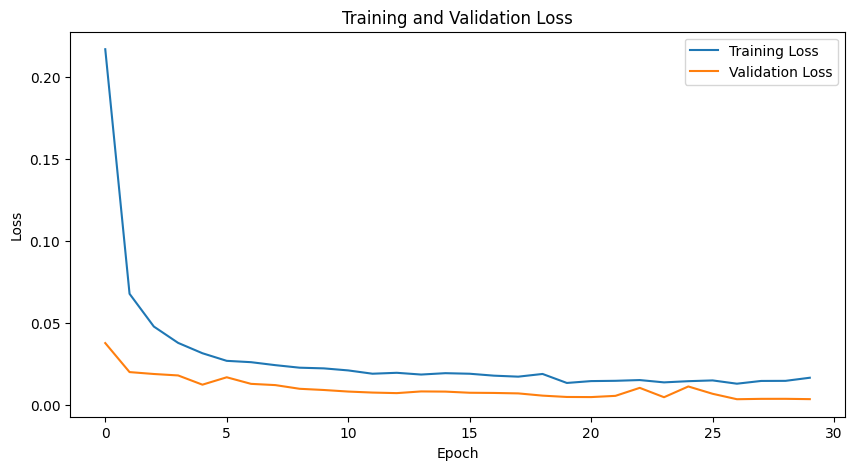

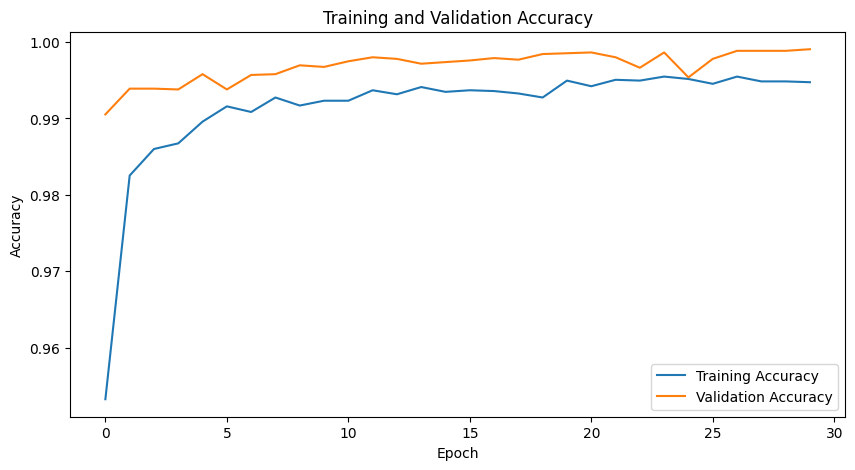

Model saved to /content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_dlp_seed_1111111.pt


In [ ]:
from torchvision import models
import torch
import torch.nn as nn
import torch.optim as optim
from datetime import datetime
import os

# Function for early stopping
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None

    def check(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
        return self.counter >= self.patience


# Define arguments
class Args:
    def __init__(self, seed):
        self.batch_size = 128
        self.epochs = 30  # Increase epochs to allow fine-tuning
        self.lr = 0.001
        self.momentum = 0.9
        self.seed = seed
        self.regularizer_rate = 0.0


# Class weight calculation based on dataset sizes
def calculate_manual_class_weights(dataset_zero_org_size, dataset_zero_fg_size, dataset_two_org_size):
    total_samples = dataset_zero_org_size + dataset_zero_fg_size + dataset_two_org_size

    # Number of classes: 2 (Class 0 and Class 2)
    num_classes = 2

    # Manual class counts
    class_0_count = dataset_zero_org_size + dataset_zero_fg_size
    class_2_count = dataset_two_org_size

    # Calculate weights
    weight_class_0 = total_samples / (num_classes * class_0_count)
    weight_class_2 = total_samples / (num_classes * class_2_count)

    return torch.tensor([weight_class_0, weight_class_2])


# Loop through seeds
seeds = [1111, 11111, 111111, 1111111]
for seed in seeds:
    args = Args(seed)

    # Set random seed for reproducibility
    torch.manual_seed(seed)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Manually calculate class weights
    dataset_zero_org_size = len(os.listdir(zero_org_path))
    dataset_zero_fg_size = len(os.listdir(zero_fg_path))
    dataset_two_org_size = len(os.listdir(two_org_path))
    weights = calculate_manual_class_weights(dataset_zero_org_size, dataset_zero_fg_size, dataset_two_org_size).to(device)

    # Initialize pretrained AlexNet model
    model = models.alexnet(pretrained=True)
    #model.features[0] = nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2)  # Adjust input layer for 1-channel grayscale
    model.classifier[-1] = nn.Linear(4096, 2)  # Update for 10 MNIST classes


    # Freeze convolutional layers
    for param in model.features.parameters():
        param.requires_grad = False
    model.to(device)
    regularizer_rate = args.regularizer_rate
    num_epochs = args.epochs
    params_to_update = model.parameters()
    optimizer = optim.SGD(params_to_update, lr=args.lr, momentum=args.momentum, weight_decay=args.regularizer_rate)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
    class_weights = torch.tensor([2.0, 1.0])
    weights_tensor = class_weights.to(device)
    criterion = nn.CrossEntropyLoss()

    # Early stopping
    early_stopping = EarlyStopping(patience=10)

    # Train the model
    model = train_model(model, dataloaders, criterion, optimizer, num_epochs=args.epochs, resume_training=False, early_stopping=early_stopping)

    # Save the trained model
    parent_dir = "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/"

    pid = datetime.now().strftime('%Y%m%d%H%M%S')
    save_path = os.path.join(parent_dir, f"alexnet_mnist_dlp_seed_{seed}.pt")
    #os.makedirs(os.path.dirname(save_path), exist_ok=True)
    torch.save(model.state_dict(), save_path)
    print(f"Model saved to {save_path}")


In [ ]:
import torch
import os
from torch.utils.data import DataLoader
import torch.nn as nn
from datetime import datetime



def load_model(model_path, device):
    print(f"Loading model from {model_path}")
    model = models.alexnet(pretrained=False)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.classifier[-1] = nn.Linear(4096, 2)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    print("Model loaded successfully")

    # Freelze all layers
    for param in model.parameters():
        param.requires_grad = False

    print("Model loaded and layers frozen successfully")
    return model

# Function to test the model on a specific dataset
def test_model(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels, _ in dataloader:  # Ignore group_label
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total * 100
    return accuracy


# Define paths to the test datasets
test_two_dlp_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/dynamic_patches_left/test/class_2'
test_two_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/test/class_2'
test_zero_dlp_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/dynamic_patches_left/test/class_0'
test_zero_org_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/test/class_0'

# Create test datasets
dataset_test_two_dlp = MnistDataset(path=test_two_dlp_path, is_two=1, group_labels=[1] * len(os.listdir(test_two_dlp_path)))
dataset_test_two_org = MnistDataset(path=test_two_org_path, is_two=1, group_labels=[0] * len(os.listdir(test_two_org_path)))
dataset_test_zero_dlp = MnistDataset(path=test_zero_dlp_path, is_two=0, group_labels=[3] * len(os.listdir(test_zero_dlp_path)))
dataset_test_zero_org = MnistDataset(path=test_zero_org_path, is_two=0, group_labels=[2] * len(os.listdir(test_zero_org_path)))

# Create dataloaders for the test datasets
batch_size = 64
test_loader_dlp = DataLoader(dataset_test_two_dlp, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader_org = DataLoader(dataset_test_two_org, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader_zero_dlp = DataLoader(dataset_test_zero_dlp, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader_zero_org = DataLoader(dataset_test_zero_org, batch_size=batch_size, shuffle=False, num_workers=2)

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load and test the model for each seed
seeds = [1, 11, 111, 1111, 11111]


for seed in seeds:
    model_path = f"/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_dlp_seed_{seed}.pt"

    print(f"\nLoading model with seed {seed}")
    model = load_model(model_path, device)

    # Test on patches_left dataset
    accuracy_dlp = test_model(model, test_loader_dlp, device)
    print(f"Accuracy on colored dlp test dataset (class_2): {accuracy_dlp:.2f}%")

    # Test on original dataset
    accuracy_org = test_model(model, test_loader_org, device)
    print(f"Accuracy on original dlp test dataset (class_2): {accuracy_org:.2f}%")

    accuracy_zero_dlp = test_model(model, test_loader_zero_dlp, device)
    print(f"Accuracy on colored dlp test dataset (class_0): {accuracy_zero_fg:.2f}%")

    accuracy_zero_org = test_model(model, test_loader_zero_org, device)
    print(f"Accuracy on original dlp test dataset (class_0): {accuracy_zero_org:.2f}%")


Loading model with seed 1
Loading model from /content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_dlp_seed_1.pt


<ipython-input-10-7c7ff008ee5a>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


Model loaded successfully
Model loaded and layers frozen successfully
Accuracy on colored dlp test dataset (class_2): 0.97%
Accuracy on original dlp test dataset (class_2): 99.22%
Accuracy on colored dlp test dataset (class_0): 100.00%
Accuracy on original dlp test dataset (class_0): 99.29%

Loading model with seed 11
Loading model from /content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_dlp_seed_11.pt
Model loaded successfully
Model loaded and layers frozen successfully
Accuracy on colored dlp test dataset (class_2): 3.88%
Accuracy on original dlp test dataset (class_2): 99.42%
Accuracy on colored dlp test dataset (class_0): 100.00%
Accuracy on original dlp test dataset (class_0): 99.39%

Loading model with seed 111
Loading model from /content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_dlp_seed_111.pt
Model loaded successfully
Model loaded and layers frozen successfully
Accuracy on colored dlp test dataset (

## Activation Extraction

### Original vs. Colored Background

#### Correlation

In [ ]:
import os
import numpy as np
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import gc
from scipy.stats import pearsonr
from torch.utils.data import DataLoader, Dataset

def load_model(model_path, device):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Loading model from {model_path}")
    model = models.alexnet(pretrained=False)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.classifier[-1] = nn.Linear(4096, 2)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    print("Model loaded successfully")

    # Freelze all layers
    for param in model.parameters():
        param.requires_grad = False

    print("Model loaded and layers frozen successfully")
    return model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Preprocessing function
preprocess = transforms.Compose([
    transforms.Resize((64, 64)),  # Match the resize shape in MnistDataset
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Match the normalization values in MnistDataset
])


class ImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image


def preprocess_and_extract_activations(model, dataloader, layer):
    activations = []
    with torch.no_grad():
        for image_tensor in dataloader:
            image_tensor = image_tensor.to(device)

            # Extract activations according to the AlexNet model's structure
            if layer == 0:  # After Layer 1
                tensor = model.layer1(image_tensor)
            elif layer == 1:  # After Layer 2
                tensor = model.layer2(model.layer1(image_tensor))
            elif layer == 2:  # After Layer 3
                tensor = model.layer3(model.layer2(model.layer1(image_tensor)))
            elif layer == 3:  # After Layer 4
                tensor = model.layer4(model.layer3(model.layer2(model.layer1(image_tensor))))
            elif layer == 4:  # After Layer 5
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
            elif layer == 5:  # After FC1
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 1 * 1)  # Reshape to match the input to FC1
                tensor = model.fc1(tensor)
            elif layer == 6:  # After FC2
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 1 * 1)  # Reshape to match the input to FC1
                tensor = model.fc2(model.fc1(tensor))
            elif layer == 7:  # After FC3 (Output)
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 1 * 1)  # Reshape to match the input to FC1
                tensor = model.fc3(model.fc2(model.fc1(tensor)))

            activation = tensor.cpu().numpy()
            activations.append(activation)

            # Clear memory
            del tensor
            torch.cuda.empty_cache()
            gc.collect()

    return activations


def extract_fc2_activations(model, dataloader):
    print("Extracting Alexnet activations for layer fc2...")
    activations = []
    with torch.no_grad():
        for image_tensor in dataloader:
            image_tensor = image_tensor.to(device)
            tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
            tensor = tensor.view(-1, 256 * 1 * 1)
            tensor = model.fc2(model.fc1(tensor))
            activations.append(tensor.cpu().numpy())
            print(f"Processed {len(activations)} images")
            torch.cuda.empty_cache()
            gc.collect()
    return np.vstack(activations)


def extract_and_save_fc2_activations(model, dataloader, folder_name, filename):
    print("Extracting and saving Alexnet activations for layer fc2...")
    # Extract activations using the existing function
    activations = extract_fc2_activations(model, dataloader)

    # Define the save path in Google Drive
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}.npy'
    os.makedirs(os.path.dirname(drive_path), exist_ok=True)

    # Save the activations as a .npy file
    np.save(drive_path, activations)
    print(f"Alexnet Activations for layer fc2 saved to {drive_path}")

# Project activations into sparse space
def project_activations(autoencoder, activations, device):
    print("Projecting Alexnet activations into SAE sparse space...")
    with torch.no_grad():
        projected = autoencoder.encoder(torch.from_numpy(activations).to(device).float())
    return projected.cpu().numpy()

def process_images_in_folder(model, folder_path, layer, batch_size=10):
    all_layer_activations = []

    image_paths = [os.path.join(root, file)
                   for root, dirs, files in os.walk(folder_path)
                   for file in files if file.endswith('.png')]

    dataset = ImageDataset(image_paths=image_paths, transform=preprocess)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Process in smaller batches to avoid memory issues
    for i, batch in enumerate(dataloader):
        batch_activations = preprocess_and_extract_activations(model, [batch], layer)
        all_layer_activations.extend(batch_activations)
        torch.cuda.empty_cache()
        gc.collect()

    return all_layer_activations

def flatten_and_align_activations(activations_list):
    # Flatten activations and find the maximum length
    flat_activations = [act.flatten() for act in activations_list]
    max_length = max(len(act) for act in flat_activations)

    # Pad or truncate activations to the maximum length
    aligned_activations = []
    for activation in flat_activations:
        if len(activation) < max_length:
            padded_activation = np.pad(activation, (0, max_length - len(activation)), 'constant')
        else:
            padded_activation = activation[:max_length]
        aligned_activations.append(padded_activation)
    return np.vstack(aligned_activations)

def save_activations(all_layer_activations, folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    os.makedirs(os.path.dirname(drive_path), exist_ok=True)
    np.save(drive_path, all_layer_activations)

def load_activations(folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    return np.load(drive_path, allow_pickle=True).item()

def compute_activations_for_layers(model_paths, patch_folder, no_patch_folder, layers, activations_file='activations.npy'):
    if os.path.exists(f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/original/{activations_file}') and \
       os.path.exists(f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/background/{activations_file}'):
        print(f"Loading activations from {activations_file}")
        wp_activations = load_activations('background', activations_file)
        wo_activations = load_activations('original', activations_file)
        return {layer: {'wp': wp_activations[layer], 'wo': wo_activations[layer]} for layer in layers}

    print(f"Computing activations and saving to {activations_file}")
    all_layer_activations = {layer: {'wp': [], 'wo': []} for layer in layers}
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    for model_path in model_paths:
        model = load_model(model_path, device)
        for layer in layers:
            wp_activations = process_images_in_folder(model, patch_folder, layer)
            wo_activations = process_images_in_folder(model, no_patch_folder, layer)
            all_layer_activations[layer]['wp'].append(flatten_and_align_activations(wp_activations))
            all_layer_activations[layer]['wo'].append(flatten_and_align_activations(wo_activations))
        del model  # Free model resources after use
        torch.cuda.empty_cache()
        gc.collect()

    for layer in layers:
        save_activations(all_layer_activations[layer]['wp'], 'background', f'{activations_file}_{layer}.npy')
        save_activations(all_layer_activations[layer]['wo'], 'original', f'{activations_file}_{layer}.npy')

    return all_layer_activations

def compute_avg_std_activations(all_layer_activations, layers):
    layer_avg_std = {layer: {'wp_avg': None, 'wo_avg': None, 'wp_std': None, 'wo_std': None} for layer in layers}

    for layer in layers:
        wp_all_models_layer_activations = np.stack(all_layer_activations[layer]['wp'], axis=0)
        wo_all_models_layer_activations = np.stack(all_layer_activations[layer]['wo'], axis=0)

        wp_avg = np.mean(wp_all_models_layer_activations, axis=0)
        wo_avg = np.mean(wo_all_models_layer_activations, axis=0)
        wp_std = np.std(wp_all_models_layer_activations, axis=0)
        wo_std = np.std(wo_all_models_layer_activations, axis=0)

        layer_avg_std[layer]['wp_avg'] = wp_avg
        layer_avg_std[layer]['wo_avg'] = wo_avg
        layer_avg_std[layer]['wp_std'] = wp_std
        layer_avg_std[layer]['wo_std'] = wo_std

    return layer_avg_std

def plot_histogram_for_layer(layer_avg_std, layer, layer_name, color):
    wp_avg = layer_avg_std[layer]['wp_avg']
    wo_avg = layer_avg_std[layer]['wo_avg']
    wp_std = layer_avg_std[layer]['wp_std']
    wo_std = layer_avg_std[layer]['wo_std']

    x = np.linspace(start=-1, stop=1, num=100)
    xaxis = x + (x[1] - x[0]) / 2
    xaxis = xaxis[:-1]

    patch_no_patch = np.hstack([np.zeros(len(wo_avg)), np.ones(len(wp_avg))])
    combined_activations = np.vstack((wo_avg, wp_avg))

    A = []
    for ii in range(combined_activations.shape[1]):
        A.append(pearsonr(patch_no_patch, combined_activations[:, ii])[0])

    B = np.histogram(A, bins=x)

    bin_means = B[0]
    bin_stds = np.std(bin_means)

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    ax.plot(xaxis, bin_means, '-', color=color, label=layer_name)
    ax.fill_between(xaxis, bin_means - bin_stds, bin_means + bin_stds, color=color, alpha=0.2)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'Histogram of Activations Correlation for {layer_name}')
    plt.xlabel('Correlation')
    plt.ylabel('Number of Neurons')
    plt.show()

def plot_combined_histogram(layer_avg_std, layer_names, colors):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    x = np.linspace(start=-1, stop=1, num=100)
    xaxis = x + (x[1] - x[0]) / 2
    xaxis = xaxis[:-1]

    all_layer_bin_means = []

    for idx, (layer, layer_name) in enumerate(layer_names.items()):
        wp_avg = layer_avg_std[layer]['wp_avg']
        wo_avg = layer_avg_std[layer]['wo_avg']
        wp_std = layer_avg_std[layer]['wp_std']
        wo_std = layer_avg_std[layer]['wo_std']

        patch_no_patch = np.hstack([np.zeros(len(wo_avg)), np.ones(len(wp_avg))])
        combined_activations = np.vstack((wo_avg, wp_avg))

        A = []
        for ii in range(combined_activations.shape[1]):
            A.append(pearsonr(patch_no_patch, combined_activations[:, ii])[0])

        B = np.histogram(A, bins=x)

        bin_means = B[0] / np.sum(B[0])  # Normalize the bin counts
        bin_stds = np.std(bin_means)

        all_layer_bin_means.append(bin_means)

        ax.plot(xaxis, bin_means, '-', color=colors[idx], label=layer_name)
        ax.fill_between(xaxis, bin_means - bin_stds, bin_means + bin_stds, color=colors[idx], alpha=0.2)

    # Compute average and standard deviation of the normalized histograms across layers
    all_layer_bin_means = np.array(all_layer_bin_means)
    avg_bin_means = np.mean(all_layer_bin_means, axis=0)
    std_bin_means = np.std(all_layer_bin_means, axis=0)

    ax.plot(xaxis, avg_bin_means, '-', color='black', label='Average')
    ax.fill_between(xaxis, avg_bin_means - std_bin_means, avg_bin_means + std_bin_means, color='black', alpha=0.2)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Normalized Histogram of Activations Correlation for All Layers')
    plt.xlabel('Correlation')
    plt.ylabel('Normalized Number of Neurons')
    plt.show()

# Main execution
layers_of_interest = [6]  # Adjusted to match the custom model layers
layer_names = {
    #0: "Layer 1",
    #1: "Layer 2",
    #2: "Layer 3",
    #3: "Layer 4",
    #4: "Layer 5",
    #5: "FC1",
    6: "FC2",
    #7: "FC3"
}
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

bg_mnist_folder_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/test/class_2'
org_mnist_folder_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/test/class_2'

model_paths = [
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnetmp_mnist_bg_seed_1.pt",
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnetmp_mnist_bg_seed_11.pt",
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnetmp_mnist_bg_seed_111.pt"
]

all_layer_activations = compute_activations_for_layers(model_paths, bg_mnist_folder_path, org_mnist_folder_path, layers_of_interest)
layer_avg_std = compute_avg_std_activations(all_layer_activations, layers_of_interest)

# Plot histograms for each layer
for idx, (layer, layer_name) in enumerate(layer_names.items()):
    plot_histogram_for_layer(layer_avg_std, layer, layer_name, colors[idx])

# Plot combined histogram for all layers
plot_combined_histogram(layer_avg_std, layer_names, colors)


Computing activations and saving to activations.npy
Loading model from /content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnetmp_mnist_bg_seed_1.pt


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-8-08f85461b576>:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions

Model loaded successfully
Model loaded and layers frozen successfully


AttributeError: 'AlexNet' object has no attribute 'layer5'

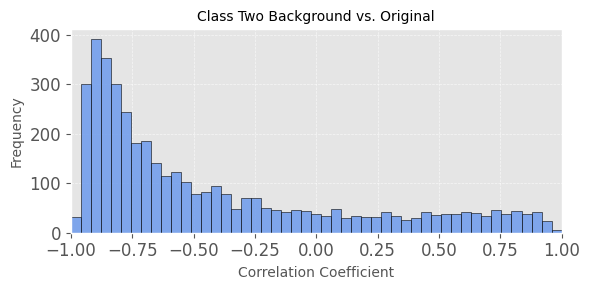

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load and flatten activations
def load_and_flatten_activations(paths):
    activations = [np.load(path) for path in paths]
    flat_activations = [act.reshape(act.shape[0], -1) for act in activations]
    return np.vstack(flat_activations)

# Define paths to activation files for patch and no-patch
seeds = [1, 11, 111]
test_activation_two_patch_paths = [
    f"/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/alexnetmp_mnist_finetune_bg/fc2_activations_test_two_bg_alexnetmp_mnist_bg_seed_{seed}.npy"
    for seed in seeds
]
test_activation_two_no_patch_paths = [
    f"/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/alexnetmp_mnist_finetune_bg/fc2_activations_test_two_org_alexnetmp_mnist_bg_seed_{seed}.npy"
    for seed in seeds
]

# Load activations
patch_activations = load_and_flatten_activations(test_activation_two_patch_paths)
no_patch_activations = load_and_flatten_activations(test_activation_two_no_patch_paths)

# Combine activations for correlation calculation
combined_activations = np.vstack((no_patch_activations, patch_activations))
patch_no_patch_labels = np.hstack((np.zeros(no_patch_activations.shape[0]), np.ones(patch_activations.shape[0])))

# Compute Pearson correlation for each neuron
correlations = [
    pearsonr(patch_no_patch_labels, combined_activations[:, i])[0]
    for i in range(combined_activations.shape[1])
]

# Enhanced Histogram Plot
plt.style.use('ggplot')  # Use a valid Matplotlib style

fig, ax = plt.subplots(figsize=(6, 3))
x_bins = np.linspace(-1, 1, 50)  # Fewer, wider bins for a smoother histogram
ax.hist(correlations, bins=x_bins, color='cornflowerblue', edgecolor='black', alpha=0.8)

# Add titles and labels with better font sizes
ax.set_title('Class Two Background vs. Original', fontsize=10)
ax.set_xlabel('Correlation Coefficient', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)

# Gridlines and axis enhancements
ax.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_xlim([-1, 1])
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


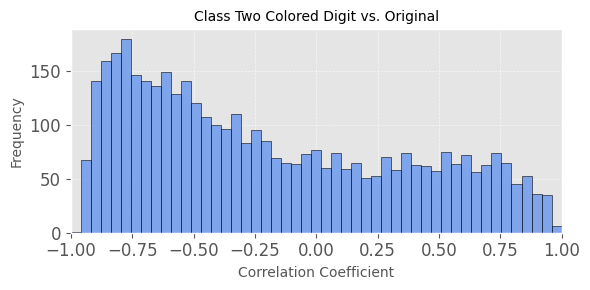

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load and flatten activations
def load_and_flatten_activations(paths):
    activations = [np.load(path) for path in paths]
    flat_activations = [act.reshape(act.shape[0], -1) for act in activations]
    return np.vstack(flat_activations)

# Define paths to activation files for patch and no-patch
seeds = [1, 11, 111]
test_activation_two_patch_paths = [
    f"/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/alexnet_mnist_finetune_fg_l1/fc2_activations_test_two_fg_alexnet_mnist_fg_seed_{seed}.npy"
    for seed in seeds
]
test_activation_two_no_patch_paths = [
    f"/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/alexnet_mnist_finetune_fg_l1/fc2_activations_test_two_org_alexnet_mnist_fg_seed_{seed}.npy"
    for seed in seeds
]

# Load activations
patch_activations = load_and_flatten_activations(test_activation_two_patch_paths)
no_patch_activations = load_and_flatten_activations(test_activation_two_no_patch_paths)

# Combine activations for correlation calculation
combined_activations = np.vstack((no_patch_activations, patch_activations))
patch_no_patch_labels = np.hstack((np.zeros(no_patch_activations.shape[0]), np.ones(patch_activations.shape[0])))

# Compute Pearson correlation for each neuron
correlations = [
    pearsonr(patch_no_patch_labels, combined_activations[:, i])[0]
    for i in range(combined_activations.shape[1])
]

# Enhanced Histogram Plot
plt.style.use('ggplot')  # Use a valid Matplotlib style

fig, ax = plt.subplots(figsize=(6, 3))
x_bins = np.linspace(-1, 1, 50)  # Fewer, wider bins for a smoother histogram
ax.hist(correlations, bins=x_bins, color='cornflowerblue', edgecolor='black', alpha=0.8)

# Add titles and labels with better font sizes
ax.set_title('Class Two Colored Digit vs. Original', fontsize=10)
ax.set_xlabel('Correlation Coefficient', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)

# Gridlines and axis enhancements
ax.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_xlim([-1, 1])
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


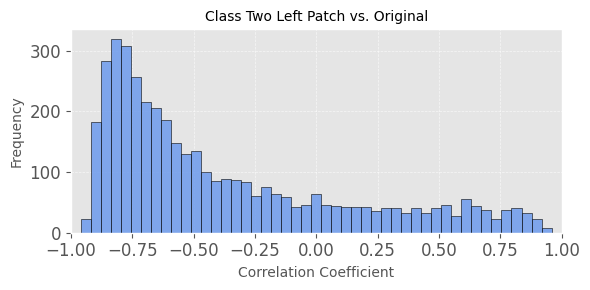

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load and flatten activations
def load_and_flatten_activations(paths):
    activations = [np.load(path) for path in paths]
    flat_activations = [act.reshape(act.shape[0], -1) for act in activations]
    return np.vstack(flat_activations)

# Define paths to activation files for patch and no-patch
seeds = [1, 11, 111]
test_activation_two_patch_paths = [
    f"/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/alexnet_mnist_finetune_dlp/fc2_activations_test_two_dlp_alexnet_mnist_finetune_dlp_seed_{seed}.npy"
    for seed in seeds
]
test_activation_two_no_patch_paths = [
    f"/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/alexnet_mnist_finetune_dlp/fc2_activations_test_two_org_alexnet_mnist_finetune_dlp_seed_{seed}.npy"
    for seed in seeds
]

# Load activations
patch_activations = load_and_flatten_activations(test_activation_two_patch_paths)
no_patch_activations = load_and_flatten_activations(test_activation_two_no_patch_paths)

# Combine activations for correlation calculation
combined_activations = np.vstack((no_patch_activations, patch_activations))
patch_no_patch_labels = np.hstack((np.zeros(no_patch_activations.shape[0]), np.ones(patch_activations.shape[0])))

# Compute Pearson correlation for each neuron
correlations = [
    pearsonr(patch_no_patch_labels, combined_activations[:, i])[0]
    for i in range(combined_activations.shape[1])
]

# Enhanced Histogram Plot
plt.style.use('ggplot')  # Use a valid Matplotlib style

fig, ax = plt.subplots(figsize=(6, 3))
x_bins = np.linspace(-1, 1, 50)  # Fewer, wider bins for a smoother histogram
ax.hist(correlations, bins=x_bins, color='cornflowerblue', edgecolor='black', alpha=0.8)

# Add titles and labels with better font sizes
ax.set_title('Class Two Left Patch vs. Original', fontsize=10)
ax.set_xlabel('Correlation Coefficient', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)

# Gridlines and axis enhancements
ax.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_xlim([-1, 1])
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


#### Two sample t-test

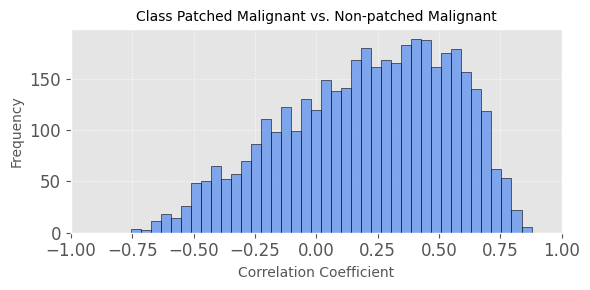

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load and flatten activations
def load_and_flatten_activations(paths):
    activations = [np.load(path) for path in paths]
    flat_activations = [act.reshape(act.shape[0], -1) for act in activations]
    return np.vstack(flat_activations)

# Define paths to activation files for patch and no-patch
seeds = [21, 211, 2111]
test_activation_two_patch_paths = [
    f"/content/drive/MyDrive/Masterthesis/Datasets/isic/activations/alexnet_isic/fc2_activations_val_malignant_patch_alexnet_isic_{seed}.npy"
    for seed in seeds
]
test_activation_two_no_patch_paths = [
    f"/content/drive/MyDrive/Masterthesis/Datasets/isic/activations/alexnet_isic/fc2_activations_val_malignant_no_patch_alexnet_isic_{seed}.npy"
    for seed in seeds
]

# Load activations
patch_activations = load_and_flatten_activations(test_activation_two_patch_paths)
no_patch_activations = load_and_flatten_activations(test_activation_two_no_patch_paths)

# Combine activations for correlation calculation
combined_activations = np.vstack((no_patch_activations, patch_activations))
patch_no_patch_labels = np.hstack((np.zeros(no_patch_activations.shape[0]), np.ones(patch_activations.shape[0])))

# Compute Pearson correlation for each neuron
correlations = [
    pearsonr(patch_no_patch_labels, combined_activations[:, i])[0]
    for i in range(combined_activations.shape[1])
]

# Enhanced Histogram Plot
plt.style.use('ggplot')  # Use a valid Matplotlib style

fig, ax = plt.subplots(figsize=(6, 3))
x_bins = np.linspace(-1, 1, 50)  # Fewer, wider bins for a smoother histogram
ax.hist(correlations, bins=x_bins, color='cornflowerblue', edgecolor='black', alpha=0.8)

# Add titles and labels with better font sizes
ax.set_title('Class Patched Malignant vs. Non-patched Malignant', fontsize=10)
ax.set_xlabel('Correlation Coefficient', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)

# Gridlines and axis enhancements
ax.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_xlim([-1, 1])
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load activations
def load_activations(folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    return np.load(drive_path, allow_pickle=True)

# Perform two-sample t-tests comparing neuron activations
def perform_two_sample_t_tests(background_activations, original_activations):
    t_test_results = {}
    for layer in background_activations.keys():
        wp_activations = np.vstack(background_activations[layer])
        wo_activations = np.vstack(original_activations[layer])

        # Perform two-sample t-test for each neuron
        ttest_result = ttest_ind(wp_activations, wo_activations, axis=0)

        # Bonferroni Correction: Calculate the number of comparisons (neurons)
        num_comparisons = wp_activations.shape[1]  # Number of neurons
        adjusted_p_values = np.minimum(ttest_result.pvalue * num_comparisons, 1.0)  # Adjust p-values

        t_test_results[layer] = {
            'ttest': ttest_result,
            'raw_pvalue': ttest_result.pvalue,  # Store raw p-values
            'adjusted_pvalue': adjusted_p_values,
            'wp_means': np.mean(wp_activations, axis=0),
            'wo_means': np.mean(wo_activations, axis=0)
        }
    return t_test_results

# Print t-test results with percentages of neurons below or equal to specific p-values
def print_t_test_results(t_test_results):
    for layer, results in t_test_results.items():
        wp_means = results['wp_means']
        wo_means = results['wo_means']
        raw_pvalue = results['raw_pvalue']
        adjusted_pvalue = results['adjusted_pvalue']

        # Calculate the percentage of neurons below or equal to specific p-value thresholds
        below_or_equal_0_05_raw = np.mean(raw_pvalue <= 0.05) * 100
        below_or_equal_0_02_raw = np.mean(raw_pvalue <= 0.02) * 100
        below_or_equal_0_05_adj = np.mean(adjusted_pvalue <= 0.05) * 100
        below_or_equal_0_02_adj = np.mean(adjusted_pvalue <= 0.02) * 100

        print(f"Layer {layer}:")
        print("  WP Activations:")
        print(f"    Mean: {wp_means.mean():.4f}")
        print("  WO Activations:")
        print(f"    Mean: {wo_means.mean():.4f}")
        print("  T-Test (before Bonferroni correction):")
        print(f"    Percentage of neurons with raw p-value <= 0.05: {below_or_equal_0_05_raw:.2f}%")
        print(f"    Percentage of neurons with raw p-value <= 0.02: {below_or_equal_0_02_raw:.2f}%")
        print("  T-Test (after Bonferroni correction):")
        print(f"    Percentage of neurons with adjusted p-value <= 0.05: {below_or_equal_0_05_adj:.2f}%")
        print(f"    Percentage of neurons with adjusted p-value <= 0.02: {below_or_equal_0_02_adj:.2f}%")
        print("-" * 50)

# Plot the p-values to visualize significance
def plot_p_values(t_test_results):
    num_layers = len(t_test_results)
    num_cols = 3
    num_rows = (num_layers + num_cols - 1) // num_cols

    plt.figure(figsize=(15, 5 * num_rows))
    for idx, (layer, results) in enumerate(t_test_results.items()):
        p_values = results['ttest'].pvalue

        ax = plt.subplot(num_rows, num_cols, idx + 1)
        ax.hist(p_values, bins=50, alpha=0.6, label='p-values')
        ax.set_title(f'Layer {layer}')
        ax.set_xlabel('p-value')
        ax.set_ylabel('Frequency')
        ax.legend()
    plt.tight_layout()
    plt.show()

# Main execution
layers_of_interest = [0, 1, 2, 3, 4, 5, 6, 7]  # Adjusted to match the custom model layers

# Load activations for both background and original conditions
background_activations = {layer: load_activations('background', f'activations.npy_{layer}.npy') for layer in layers_of_interest}
original_activations = {layer: load_activations('original', f'activations.npy_{layer}.npy') for layer in layers_of_interest}

# Perform two-sample t-tests
t_test_results = perform_two_sample_t_tests(background_activations, original_activations)

# Print t-test results
print_t_test_results(t_test_results)

# Plot p-values
#plot_p_values(t_test_results)


Layer 0:
  WP Activations:
    Mean: 2.2018
  WO Activations:
    Mean: 1.8976
  T-Test (before Bonferroni correction):
    Percentage of neurons with raw p-value <= 0.05: 87.42%
    Percentage of neurons with raw p-value <= 0.02: 84.97%
  T-Test (after Bonferroni correction):
    Percentage of neurons with adjusted p-value <= 0.05: 70.10%
    Percentage of neurons with adjusted p-value <= 0.02: 69.08%
--------------------------------------------------
Layer 1:
  WP Activations:
    Mean: 2.0785
  WO Activations:
    Mean: 1.9095
  T-Test (before Bonferroni correction):
    Percentage of neurons with raw p-value <= 0.05: 81.31%
    Percentage of neurons with raw p-value <= 0.02: 77.93%
  T-Test (after Bonferroni correction):
    Percentage of neurons with adjusted p-value <= 0.05: 56.12%
    Percentage of neurons with adjusted p-value <= 0.02: 54.52%
--------------------------------------------------
Layer 2:
  WP Activations:
    Mean: 0.9079
  WO Activations:
    Mean: 0.7468
  T-Tes

### Original vs. Colored Digit (Foreground - fg)

#### Correlation

In [ ]:
import os
import numpy as np
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import gc
from scipy.stats import pearsonr
from torch.utils.data import DataLoader, Dataset

def load_model(model_path):
    model = AlexNet()
    model.load_state_dict(torch.load(model_path))
    model.to(device)
    model.eval()
    return model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Preprocessing function
preprocess = transforms.Compose([
    transforms.Resize((64, 64)),  # Match the resize shape in MnistDataset
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Match the normalization values in MnistDataset
])


class ImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image


def preprocess_and_extract_activations(model, dataloader, layer):
    activations = []
    with torch.no_grad():
        for image_tensor in dataloader:
            image_tensor = image_tensor.to(device)

            # Extract activations according to the AlexNet model's structure
            if layer == 0:  # After Layer 1
                tensor = model.layer1(image_tensor)
            elif layer == 1:  # After Layer 2
                tensor = model.layer2(model.layer1(image_tensor))
            elif layer == 2:  # After Layer 3
                tensor = model.layer3(model.layer2(model.layer1(image_tensor)))
            elif layer == 3:  # After Layer 4
                tensor = model.layer4(model.layer3(model.layer2(model.layer1(image_tensor))))
            elif layer == 4:  # After Layer 5
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
            elif layer == 5:  # After FC1
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 1 * 1)  # Reshape to match the input to FC1
                tensor = model.fc1(tensor)
            elif layer == 6:  # After FC2
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 1 * 1)  # Reshape to match the input to FC1
                tensor = model.fc2(model.fc1(tensor))
            elif layer == 7:  # After FC3 (Output)
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 1 * 1)  # Reshape to match the input to FC1
                tensor = model.fc3(model.fc2(model.fc1(tensor)))

            activation = tensor.cpu().numpy()
            activations.append(activation)

            # Clear memory
            del tensor
            torch.cuda.empty_cache()
            gc.collect()

    return activations



def process_images_in_folder(model, folder_path, layer, batch_size=10):
    all_layer_activations = []

    image_paths = [os.path.join(root, file)
                   for root, dirs, files in os.walk(folder_path)
                   for file in files if file.endswith('.png')]

    dataset = ImageDataset(image_paths=image_paths, transform=preprocess)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Process in smaller batches to avoid memory issues
    for i, batch in enumerate(dataloader):
        batch_activations = preprocess_and_extract_activations(model, [batch], layer)
        all_layer_activations.extend(batch_activations)
        torch.cuda.empty_cache()
        gc.collect()

    return all_layer_activations

def flatten_and_align_activations(activations_list):
    # Flatten activations and find the maximum length
    flat_activations = [act.flatten() for act in activations_list]
    max_length = max(len(act) for act in flat_activations)

    # Pad or truncate activations to the maximum length
    aligned_activations = []
    for activation in flat_activations:
        if len(activation) < max_length:
            padded_activation = np.pad(activation, (0, max_length - len(activation)), 'constant')
        else:
            padded_activation = activation[:max_length]
        aligned_activations.append(padded_activation)
    return np.vstack(aligned_activations)

def save_activations(all_layer_activations, folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    os.makedirs(os.path.dirname(drive_path), exist_ok=True)
    np.save(drive_path, all_layer_activations)

def load_activations(folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    return np.load(drive_path, allow_pickle=True).item()

def compute_activations_for_layers(model_paths, patch_folder, no_patch_folder, layers, activations_file='activations.npy'):
    if os.path.exists(f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/original/{activations_file}') and \
       os.path.exists(f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/foreground/{activations_file}'):
        print(f"Loading activations from {activations_file}")
        wp_activations = load_activations('foreground', activations_file)
        wo_activations = load_activations('original', activations_file)
        return {layer: {'wp': wp_activations[layer], 'wo': wo_activations[layer]} for layer in layers}

    print(f"Computing activations and saving to {activations_file}")
    all_layer_activations = {layer: {'wp': [], 'wo': []} for layer in layers}

    for model_path in model_paths:
        model = load_model(model_path)
        for layer in layers:
            wp_activations = process_images_in_folder(model, patch_folder, layer)
            wo_activations = process_images_in_folder(model, no_patch_folder, layer)
            all_layer_activations[layer]['wp'].append(flatten_and_align_activations(wp_activations))
            all_layer_activations[layer]['wo'].append(flatten_and_align_activations(wo_activations))
        del model  # Free model resources after use
        torch.cuda.empty_cache()
        gc.collect()

    for layer in layers:
        save_activations(all_layer_activations[layer]['wp'], 'foreground', f'{activations_file}_{layer}.npy')
        save_activations(all_layer_activations[layer]['wo'], 'original', f'{activations_file}_{layer}.npy')

    return all_layer_activations

def compute_avg_std_activations(all_layer_activations, layers):
    layer_avg_std = {layer: {'wp_avg': None, 'wo_avg': None, 'wp_std': None, 'wo_std': None} for layer in layers}

    for layer in layers:
        wp_all_models_layer_activations = np.stack(all_layer_activations[layer]['wp'], axis=0)
        wo_all_models_layer_activations = np.stack(all_layer_activations[layer]['wo'], axis=0)

        wp_avg = np.mean(wp_all_models_layer_activations, axis=0)
        wo_avg = np.mean(wo_all_models_layer_activations, axis=0)
        wp_std = np.std(wp_all_models_layer_activations, axis=0)
        wo_std = np.std(wo_all_models_layer_activations, axis=0)

        layer_avg_std[layer]['wp_avg'] = wp_avg
        layer_avg_std[layer]['wo_avg'] = wo_avg
        layer_avg_std[layer]['wp_std'] = wp_std
        layer_avg_std[layer]['wo_std'] = wo_std

    return layer_avg_std

def plot_histogram_for_layer(layer_avg_std, layer, layer_name, color):
    wp_avg = layer_avg_std[layer]['wp_avg']
    wo_avg = layer_avg_std[layer]['wo_avg']
    wp_std = layer_avg_std[layer]['wp_std']
    wo_std = layer_avg_std[layer]['wo_std']

    x = np.linspace(start=-1, stop=1, num=100)
    xaxis = x + (x[1] - x[0]) / 2
    xaxis = xaxis[:-1]

    patch_no_patch = np.hstack([np.zeros(len(wo_avg)), np.ones(len(wp_avg))])
    combined_activations = np.vstack((wo_avg, wp_avg))

    A = []
    for ii in range(combined_activations.shape[1]):
        A.append(pearsonr(patch_no_patch, combined_activations[:, ii])[0])

    B = np.histogram(A, bins=x)

    bin_means = B[0]
    bin_stds = np.std(bin_means)

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    ax.plot(xaxis, bin_means, '-', color=color, label=layer_name)
    ax.fill_between(xaxis, bin_means - bin_stds, bin_means + bin_stds, color=color, alpha=0.2)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'Histogram of Activations Correlation for {layer_name}')
    plt.xlabel('Correlation')
    plt.ylabel('Number of Neurons')
    plt.show()

def plot_combined_histogram(layer_avg_std, layer_names, colors):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    x = np.linspace(start=-1, stop=1, num=100)
    xaxis = x + (x[1] - x[0]) / 2
    xaxis = xaxis[:-1]

    all_layer_bin_means = []

    for idx, (layer, layer_name) in enumerate(layer_names.items()):
        wp_avg = layer_avg_std[layer]['wp_avg']
        wo_avg = layer_avg_std[layer]['wo_avg']
        wp_std = layer_avg_std[layer]['wp_std']
        wo_std = layer_avg_std[layer]['wo_std']

        patch_no_patch = np.hstack([np.zeros(len(wo_avg)), np.ones(len(wp_avg))])
        combined_activations = np.vstack((wo_avg, wp_avg))

        A = []
        for ii in range(combined_activations.shape[1]):
            A.append(pearsonr(patch_no_patch, combined_activations[:, ii])[0])

        B = np.histogram(A, bins=x)

        bin_means = B[0] / np.sum(B[0])  # Normalize the bin counts
        bin_stds = np.std(bin_means)

        all_layer_bin_means.append(bin_means)

        ax.plot(xaxis, bin_means, '-', color=colors[idx], label=layer_name)
        ax.fill_between(xaxis, bin_means - bin_stds, bin_means + bin_stds, color=colors[idx], alpha=0.2)

    # Compute average and standard deviation of the normalized histograms across layers
    all_layer_bin_means = np.array(all_layer_bin_means)
    avg_bin_means = np.mean(all_layer_bin_means, axis=0)
    std_bin_means = np.std(all_layer_bin_means, axis=0)

    ax.plot(xaxis, avg_bin_means, '-', color='black', label='Average')
    ax.fill_between(xaxis, avg_bin_means - std_bin_means, avg_bin_means + std_bin_means, color='black', alpha=0.2)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Normalized Histogram of Activations Correlation for All Layers')
    plt.xlabel('Correlation')
    plt.ylabel('Normalized Number of Neurons')
    plt.show()

# Main execution
layers_of_interest = [0, 1, 2, 3, 4, 5, 6, 7]  # Adjusted to match the custom model layers
layer_names = {
    0: "Layer 1",
    1: "Layer 2",
    2: "Layer 3",
    3: "Layer 4",
    4: "Layer 5",
    5: "FC1",
    6: "FC2",
    7: "FC3"
}
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

fg_mnist_folder_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/test/class_2'
org_mnist_folder_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/test/class_2'

model_paths = [
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_fg_cl0_cl2_1train.pt",
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_fg_cl0_cl2_11train.pt",
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_fg_cl0_cl2_111train.pt"
]

all_layer_activations = compute_activations_for_layers(model_paths, fg_mnist_folder_path, org_mnist_folder_path, layers_of_interest)
#layer_avg_std = compute_avg_std_activations(all_layer_activations, layers_of_interest)

# Plot histograms for each layer
#for idx, (layer, layer_name) in enumerate(layer_names.items()):
#    plot_histogram_for_layer(layer_avg_std, layer, layer_name, colors[idx])

# Plot combined histogram for all layers
#plot_combined_histogram(layer_avg_std, layer_names, colors)


Computing activations and saving to activations.npy


improved version for more efficient data loading and processing images in smaller batches and clears memory after

In [ ]:
'''
import os
import numpy as np
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import gc
from scipy.stats import pearsonr
from torch.utils.data import DataLoader, Dataset

def load_model(model_path):
    model = AlexNet()
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    return model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Preprocessing function
preprocess = transforms.Compose([
    transforms.Resize((64, 64)),  # Match the resize shape in MnistDataset
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Match the normalization values in MnistDataset
])

class ImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("L")
        if self.transform:
            image = self.transform(image)
        return image

def preprocess_and_extract_activations(model, dataloader, layer):
    activations = []
    with torch.no_grad():
        for image_tensor in dataloader:
            image_tensor = image_tensor.to(device)

            if layer == 0:  # Layer 1
                tensor = model.layer1(image_tensor)
            elif layer == 1:  # Layer 2
                tensor = model.layer2(model.layer1(image_tensor))
            elif layer == 2:  # Layer 3
                tensor = model.layer3(model.layer2(model.layer1(image_tensor)))
            elif layer == 3:  # Layer 4
                tensor = model.layer4(model.layer3(model.layer2(model.layer1(image_tensor))))
            elif layer == 4:  # Layer 5
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
            elif layer == 5:  # FC1
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 7 * 7)
                tensor = model.fc1(tensor)
            elif layer == 6:  # FC2
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 7 * 7)
                tensor = model.fc2(model.fc1(tensor))
            elif layer == 7:  # FC3
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 7 * 7)
                tensor = model.fc3(model.fc2(model.fc1(tensor)))

            activation = tensor.cpu().numpy()
            activations.append(activation)

            del tensor
            torch.cuda.empty_cache()
            gc.collect()

    return activations

def process_images_in_folder(model, folder_path, layer, batch_size=10):
    all_layer_activations = []

    image_paths = [os.path.join(root, file)
                   for root, dirs, files in os.walk(folder_path)
                   for file in files if file.endswith('.png')]

    dataset = ImageDataset(image_paths=image_paths, transform=preprocess)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    for i, batch in enumerate(dataloader):
        batch_activations = preprocess_and_extract_activations(model, [batch], layer)
        all_layer_activations.extend(batch_activations)
        torch.cuda.empty_cache()
        gc.collect()

    return all_layer_activations

def flatten_and_align_activations(activations_list):
    flat_activations = [act.flatten() for act in activations_list]
    max_length = max(len(act) for act in flat_activations)

    aligned_activations = []
    for activation in flat_activations:
        if len(activation) < max_length:
            padded_activation = np.pad(activation, (0, max_length - len(activation)), 'constant')
        else:
            padded_activation = activation[:max_length]
        aligned_activations.append(padded_activation)
    return np.vstack(aligned_activations)

def save_activations(all_layer_activations, folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    os.makedirs(os.path.dirname(drive_path), exist_ok=True)
    np.save(drive_path, all_layer_activations)

def load_activations(folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    return np.load(drive_path, allow_pickle=True).item()

def compute_activations_for_layers(model_paths, patch_folder, no_patch_folder, layers, activations_file='activations.npy'):
    if os.path.exists(f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/original/{activations_file}') and \
       os.path.exists(f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/foreground/{activations_file}'):
        print(f"Loading activations from {activations_file}")
        wp_activations = load_activations('foreground', activations_file)
        wo_activations = load_activations('original', activations_file)
        return {layer: {'wp': wp_activations[layer], 'wo': wo_activations[layer]} for layer in layers}

    print(f"Computing activations and saving to {activations_file}")
    all_layer_activations = {layer: {'wp': [], 'wo': []} for layer in layers}

    for model_path in model_paths:
        model = load_model(model_path)
        for layer in layers:
            wp_activations = process_images_in_folder(model, patch_folder, layer)
            wo_activations = process_images_in_folder(model, no_patch_folder, layer)
            all_layer_activations[layer]['wp'].append(flatten_and_align_activations(wp_activations))
            all_layer_activations[layer]['wo'].append(flatten_and_align_activations(wo_activations))
        del model
        torch.cuda.empty_cache()
        gc.collect()

    for layer in layers:
        save_activations(all_layer_activations[layer]['wp'], 'foreground', f'{activations_file}_{layer}.npy')
        save_activations(all_layer_activations[layer]['wo'], 'original', f'{activations_file}_{layer}.npy')

    return all_layer_activations

def compute_avg_std_activations(all_layer_activations, layers):
    layer_avg_std = {layer: {'wp_avg': None, 'wo_avg': None, 'wp_std': None, 'wo_std': None} for layer in layers}

    for layer in layers:
        wp_all_models_layer_activations = np.stack(all_layer_activations[layer]['wp'], axis=0)
        wo_all_models_layer_activations = np.stack(all_layer_activations[layer]['wo'], axis=0)

        wp_avg = np.mean(wp_all_models_layer_activations, axis=0)
        wo_avg = np.mean(wo_all_models_layer_activations, axis=0)
        wp_std = np.std(wp_all_models_layer_activations, axis=0)
        wo_std = np.std(wo_all_models_layer_activations, axis=0)

        layer_avg_std[layer]['wp_avg'] = wp_avg
        layer_avg_std[layer]['wo_avg'] = wo_avg
        layer_avg_std[layer]['wp_std'] = wp_std
        layer_avg_std[layer]['wo_std'] = wo_std

    return layer_avg_std

def plot_histogram_for_layer(layer_avg_std, layer, layer_name, color):
    wp_avg = layer_avg_std[layer]['wp_avg']
    wo_avg = layer_avg_std[layer]['wo_avg']
    wp_std = layer_avg_std[layer]['wp_std']
    wo_std = layer_avg_std[layer]['wo_std']

    x = np.linspace(start=-1, stop=1, num=100)
    xaxis = x + (x[1] - x[0]) / 2
    xaxis = xaxis[:-1]

    patch_no_patch = np.hstack([np.zeros(len(wo_avg)), np.ones(len(wp_avg))])
    combined_activations = np.vstack((wo_avg, wp_avg))

    A = []
    for ii in range(combined_activations.shape[1]):
        A.append(pearsonr(patch_no_patch, combined_activations[:, ii])[0])

    B = np.histogram(A, bins=x)

    bin_means = B[0]
    bin_stds = np.std(bin_means)

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    ax.plot(xaxis, bin_means, '-', color=color, label=layer_name)
    ax.fill_between(xaxis, bin_means - bin_stds, bin_means + bin_stds, color=color, alpha=0.2)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'Histogram of Activations Correlation for {layer_name}')
    plt.xlabel('Correlation')
    plt.ylabel('Number of Neurons')
    plt.show()

def plot_combined_histogram(layer_avg_std, layer_names, colors):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    x = np.linspace(start=-1, stop=1, num=100)
    xaxis = x + (x[1] - x[0]) / 2
    xaxis = xaxis[:-1]

    all_layer_bin_means = []

    for idx, (layer, layer_name) in enumerate(layer_names.items()):
        wp_avg = layer_avg_std[layer]['wp_avg']
        wo_avg = layer_avg_std[layer]['wo_avg']
        wp_std = layer_avg_std[layer]['wp_std']
        wo_std = layer_avg_std[layer]['wo_std']

        patch_no_patch = np.hstack([np.zeros(len(wo_avg)), np.ones(len(wp_avg))])
        combined_activations = np.vstack((wo_avg, wp_avg))

        A = []
        for ii in range(combined_activations.shape[1]):
            A.append(pearsonr(patch_no_patch, combined_activations[:, ii])[0])

        B = np.histogram(A, bins=x)

        bin_means = B[0] / np.sum(B[0])
        bin_stds = np.std(bin_means)

        all_layer_bin_means.append(bin_means)

        ax.plot(xaxis, bin_means, '-', color=colors[idx], label=layer_name)
        ax.fill_between(xaxis, bin_means - bin_stds, bin_means + bin_stds, color=colors[idx], alpha=0.2)

    all_layer_bin_means = np.array(all_layer_bin_means)
    avg_bin_means = np.mean(all_layer_bin_means, axis=0)
    std_bin_means = np.std(all_layer_bin_means, axis=0)

    ax.plot(xaxis, avg_bin_means, '-', color='black', label='Average')
    ax.fill_between(xaxis, avg_bin_means - std_bin_means, avg_bin_means + std_bin_means, color='black', alpha=0.2)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Normalized Histogram of Activations Correlation for All Layers')
    plt.xlabel('Correlation')
    plt.ylabel('Normalized Number of Neurons')
    plt.show()

# Main execution
layers_of_interest = [0, 1, 2, 3, 4, 5, 6, 7]
layer_names = {
    0: "Layer 1",
    1: "Layer 2",
    2: "Layer 3",
    3: "Layer 4",
    4: "Layer 5",
    5: "FC1",
    6: "FC2",
    7: "FC3"
}
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

fg_mnist_folder_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/test/class_2'
org_mnist_folder_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/test/class_2'

model_paths = [
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_fg_cl0_cl2_1train.pt",
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_fg_cl0_cl2_11train.pt",
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_fg_cl0_cl2_111train.pt"
]

all_layer_activations = compute_activations_for_layers(model_paths, fg_mnist_folder_path, org_mnist_folder_path, layers_of_interest)
layer_avg_std = compute_avg_std_activations(all_layer_activations, layers_of_interest)

for idx, (layer, layer_name) in enumerate(layer_names.items()):
    plot_histogram_for_layer(layer_avg_std, layer, layer_name, colors[idx])

plot_combined_histogram(layer_avg_std, layer_names, colors)
'''


'\nimport os\nimport numpy as np\nimport torch\nfrom torchvision import models, transforms\nfrom PIL import Image\nimport matplotlib.pyplot as plt\nimport gc\nfrom scipy.stats import pearsonr\nfrom torch.utils.data import DataLoader, Dataset\n\ndef load_model(model_path):\n    model = AlexNet()\n    model.load_state_dict(torch.load(model_path, map_location=device))\n    model.to(device)\n    model.eval()\n    return model\n\ndevice = torch.device(\'cuda\' if torch.cuda.is_available() else \'cpu\')\n\n# Preprocessing function\npreprocess = transforms.Compose([\n    transforms.Resize((64, 64)),  # Match the resize shape in MnistDataset\n    transforms.ToTensor(),\n    transforms.Normalize((0.5,), (0.5,))  # Match the normalization values in MnistDataset\n])\n\nclass ImageDataset(Dataset):\n    def __init__(self, image_paths, transform=None):\n        self.image_paths = image_paths\n        self.transform = transform\n\n    def __len__(self):\n        return len(self.image_paths)\n\n    d

#### Two sample t-test

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load activations
def load_activations(folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    return np.load(drive_path, allow_pickle=True)

# Perform two-sample t-tests comparing neuron activations
def perform_two_sample_t_tests(background_activations, original_activations):
    t_test_results = {}
    for layer in background_activations.keys():
        wp_activations = np.vstack(background_activations[layer])
        wo_activations = np.vstack(original_activations[layer])

        # Perform two-sample t-test for each neuron
        ttest_result = ttest_ind(wp_activations, wo_activations, axis=0)

        # Bonferroni Correction: Calculate the number of comparisons (neurons)
        num_comparisons = wp_activations.shape[1]  # Number of neurons
        adjusted_p_values = np.minimum(ttest_result.pvalue * num_comparisons, 1.0)  # Adjust p-values

        t_test_results[layer] = {
            'ttest': ttest_result,
            'raw_pvalue': ttest_result.pvalue,  # Store raw p-values
            'adjusted_pvalue': adjusted_p_values,
            'wp_means': np.mean(wp_activations, axis=0),
            'wo_means': np.mean(wo_activations, axis=0)
        }
    return t_test_results

# Print t-test results with percentages of neurons below or equal to specific p-values
def print_t_test_results(t_test_results):
    for layer, results in t_test_results.items():
        wp_means = results['wp_means']
        wo_means = results['wo_means']
        raw_pvalue = results['raw_pvalue']
        adjusted_pvalue = results['adjusted_pvalue']

        # Calculate the percentage of neurons below or equal to specific p-value thresholds
        below_or_equal_0_05_raw = np.mean(raw_pvalue <= 0.05) * 100
        below_or_equal_0_02_raw = np.mean(raw_pvalue <= 0.02) * 100
        below_or_equal_0_05_adj = np.mean(adjusted_pvalue <= 0.05) * 100
        below_or_equal_0_02_adj = np.mean(adjusted_pvalue <= 0.02) * 100

        print(f"Layer {layer}:")
        print("  WP Activations:")
        print(f"    Mean: {wp_means.mean():.4f}")
        print("  WO Activations:")
        print(f"    Mean: {wo_means.mean():.4f}")
        print("  T-Test (before Bonferroni correction):")
        print(f"    Percentage of neurons with raw p-value <= 0.05: {below_or_equal_0_05_raw:.2f}%")
        print(f"    Percentage of neurons with raw p-value <= 0.02: {below_or_equal_0_02_raw:.2f}%")
        print("  T-Test (after Bonferroni correction):")
        print(f"    Percentage of neurons with adjusted p-value <= 0.05: {below_or_equal_0_05_adj:.2f}%")
        print(f"    Percentage of neurons with adjusted p-value <= 0.02: {below_or_equal_0_02_adj:.2f}%")
        print("-" * 50)


# Plot the p-values to visualize significance
def plot_p_values(t_test_results):
    num_layers = len(t_test_results)
    num_cols = 3
    num_rows = (num_layers + num_cols - 1) // num_cols

    plt.figure(figsize=(15, 5 * num_rows))
    for idx, (layer, results) in enumerate(t_test_results.items()):
        p_values = results['ttest'].pvalue

        ax = plt.subplot(num_rows, num_cols, idx + 1)
        ax.hist(p_values, bins=50, alpha=0.6, label='p-values')
        ax.set_title(f'Layer {layer}')
        ax.set_xlabel('p-value')
        ax.set_ylabel('Frequency')
        ax.legend()
    plt.tight_layout()
    plt.show()

# Main execution
layers_of_interest = [0, 1, 2, 3, 4, 5, 6, 7]  # Adjusted to match the custom model layers

# Load activations for both foreground and original conditions
foreground_activations = {layer: load_activations('foreground', f'activations.npy_{layer}.npy') for layer in layers_of_interest}
original_activations = {layer: load_activations('original', f'activations.npy_{layer}.npy') for layer in layers_of_interest}

# Perform two-sample t-tests
t_test_results = perform_two_sample_t_tests(foreground_activations, original_activations)

# Print t-test results
print_t_test_results(t_test_results)

# Plot p-values
#plot_p_values(t_test_results)


Layer 0:
  WP Activations:
    Mean: 1.3723
  WO Activations:
    Mean: 1.9012
  T-Test (before Bonferroni correction):
    Percentage of neurons with raw p-value <= 0.05: 70.18%
    Percentage of neurons with raw p-value <= 0.02: 66.11%
  T-Test (after Bonferroni correction):
    Percentage of neurons with adjusted p-value <= 0.05: 43.98%
    Percentage of neurons with adjusted p-value <= 0.02: 42.77%
--------------------------------------------------
Layer 1:
  WP Activations:
    Mean: 1.4172
  WO Activations:
    Mean: 2.0591
  T-Test (before Bonferroni correction):
    Percentage of neurons with raw p-value <= 0.05: 81.00%
    Percentage of neurons with raw p-value <= 0.02: 77.38%
  T-Test (after Bonferroni correction):
    Percentage of neurons with adjusted p-value <= 0.05: 55.17%
    Percentage of neurons with adjusted p-value <= 0.02: 53.46%
--------------------------------------------------
Layer 2:
  WP Activations:
    Mean: 0.6210
  WO Activations:
    Mean: 0.8250
  T-Tes

### Original vs. Left Patch (lp)

#### Correlations

In [ ]:
import os
import numpy as np
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import gc
from scipy.stats import pearsonr
from torch.utils.data import DataLoader, Dataset

def load_model(model_path):
    model = AlexNet()
    model.load_state_dict(torch.load(model_path))
    model.to(device)
    model.eval()
    return model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Preprocessing function
preprocess = transforms.Compose([
    transforms.Resize((64, 64)),  # Match the resize shape in MnistDataset
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Match the normalization values in MnistDataset
])


class ImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image


def preprocess_and_extract_activations(model, dataloader, layer):
    activations = []
    with torch.no_grad():
        for image_tensor in dataloader:
            image_tensor = image_tensor.to(device)

            # Extract activations according to the AlexNet model's structure
            if layer == 0:  # After Layer 1
                tensor = model.layer1(image_tensor)
            elif layer == 1:  # After Layer 2
                tensor = model.layer2(model.layer1(image_tensor))
            elif layer == 2:  # After Layer 3
                tensor = model.layer3(model.layer2(model.layer1(image_tensor)))
            elif layer == 3:  # After Layer 4
                tensor = model.layer4(model.layer3(model.layer2(model.layer1(image_tensor))))
            elif layer == 4:  # After Layer 5
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
            elif layer == 5:  # After FC1
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 1 * 1)  # Reshape to match the input to FC1
                tensor = model.fc1(tensor)
            elif layer == 6:  # After FC2
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 1 * 1)  # Reshape to match the input to FC1
                tensor = model.fc2(model.fc1(tensor))
            elif layer == 7:  # After FC3 (Output)
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 1 * 1)  # Reshape to match the input to FC1
                tensor = model.fc3(model.fc2(model.fc1(tensor)))

            activation = tensor.cpu().numpy()
            activations.append(activation)

            # Clear memory
            del tensor
            torch.cuda.empty_cache()
            gc.collect()

    return activations



def process_images_in_folder(model, folder_path, layer, batch_size=10):
    all_layer_activations = []

    image_paths = [os.path.join(root, file)
                   for root, dirs, files in os.walk(folder_path)
                   for file in files if file.endswith('.png')]

    dataset = ImageDataset(image_paths=image_paths, transform=preprocess)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Process in smaller batches to avoid memory issues
    for i, batch in enumerate(dataloader):
        batch_activations = preprocess_and_extract_activations(model, [batch], layer)
        all_layer_activations.extend(batch_activations)
        torch.cuda.empty_cache()
        gc.collect()

    return all_layer_activations

def flatten_and_align_activations(activations_list):
    # Flatten activations and find the maximum length
    flat_activations = [act.flatten() for act in activations_list]
    max_length = max(len(act) for act in flat_activations)

    # Pad or truncate activations to the maximum length
    aligned_activations = []
    for activation in flat_activations:
        if len(activation) < max_length:
            padded_activation = np.pad(activation, (0, max_length - len(activation)), 'constant')
        else:
            padded_activation = activation[:max_length]
        aligned_activations.append(padded_activation)
    return np.vstack(aligned_activations)

def save_activations(all_layer_activations, folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    os.makedirs(os.path.dirname(drive_path), exist_ok=True)
    np.save(drive_path, all_layer_activations)

def load_activations(folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    return np.load(drive_path, allow_pickle=True).item()

def compute_activations_for_layers(model_paths, patch_folder, no_patch_folder, layers, activations_file='activations.npy'):
    if os.path.exists(f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/original/{activations_file}') and \
       os.path.exists(f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/left_patch/{activations_file}'):
        print(f"Loading activations from {activations_file}")
        wp_activations = load_activations('left_patch', activations_file)
        wo_activations = load_activations('original', activations_file)
        return {layer: {'wp': wp_activations[layer], 'wo': wo_activations[layer]} for layer in layers}

    print(f"Computing activations and saving to {activations_file}")
    all_layer_activations = {layer: {'wp': [], 'wo': []} for layer in layers}

    for model_path in model_paths:
        model = load_model(model_path)
        for layer in layers:
            wp_activations = process_images_in_folder(model, patch_folder, layer)
            wo_activations = process_images_in_folder(model, no_patch_folder, layer)
            all_layer_activations[layer]['wp'].append(flatten_and_align_activations(wp_activations))
            all_layer_activations[layer]['wo'].append(flatten_and_align_activations(wo_activations))
        del model  # Free model resources after use
        torch.cuda.empty_cache()
        gc.collect()

    for layer in layers:
        save_activations(all_layer_activations[layer]['wp'], 'left_patch', f'{activations_file}_{layer}.npy')
        save_activations(all_layer_activations[layer]['wo'], 'original', f'{activations_file}_{layer}.npy')

    return all_layer_activations

def compute_avg_std_activations(all_layer_activations, layers):
    layer_avg_std = {layer: {'wp_avg': None, 'wo_avg': None, 'wp_std': None, 'wo_std': None} for layer in layers}

    for layer in layers:
        wp_all_models_layer_activations = np.stack(all_layer_activations[layer]['wp'], axis=0)
        wo_all_models_layer_activations = np.stack(all_layer_activations[layer]['wo'], axis=0)

        wp_avg = np.mean(wp_all_models_layer_activations, axis=0)
        wo_avg = np.mean(wo_all_models_layer_activations, axis=0)
        wp_std = np.std(wp_all_models_layer_activations, axis=0)
        wo_std = np.std(wo_all_models_layer_activations, axis=0)

        layer_avg_std[layer]['wp_avg'] = wp_avg
        layer_avg_std[layer]['wo_avg'] = wo_avg
        layer_avg_std[layer]['wp_std'] = wp_std
        layer_avg_std[layer]['wo_std'] = wo_std

    return layer_avg_std

def plot_histogram_for_layer(layer_avg_std, layer, layer_name, color):
    wp_avg = layer_avg_std[layer]['wp_avg']
    wo_avg = layer_avg_std[layer]['wo_avg']
    wp_std = layer_avg_std[layer]['wp_std']
    wo_std = layer_avg_std[layer]['wo_std']

    x = np.linspace(start=-1, stop=1, num=100)
    xaxis = x + (x[1] - x[0]) / 2
    xaxis = xaxis[:-1]

    patch_no_patch = np.hstack([np.zeros(len(wo_avg)), np.ones(len(wp_avg))])
    combined_activations = np.vstack((wo_avg, wp_avg))

    A = []
    for ii in range(combined_activations.shape[1]):
        A.append(pearsonr(patch_no_patch, combined_activations[:, ii])[0])

    B = np.histogram(A, bins=x)

    bin_means = B[0]
    bin_stds = np.std(bin_means)

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    ax.plot(xaxis, bin_means, '-', color=color, label=layer_name)
    ax.fill_between(xaxis, bin_means - bin_stds, bin_means + bin_stds, color=color, alpha=0.2)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'Histogram of Activations Correlation for {layer_name}')
    plt.xlabel('Correlation')
    plt.ylabel('Number of Neurons')
    plt.show()

def plot_combined_histogram(layer_avg_std, layer_names, colors):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    x = np.linspace(start=-1, stop=1, num=100)
    xaxis = x + (x[1] - x[0]) / 2
    xaxis = xaxis[:-1]

    all_layer_bin_means = []

    for idx, (layer, layer_name) in enumerate(layer_names.items()):
        wp_avg = layer_avg_std[layer]['wp_avg']
        wo_avg = layer_avg_std[layer]['wo_avg']
        wp_std = layer_avg_std[layer]['wp_std']
        wo_std = layer_avg_std[layer]['wo_std']

        patch_no_patch = np.hstack([np.zeros(len(wo_avg)), np.ones(len(wp_avg))])
        combined_activations = np.vstack((wo_avg, wp_avg))

        A = []
        for ii in range(combined_activations.shape[1]):
            A.append(pearsonr(patch_no_patch, combined_activations[:, ii])[0])

        B = np.histogram(A, bins=x)

        bin_means = B[0] / np.sum(B[0])  # Normalize the bin counts
        bin_stds = np.std(bin_means)

        all_layer_bin_means.append(bin_means)

        ax.plot(xaxis, bin_means, '-', color=colors[idx], label=layer_name)
        ax.fill_between(xaxis, bin_means - bin_stds, bin_means + bin_stds, color=colors[idx], alpha=0.2)

    # Compute average and standard deviation of the normalized histograms across layers
    all_layer_bin_means = np.array(all_layer_bin_means)
    avg_bin_means = np.mean(all_layer_bin_means, axis=0)
    std_bin_means = np.std(all_layer_bin_means, axis=0)

    ax.plot(xaxis, avg_bin_means, '-', color='black', label='Average')
    ax.fill_between(xaxis, avg_bin_means - std_bin_means, avg_bin_means + std_bin_means, color='black', alpha=0.2)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Normalized Histogram of Activations Correlation for All Layers')
    plt.xlabel('Correlation')
    plt.ylabel('Normalized Number of Neurons')
    plt.show()

# Main execution
layers_of_interest = [0, 1, 2, 3, 4, 5, 6, 7]  # Adjusted to match the custom model layers
layer_names = {
    0: "Layer 1",
    1: "Layer 2",
    2: "Layer 3",
    3: "Layer 4",
    4: "Layer 5",
    5: "FC1",
    6: "FC2",
    7: "FC3"
}
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

olp_mnist_folder_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/test/class_2'
org_mnist_folder_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/test/class_2'

model_paths = [
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_lp_cl0_cl2_1train.pt",
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_lp_cl0_cl2_11train.pt",
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_lp_cl0_cl2_111train.pt"
]

all_layer_activations = compute_activations_for_layers(model_paths, olp_mnist_folder_path, org_mnist_folder_path, layers_of_interest)
#layer_avg_std = compute_avg_std_activations(all_layer_activations, layers_of_interest)

# Plot histograms for each layer
#for idx, (layer, layer_name) in enumerate(layer_names.items()):
#    plot_histogram_for_layer(layer_avg_std, layer, layer_name, colors[idx])

# Plot combined histogram for all layers
#plot_combined_histogram(layer_avg_std, layer_names, colors)


Computing activations and saving to activations.npy


#### Two sample t-test

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load activations
def load_activations(folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    return np.load(drive_path, allow_pickle=True)

# Perform two-sample t-tests comparing neuron activations
def perform_two_sample_t_tests(background_activations, original_activations):
    t_test_results = {}
    for layer in background_activations.keys():
        wp_activations = np.vstack(background_activations[layer])
        wo_activations = np.vstack(original_activations[layer])

        # Perform two-sample t-test for each neuron
        ttest_result = ttest_ind(wp_activations, wo_activations, axis=0)

        # Bonferroni Correction: Calculate the number of comparisons (neurons)
        num_comparisons = wp_activations.shape[1]  # Number of neurons
        adjusted_p_values = np.minimum(ttest_result.pvalue * num_comparisons, 1.0)  # Adjust p-values

        t_test_results[layer] = {
            'ttest': ttest_result,
            'raw_pvalue': ttest_result.pvalue,  # Store raw p-values
            'adjusted_pvalue': adjusted_p_values,
            'wp_means': np.mean(wp_activations, axis=0),
            'wo_means': np.mean(wo_activations, axis=0)
        }
    return t_test_results

# Print t-test results with percentages of neurons below or equal to specific p-values
def print_t_test_results(t_test_results):
    for layer, results in t_test_results.items():
        wp_means = results['wp_means']
        wo_means = results['wo_means']
        raw_pvalue = results['raw_pvalue']
        adjusted_pvalue = results['adjusted_pvalue']

        # Calculate the percentage of neurons below or equal to specific p-value thresholds
        below_or_equal_0_05_raw = np.mean(raw_pvalue <= 0.05) * 100
        below_or_equal_0_02_raw = np.mean(raw_pvalue <= 0.02) * 100
        below_or_equal_0_05_adj = np.mean(adjusted_pvalue <= 0.05) * 100
        below_or_equal_0_02_adj = np.mean(adjusted_pvalue <= 0.02) * 100

        print(f"Layer {layer}:")
        print("  WP Activations:")
        print(f"    Mean: {wp_means.mean():.4f}")
        print("  WO Activations:")
        print(f"    Mean: {wo_means.mean():.4f}")
        print("  T-Test (before Bonferroni correction):")
        print(f"    Percentage of neurons with raw p-value <= 0.05: {below_or_equal_0_05_raw:.2f}%")
        print(f"    Percentage of neurons with raw p-value <= 0.02: {below_or_equal_0_02_raw:.2f}%")
        print("  T-Test (after Bonferroni correction):")
        print(f"    Percentage of neurons with adjusted p-value <= 0.05: {below_or_equal_0_05_adj:.2f}%")
        print(f"    Percentage of neurons with adjusted p-value <= 0.02: {below_or_equal_0_02_adj:.2f}%")
        print("-" * 50)


# Plot the p-values to visualize significance
def plot_p_values(t_test_results):
    num_layers = len(t_test_results)
    num_cols = 3
    num_rows = (num_layers + num_cols - 1) // num_cols

    plt.figure(figsize=(15, 5 * num_rows))
    for idx, (layer, results) in enumerate(t_test_results.items()):
        p_values = results['ttest'].pvalue

        ax = plt.subplot(num_rows, num_cols, idx + 1)
        ax.hist(p_values, bins=50, alpha=0.6, label='p-values')
        ax.set_title(f'Layer {layer}')
        ax.set_xlabel('p-value')
        ax.set_ylabel('Frequency')
        ax.legend()
    plt.tight_layout()
    plt.show()

# Main execution
layers_of_interest = [0, 1, 2, 3, 4, 5, 6, 7]  # Adjusted to match the custom model layers

# Load activations for both left_patch and original conditions
left_patch_activations = {layer: load_activations('left_patch', f'activations.npy_{layer}.npy') for layer in layers_of_interest}
original_activations = {layer: load_activations('original', f'activations.npy_{layer}.npy') for layer in layers_of_interest}

# Perform two-sample t-tests
t_test_results = perform_two_sample_t_tests(left_patch_activations, original_activations)

# Print t-test results
print_t_test_results(t_test_results)

# Plot p-values
#plot_p_values(t_test_results)


Layer 0:
  WP Activations:
    Mean: 1.9329
  WO Activations:
    Mean: 1.8787
  T-Test (before Bonferroni correction):
    Percentage of neurons with raw p-value <= 0.05: 8.77%
    Percentage of neurons with raw p-value <= 0.02: 6.95%
  T-Test (after Bonferroni correction):
    Percentage of neurons with adjusted p-value <= 0.05: 4.17%
    Percentage of neurons with adjusted p-value <= 0.02: 4.13%
--------------------------------------------------
Layer 1:
  WP Activations:
    Mean: 1.9263
  WO Activations:
    Mean: 1.8823
  T-Test (before Bonferroni correction):
    Percentage of neurons with raw p-value <= 0.05: 10.81%
    Percentage of neurons with raw p-value <= 0.02: 8.44%
  T-Test (after Bonferroni correction):
    Percentage of neurons with adjusted p-value <= 0.05: 1.54%
    Percentage of neurons with adjusted p-value <= 0.02: 1.36%
--------------------------------------------------
Layer 2:
  WP Activations:
    Mean: 0.7002
  WO Activations:
    Mean: 0.6932
  T-Test (befo

### Original vs. Center Patch

#### Correlations

In [ ]:
import os
import numpy as np
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import gc
from scipy.stats import pearsonr
from torch.utils.data import DataLoader, Dataset

def load_model(model_path):
    model = AlexNet()
    model.load_state_dict(torch.load(model_path))
    model.to(device)
    model.eval()
    return model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Preprocessing function
preprocess = transforms.Compose([
    transforms.Resize((64, 64)),  # Match the resize shape in MnistDataset
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Match the normalization values in MnistDataset
])


class ImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image


def preprocess_and_extract_activations(model, dataloader, layer):
    activations = []
    with torch.no_grad():
        for image_tensor in dataloader:
            image_tensor = image_tensor.to(device)

            # Extract activations according to the AlexNet model's structure
            if layer == 0:  # After Layer 1
                tensor = model.layer1(image_tensor)
            elif layer == 1:  # After Layer 2
                tensor = model.layer2(model.layer1(image_tensor))
            elif layer == 2:  # After Layer 3
                tensor = model.layer3(model.layer2(model.layer1(image_tensor)))
            elif layer == 3:  # After Layer 4
                tensor = model.layer4(model.layer3(model.layer2(model.layer1(image_tensor))))
            elif layer == 4:  # After Layer 5
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
            elif layer == 5:  # After FC1
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 1 * 1)  # Reshape to match the input to FC1
                tensor = model.fc1(tensor)
            elif layer == 6:  # After FC2
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 1 * 1)  # Reshape to match the input to FC1
                tensor = model.fc2(model.fc1(tensor))
            elif layer == 7:  # After FC3 (Output)
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 1 * 1)  # Reshape to match the input to FC1
                tensor = model.fc3(model.fc2(model.fc1(tensor)))

            activation = tensor.cpu().numpy()
            activations.append(activation)

            # Clear memory
            del tensor
            torch.cuda.empty_cache()
            gc.collect()

    return activations



def process_images_in_folder(model, folder_path, layer, batch_size=10):
    all_layer_activations = []

    image_paths = [os.path.join(root, file)
                   for root, dirs, files in os.walk(folder_path)
                   for file in files if file.endswith('.png')]

    dataset = ImageDataset(image_paths=image_paths, transform=preprocess)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Process in smaller batches to avoid memory issues
    for i, batch in enumerate(dataloader):
        batch_activations = preprocess_and_extract_activations(model, [batch], layer)
        all_layer_activations.extend(batch_activations)
        torch.cuda.empty_cache()
        gc.collect()

    return all_layer_activations

def flatten_and_align_activations(activations_list):
    # Flatten activations and find the maximum length
    flat_activations = [act.flatten() for act in activations_list]
    max_length = max(len(act) for act in flat_activations)

    # Pad or truncate activations to the maximum length
    aligned_activations = []
    for activation in flat_activations:
        if len(activation) < max_length:
            padded_activation = np.pad(activation, (0, max_length - len(activation)), 'constant')
        else:
            padded_activation = activation[:max_length]
        aligned_activations.append(padded_activation)
    return np.vstack(aligned_activations)

def save_activations(all_layer_activations, folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    os.makedirs(os.path.dirname(drive_path), exist_ok=True)
    np.save(drive_path, all_layer_activations)

def load_activations(folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    return np.load(drive_path, allow_pickle=True).item()

def compute_activations_for_layers(model_paths, patch_folder, no_patch_folder, layers, activations_file='activations.npy'):
    if os.path.exists(f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/center_patch/{activations_file}') and \
       os.path.exists(f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/original/{activations_file}'):
        print(f"Loading activations from {activations_file}")
        wp_activations = load_activations('center_patch', activations_file)
        wo_activations = load_activations('original', activations_file)
        return {layer: {'wp': wp_activations[layer], 'wo': wo_activations[layer]} for layer in layers}

    print(f"Computing activations and saving to {activations_file}")
    all_layer_activations = {layer: {'wp': [], 'wo': []} for layer in layers}

    for model_path in model_paths:
        model = load_model(model_path)
        for layer in layers:
            wp_activations = process_images_in_folder(model, patch_folder, layer)
            wo_activations = process_images_in_folder(model, no_patch_folder, layer)
            all_layer_activations[layer]['wp'].append(flatten_and_align_activations(wp_activations))
            all_layer_activations[layer]['wo'].append(flatten_and_align_activations(wo_activations))
        del model  # Free model resources after use
        torch.cuda.empty_cache()
        gc.collect()

    for layer in layers:
        save_activations(all_layer_activations[layer]['wp'], 'center_patch', f'{activations_file}_{layer}.npy')
        save_activations(all_layer_activations[layer]['wo'], 'original', f'{activations_file}_{layer}.npy')

    return all_layer_activations

def compute_avg_std_activations(all_layer_activations, layers):
    layer_avg_std = {layer: {'wp_avg': None, 'wo_avg': None, 'wp_std': None, 'wo_std': None} for layer in layers}

    for layer in layers:
        wp_all_models_layer_activations = np.stack(all_layer_activations[layer]['wp'], axis=0)
        wo_all_models_layer_activations = np.stack(all_layer_activations[layer]['wo'], axis=0)

        wp_avg = np.mean(wp_all_models_layer_activations, axis=0)
        wo_avg = np.mean(wo_all_models_layer_activations, axis=0)
        wp_std = np.std(wp_all_models_layer_activations, axis=0)
        wo_std = np.std(wo_all_models_layer_activations, axis=0)

        layer_avg_std[layer]['wp_avg'] = wp_avg
        layer_avg_std[layer]['wo_avg'] = wo_avg
        layer_avg_std[layer]['wp_std'] = wp_std
        layer_avg_std[layer]['wo_std'] = wo_std

    return layer_avg_std

def plot_histogram_for_layer(layer_avg_std, layer, layer_name, color):
    wp_avg = layer_avg_std[layer]['wp_avg']
    wo_avg = layer_avg_std[layer]['wo_avg']
    wp_std = layer_avg_std[layer]['wp_std']
    wo_std = layer_avg_std[layer]['wo_std']

    x = np.linspace(start=-1, stop=1, num=100)
    xaxis = x + (x[1] - x[0]) / 2
    xaxis = xaxis[:-1]

    patch_no_patch = np.hstack([np.zeros(len(wo_avg)), np.ones(len(wp_avg))])
    combined_activations = np.vstack((wo_avg, wp_avg))

    A = []
    for ii in range(combined_activations.shape[1]):
        A.append(pearsonr(patch_no_patch, combined_activations[:, ii])[0])

    B = np.histogram(A, bins=x)

    bin_means = B[0]
    bin_stds = np.std(bin_means)

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    ax.plot(xaxis, bin_means, '-', color=color, label=layer_name)
    ax.fill_between(xaxis, bin_means - bin_stds, bin_means + bin_stds, color=color, alpha=0.2)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'Histogram of Activations Correlation for {layer_name}')
    plt.xlabel('Correlation')
    plt.ylabel('Number of Neurons')
    plt.show()

def plot_combined_histogram(layer_avg_std, layer_names, colors):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    x = np.linspace(start=-1, stop=1, num=100)
    xaxis = x + (x[1] - x[0]) / 2
    xaxis = xaxis[:-1]

    all_layer_bin_means = []

    for idx, (layer, layer_name) in enumerate(layer_names.items()):
        wp_avg = layer_avg_std[layer]['wp_avg']
        wo_avg = layer_avg_std[layer]['wo_avg']
        wp_std = layer_avg_std[layer]['wp_std']
        wo_std = layer_avg_std[layer]['wo_std']

        patch_no_patch = np.hstack([np.zeros(len(wo_avg)), np.ones(len(wp_avg))])
        combined_activations = np.vstack((wo_avg, wp_avg))

        A = []
        for ii in range(combined_activations.shape[1]):
            A.append(pearsonr(patch_no_patch, combined_activations[:, ii])[0])

        B = np.histogram(A, bins=x)

        bin_means = B[0] / np.sum(B[0])  # Normalize the bin counts
        bin_stds = np.std(bin_means)

        all_layer_bin_means.append(bin_means)

        ax.plot(xaxis, bin_means, '-', color=colors[idx], label=layer_name)
        ax.fill_between(xaxis, bin_means - bin_stds, bin_means + bin_stds, color=colors[idx], alpha=0.2)

    # Compute average and standard deviation of the normalized histograms across layers
    all_layer_bin_means = np.array(all_layer_bin_means)
    avg_bin_means = np.mean(all_layer_bin_means, axis=0)
    std_bin_means = np.std(all_layer_bin_means, axis=0)

    ax.plot(xaxis, avg_bin_means, '-', color='black', label='Average')
    ax.fill_between(xaxis, avg_bin_means - std_bin_means, avg_bin_means + std_bin_means, color='black', alpha=0.2)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Normalized Histogram of Activations Correlation for All Layers')
    plt.xlabel('Correlation')
    plt.ylabel('Normalized Number of Neurons')
    plt.show()

# Main execution
layers_of_interest = [0, 1, 2, 3, 4, 5, 6, 7]  # Adjusted to match the custom model layers
layer_names = {
    0: "Layer 1",
    1: "Layer 2",
    2: "Layer 3",
    3: "Layer 4",
    4: "Layer 5",
    5: "FC1",
    6: "FC2",
    7: "FC3"
}
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

org_mnist_folder_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/test/class_0'
cp_mnist_folder_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/test/class_0'

model_paths = [
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_cp_cl0_cl2_1train.pt",
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_cp_cl0_cl2_11train.pt",
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_cp_cl0_cl2_111train.pt"
]

all_layer_activations = compute_activations_for_layers(model_paths, org_mnist_folder_path, cp_mnist_folder_path, layers_of_interest)
#layer_avg_std = compute_avg_std_activations(all_layer_activations, layers_of_interest)

# Plot histograms for each layer
#for idx, (layer, layer_name) in enumerate(layer_names.items()):
#    plot_histogram_for_layer(layer_avg_std, layer, layer_name, colors[idx])

# Plot combined histogram for all layers
#plot_combined_histogram(layer_avg_std, layer_names, colors)


Computing activations and saving to activations.npy


#### Two sample t-test

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load activations
def load_activations(folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    return np.load(drive_path, allow_pickle=True)

# Perform two-sample t-tests comparing neuron activations
def perform_two_sample_t_tests(background_activations, original_activations):
    t_test_results = {}
    for layer in background_activations.keys():
        wp_activations = np.vstack(background_activations[layer])
        wo_activations = np.vstack(original_activations[layer])

        # Perform two-sample t-test for each neuron
        ttest_result = ttest_ind(wp_activations, wo_activations, axis=0)

        # Bonferroni Correction: Calculate the number of comparisons (neurons)
        num_comparisons = wp_activations.shape[1]  # Number of neurons
        adjusted_p_values = np.minimum(ttest_result.pvalue * num_comparisons, 1.0)  # Adjust p-values

        t_test_results[layer] = {
            'ttest': ttest_result,
            'raw_pvalue': ttest_result.pvalue,  # Store raw p-values
            'adjusted_pvalue': adjusted_p_values,
            'wp_means': np.mean(wp_activations, axis=0),
            'wo_means': np.mean(wo_activations, axis=0)
        }
    return t_test_results

# Print t-test results with percentages of neurons below or equal to specific p-values
def print_t_test_results(t_test_results):
    for layer, results in t_test_results.items():
        wp_means = results['wp_means']
        wo_means = results['wo_means']
        raw_pvalue = results['raw_pvalue']
        adjusted_pvalue = results['adjusted_pvalue']

        # Calculate the percentage of neurons below or equal to specific p-value thresholds
        below_or_equal_0_05_raw = np.mean(raw_pvalue <= 0.05) * 100
        below_or_equal_0_02_raw = np.mean(raw_pvalue <= 0.02) * 100
        below_or_equal_0_05_adj = np.mean(adjusted_pvalue <= 0.05) * 100
        below_or_equal_0_02_adj = np.mean(adjusted_pvalue <= 0.02) * 100

        print(f"Layer {layer}:")
        print("  WP Activations:")
        print(f"    Mean: {wp_means.mean():.4f}")
        print("  WO Activations:")
        print(f"    Mean: {wo_means.mean():.4f}")
        print("  T-Test (before Bonferroni correction):")
        print(f"    Percentage of neurons with raw p-value <= 0.05: {below_or_equal_0_05_raw:.2f}%")
        print(f"    Percentage of neurons with raw p-value <= 0.02: {below_or_equal_0_02_raw:.2f}%")
        print("  T-Test (after Bonferroni correction):")
        print(f"    Percentage of neurons with adjusted p-value <= 0.05: {below_or_equal_0_05_adj:.2f}%")
        print(f"    Percentage of neurons with adjusted p-value <= 0.02: {below_or_equal_0_02_adj:.2f}%")
        print("-" * 50)


# Plot the p-values to visualize significance
def plot_p_values(t_test_results):
    num_layers = len(t_test_results)
    num_cols = 3
    num_rows = (num_layers + num_cols - 1) // num_cols

    plt.figure(figsize=(15, 5 * num_rows))
    for idx, (layer, results) in enumerate(t_test_results.items()):
        p_values = results['ttest'].pvalue

        ax = plt.subplot(num_rows, num_cols, idx + 1)
        ax.hist(p_values, bins=50, alpha=0.6, label='p-values')
        ax.set_title(f'Layer {layer}')
        ax.set_xlabel('p-value')
        ax.set_ylabel('Frequency')
        ax.legend()
    plt.tight_layout()
    plt.show()

# Main execution
layers_of_interest = [0, 1, 2, 3, 4, 5, 6, 7]  # Adjusted to match the custom model layers

# Load activations for both original and center_patch conditions
original_activations = {layer: load_activations('original', f'activations.npy_{layer}.npy') for layer in layers_of_interest}
center_patch_activations = {layer: load_activations('center_patch', f'activations.npy_{layer}.npy') for layer in layers_of_interest}

# Perform two-sample t-tests
t_test_results = perform_two_sample_t_tests(original_activations, center_patch_activations)

# Print t-test results
print_t_test_results(t_test_results)

# Plot p-values
#plot_p_values(t_test_results)


Layer 0:
  WP Activations:
    Mean: 1.9975
  WO Activations:
    Mean: 2.0559
  T-Test (before Bonferroni correction):
    Percentage of neurons with raw p-value <= 0.05: 6.08%
    Percentage of neurons with raw p-value <= 0.02: 5.92%
  T-Test (after Bonferroni correction):
    Percentage of neurons with adjusted p-value <= 0.05: 4.61%
    Percentage of neurons with adjusted p-value <= 0.02: 4.56%
--------------------------------------------------
Layer 1:
  WP Activations:
    Mean: 1.7858
  WO Activations:
    Mean: 1.8308
  T-Test (before Bonferroni correction):
    Percentage of neurons with raw p-value <= 0.05: 10.86%
    Percentage of neurons with raw p-value <= 0.02: 8.70%
  T-Test (after Bonferroni correction):
    Percentage of neurons with adjusted p-value <= 0.05: 1.90%
    Percentage of neurons with adjusted p-value <= 0.02: 1.69%
--------------------------------------------------
Layer 2:
  WP Activations:
    Mean: 0.5892
  WO Activations:
    Mean: 0.5992
  T-Test (befo

### Center vs. Left Patch

#### Correlation

In [ ]:
import os
import numpy as np
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import gc
from scipy.stats import pearsonr
from torch.utils.data import DataLoader, Dataset

def load_model(model_path):
    model = AlexNet()
    model.load_state_dict(torch.load(model_path))
    model.to(device)
    model.eval()
    return model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Preprocessing function
preprocess = transforms.Compose([
    transforms.Resize((64, 64)),  # Match the resize shape in MnistDataset
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Match the normalization values in MnistDataset
])


class ImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image


def preprocess_and_extract_activations(model, dataloader, layer):
    activations = []
    with torch.no_grad():
        for image_tensor in dataloader:
            image_tensor = image_tensor.to(device)

            # Extract activations according to the AlexNet model's structure
            if layer == 0:  # After Layer 1
                tensor = model.layer1(image_tensor)
            elif layer == 1:  # After Layer 2
                tensor = model.layer2(model.layer1(image_tensor))
            elif layer == 2:  # After Layer 3
                tensor = model.layer3(model.layer2(model.layer1(image_tensor)))
            elif layer == 3:  # After Layer 4
                tensor = model.layer4(model.layer3(model.layer2(model.layer1(image_tensor))))
            elif layer == 4:  # After Layer 5
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
            elif layer == 5:  # After FC1
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 1 * 1)  # Reshape to match the input to FC1
                tensor = model.fc1(tensor)
            elif layer == 6:  # After FC2
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 1 * 1)  # Reshape to match the input to FC1
                tensor = model.fc2(model.fc1(tensor))
            elif layer == 7:  # After FC3 (Output)
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 1 * 1)  # Reshape to match the input to FC1
                tensor = model.fc3(model.fc2(model.fc1(tensor)))

            activation = tensor.cpu().numpy()
            activations.append(activation)

            # Clear memory
            del tensor
            torch.cuda.empty_cache()
            gc.collect()

    return activations



def process_images_in_folder(model, folder_path, layer, batch_size=10):
    all_layer_activations = []

    image_paths = [os.path.join(root, file)
                   for root, dirs, files in os.walk(folder_path)
                   for file in files if file.endswith('.png')]

    dataset = ImageDataset(image_paths=image_paths, transform=preprocess)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Process in smaller batches to avoid memory issues
    for i, batch in enumerate(dataloader):
        batch_activations = preprocess_and_extract_activations(model, [batch], layer)
        all_layer_activations.extend(batch_activations)
        torch.cuda.empty_cache()
        gc.collect()

    return all_layer_activations

def flatten_and_align_activations(activations_list):
    # Flatten activations and find the maximum length
    flat_activations = [act.flatten() for act in activations_list]
    max_length = max(len(act) for act in flat_activations)

    # Pad or truncate activations to the maximum length
    aligned_activations = []
    for activation in flat_activations:
        if len(activation) < max_length:
            padded_activation = np.pad(activation, (0, max_length - len(activation)), 'constant')
        else:
            padded_activation = activation[:max_length]
        aligned_activations.append(padded_activation)
    return np.vstack(aligned_activations)

def save_activations(all_layer_activations, folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    os.makedirs(os.path.dirname(drive_path), exist_ok=True)
    np.save(drive_path, all_layer_activations)

def load_activations(folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    return np.load(drive_path, allow_pickle=True).item()

def compute_activations_for_layers(model_paths, patch_folder, no_patch_folder, layers, activations_file='activations.npy'):
    if os.path.exists(f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/center_patch/{activations_file}') and \
       os.path.exists(f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/left_patch/{activations_file}'):
        print(f"Loading activations from {activations_file}")
        wp_activations = load_activations('center_patch', activations_file)
        wo_activations = load_activations('left_patch', activations_file)
        return {layer: {'wp': wp_activations[layer], 'wo': wo_activations[layer]} for layer in layers}

    print(f"Computing activations and saving to {activations_file}")
    all_layer_activations = {layer: {'wp': [], 'wo': []} for layer in layers}

    for model_path in model_paths:
        model = load_model(model_path)
        for layer in layers:
            wp_activations = process_images_in_folder(model, patch_folder, layer)
            wo_activations = process_images_in_folder(model, no_patch_folder, layer)
            all_layer_activations[layer]['wp'].append(flatten_and_align_activations(wp_activations))
            all_layer_activations[layer]['wo'].append(flatten_and_align_activations(wo_activations))
        del model  # Free model resources after use
        torch.cuda.empty_cache()
        gc.collect()

    for layer in layers:
        save_activations(all_layer_activations[layer]['wp'], 'center_patch', f'{activations_file}_{layer}.npy')
        save_activations(all_layer_activations[layer]['wo'], 'left_patch', f'{activations_file}_{layer}.npy')

    return all_layer_activations

def compute_avg_std_activations(all_layer_activations, layers):
    layer_avg_std = {layer: {'wp_avg': None, 'wo_avg': None, 'wp_std': None, 'wo_std': None} for layer in layers}

    for layer in layers:
        wp_all_models_layer_activations = np.stack(all_layer_activations[layer]['wp'], axis=0)
        wo_all_models_layer_activations = np.stack(all_layer_activations[layer]['wo'], axis=0)

        wp_avg = np.mean(wp_all_models_layer_activations, axis=0)
        wo_avg = np.mean(wo_all_models_layer_activations, axis=0)
        wp_std = np.std(wp_all_models_layer_activations, axis=0)
        wo_std = np.std(wo_all_models_layer_activations, axis=0)

        layer_avg_std[layer]['wp_avg'] = wp_avg
        layer_avg_std[layer]['wo_avg'] = wo_avg
        layer_avg_std[layer]['wp_std'] = wp_std
        layer_avg_std[layer]['wo_std'] = wo_std

    return layer_avg_std

def plot_histogram_for_layer(layer_avg_std, layer, layer_name, color):
    wp_avg = layer_avg_std[layer]['wp_avg']
    wo_avg = layer_avg_std[layer]['wo_avg']
    wp_std = layer_avg_std[layer]['wp_std']
    wo_std = layer_avg_std[layer]['wo_std']

    x = np.linspace(start=-1, stop=1, num=100)
    xaxis = x + (x[1] - x[0]) / 2
    xaxis = xaxis[:-1]

    patch_no_patch = np.hstack([np.zeros(len(wo_avg)), np.ones(len(wp_avg))])
    combined_activations = np.vstack((wo_avg, wp_avg))

    A = []
    for ii in range(combined_activations.shape[1]):
        A.append(pearsonr(patch_no_patch, combined_activations[:, ii])[0])

    B = np.histogram(A, bins=x)

    bin_means = B[0]
    bin_stds = np.std(bin_means)

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    ax.plot(xaxis, bin_means, '-', color=color, label=layer_name)
    ax.fill_between(xaxis, bin_means - bin_stds, bin_means + bin_stds, color=color, alpha=0.2)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'Histogram of Activations Correlation for {layer_name}')
    plt.xlabel('Correlation')
    plt.ylabel('Number of Neurons')
    plt.show()

def plot_combined_histogram(layer_avg_std, layer_names, colors):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    x = np.linspace(start=-1, stop=1, num=100)
    xaxis = x + (x[1] - x[0]) / 2
    xaxis = xaxis[:-1]

    all_layer_bin_means = []

    for idx, (layer, layer_name) in enumerate(layer_names.items()):
        wp_avg = layer_avg_std[layer]['wp_avg']
        wo_avg = layer_avg_std[layer]['wo_avg']
        wp_std = layer_avg_std[layer]['wp_std']
        wo_std = layer_avg_std[layer]['wo_std']

        patch_no_patch = np.hstack([np.zeros(len(wo_avg)), np.ones(len(wp_avg))])
        combined_activations = np.vstack((wo_avg, wp_avg))

        A = []
        for ii in range(combined_activations.shape[1]):
            A.append(pearsonr(patch_no_patch, combined_activations[:, ii])[0])

        B = np.histogram(A, bins=x)

        bin_means = B[0] / np.sum(B[0])  # Normalize the bin counts
        bin_stds = np.std(bin_means)

        all_layer_bin_means.append(bin_means)

        ax.plot(xaxis, bin_means, '-', color=colors[idx], label=layer_name)
        ax.fill_between(xaxis, bin_means - bin_stds, bin_means + bin_stds, color=colors[idx], alpha=0.2)

    # Compute average and standard deviation of the normalized histograms across layers
    all_layer_bin_means = np.array(all_layer_bin_means)
    avg_bin_means = np.mean(all_layer_bin_means, axis=0)
    std_bin_means = np.std(all_layer_bin_means, axis=0)

    ax.plot(xaxis, avg_bin_means, '-', color='black', label='Average')
    ax.fill_between(xaxis, avg_bin_means - std_bin_means, avg_bin_means + std_bin_means, color='black', alpha=0.2)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Normalized Histogram of Activations Correlation for All Layers')
    plt.xlabel('Correlation')
    plt.ylabel('Normalized Number of Neurons')
    plt.show()

# Main execution
layers_of_interest = [0, 1, 2, 3, 4, 5, 6, 7]  # Adjusted to match the custom model layers
layer_names = {
    0: "Layer 1",
    1: "Layer 2",
    2: "Layer 3",
    3: "Layer 4",
    4: "Layer 5",
    5: "FC1",
    6: "FC2",
    7: "FC3"
}
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

olp_mnist_folder_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/test/class_2'
cp_mnist_folder_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/test/class_2'

model_paths = [
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_cp_lp_cl0_cl2_1train.pt",
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_cp_lp_cl0_cl2_11train.pt",
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_cp_lp_cl0_cl2_111train.pt"
]

all_layer_activations = compute_activations_for_layers(model_paths, olp_mnist_folder_path, cp_mnist_folder_path, layers_of_interest)
#layer_avg_std = compute_avg_std_activations(all_layer_activations, layers_of_interest)

# Plot histograms for each layer
#for idx, (layer, layer_name) in enumerate(layer_names.items()):
#    plot_histogram_for_layer(layer_avg_std, layer, layer_name, colors[idx])

# Plot combined histogram for all layers
#plot_combined_histogram(layer_avg_std, layer_names, colors)


Computing activations and saving to activations.npy


#### Two sample t-test

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load activations
def load_activations(folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    return np.load(drive_path, allow_pickle=True)

# Perform two-sample t-tests comparing neuron activations
def perform_two_sample_t_tests(background_activations, original_activations):
    t_test_results = {}
    for layer in background_activations.keys():
        wp_activations = np.vstack(background_activations[layer])
        wo_activations = np.vstack(original_activations[layer])

        # Perform two-sample t-test for each neuron
        ttest_result = ttest_ind(wp_activations, wo_activations, axis=0)

        # Bonferroni Correction: Calculate the number of comparisons (neurons)
        num_comparisons = wp_activations.shape[1]  # Number of neurons
        adjusted_p_values = np.minimum(ttest_result.pvalue * num_comparisons, 1.0)  # Adjust p-values

        t_test_results[layer] = {
            'ttest': ttest_result,
            'raw_pvalue': ttest_result.pvalue,  # Store raw p-values
            'adjusted_pvalue': adjusted_p_values,
            'wp_means': np.mean(wp_activations, axis=0),
            'wo_means': np.mean(wo_activations, axis=0)
        }
    return t_test_results

# Print t-test results with percentages of neurons below or equal to specific p-values
def print_t_test_results(t_test_results):
    for layer, results in t_test_results.items():
        wp_means = results['wp_means']
        wo_means = results['wo_means']
        raw_pvalue = results['raw_pvalue']
        adjusted_pvalue = results['adjusted_pvalue']

        # Calculate the percentage of neurons below or equal to specific p-value thresholds
        below_or_equal_0_05_raw = np.mean(raw_pvalue <= 0.05) * 100
        below_or_equal_0_02_raw = np.mean(raw_pvalue <= 0.02) * 100
        below_or_equal_0_05_adj = np.mean(adjusted_pvalue <= 0.05) * 100
        below_or_equal_0_02_adj = np.mean(adjusted_pvalue <= 0.02) * 100

        print(f"Layer {layer}:")
        print("  WP Activations:")
        print(f"    Mean: {wp_means.mean():.4f}")
        print("  WO Activations:")
        print(f"    Mean: {wo_means.mean():.4f}")
        print("  T-Test (before Bonferroni correction):")
        print(f"    Percentage of neurons with raw p-value <= 0.05: {below_or_equal_0_05_raw:.2f}%")
        print(f"    Percentage of neurons with raw p-value <= 0.02: {below_or_equal_0_02_raw:.2f}%")
        print("  T-Test (after Bonferroni correction):")
        print(f"    Percentage of neurons with adjusted p-value <= 0.05: {below_or_equal_0_05_adj:.2f}%")
        print(f"    Percentage of neurons with adjusted p-value <= 0.02: {below_or_equal_0_02_adj:.2f}%")
        print("-" * 50)



# Plot the p-values to visualize significance
def plot_p_values(t_test_results):
    num_layers = len(t_test_results)
    num_cols = 3
    num_rows = (num_layers + num_cols - 1) // num_cols

    plt.figure(figsize=(15, 5 * num_rows))
    for idx, (layer, results) in enumerate(t_test_results.items()):
        p_values = results['ttest'].pvalue

        ax = plt.subplot(num_rows, num_cols, idx + 1)
        ax.hist(p_values, bins=50, alpha=0.6, label='p-values')
        ax.set_title(f'Layer {layer}')
        ax.set_xlabel('p-value')
        ax.set_ylabel('Frequency')
        ax.legend()
    plt.tight_layout()
    plt.show()

# Main execution
layers_of_interest = [0, 1, 2, 3, 4, 5, 6, 7]  # Adjusted to match the custom model layers

# Load activations for both left_patch and center_patch conditions
left_patch_activations = {layer: load_activations('left_patch', f'activations.npy_{layer}.npy') for layer in layers_of_interest}
center_patch_activations = {layer: load_activations('center_patch', f'activations.npy_{layer}.npy') for layer in layers_of_interest}

# Perform two-sample t-tests
t_test_results = perform_two_sample_t_tests(left_patch_activations, center_patch_activations)

# Print t-test results
print_t_test_results(t_test_results)

# Plot p-values
#plot_p_values(t_test_results)


Layer 0:
  WP Activations:
    Mean: 1.8920
  WO Activations:
    Mean: 1.9064
  T-Test (before Bonferroni correction):
    Percentage of neurons with raw p-value <= 0.05: 16.27%
    Percentage of neurons with raw p-value <= 0.02: 14.58%
  T-Test (after Bonferroni correction):
    Percentage of neurons with adjusted p-value <= 0.05: 8.60%
    Percentage of neurons with adjusted p-value <= 0.02: 8.33%
--------------------------------------------------
Layer 1:
  WP Activations:
    Mean: 1.6844
  WO Activations:
    Mean: 1.6769
  T-Test (before Bonferroni correction):
    Percentage of neurons with raw p-value <= 0.05: 28.14%
    Percentage of neurons with raw p-value <= 0.02: 21.54%
  T-Test (after Bonferroni correction):
    Percentage of neurons with adjusted p-value <= 0.05: 3.72%
    Percentage of neurons with adjusted p-value <= 0.02: 3.26%
--------------------------------------------------
Layer 2:
  WP Activations:
    Mean: 0.5893
  WO Activations:
    Mean: 0.5767
  T-Test (b

In [ ]:
'''
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Preprocessing function
preprocess = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet stats
])

image_file_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/train/class_2/2_2.png'

img = Image.open(image_file_path).convert("RGB")

# Apply the transformations
transformed_img = preprocess(img)

# Convert the transformed tensor back to a NumPy array for visualization
img_np = transformed_img.numpy().transpose((1, 2, 0))  # Change dimensions from [C, H, W] to [H, W, C]

# Reverse the normalization for visualization (optional "un-normalized" image)
#img_np = img_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
#img_np = np.clip(img_np, 0, 1)  # Clip values to be between 0 and 1 for visualization

# Display the image
plt.imshow(img_np)
plt.title('Transformed Image Used in Extractions')
plt.axis('off')
plt.show()
'''

'\ndevice = torch.device(\'cuda\' if torch.cuda.is_available() else \'cpu\')\n\n# Preprocessing function\npreprocess = transforms.Compose([\n    transforms.Resize((64, 64)),\n    transforms.ToTensor(),\n    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet stats\n])\n\nimage_file_path = \'/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/train/class_2/2_2.png\'\n\nimg = Image.open(image_file_path).convert("RGB")\n\n# Apply the transformations\ntransformed_img = preprocess(img)\n\n# Convert the transformed tensor back to a NumPy array for visualization\nimg_np = transformed_img.numpy().transpose((1, 2, 0))  # Change dimensions from [C, H, W] to [H, W, C]\n\n# Reverse the normalization for visualization (optional "un-normalized" image)\n#img_np = img_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])\n#img_np = np.clip(img_np, 0, 1)  # Clip values to be between 0 and 1 for visualization\

### Dynamic Left Patch

#### Corelation

In [ ]:
import os
import numpy as np
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import gc
from scipy.stats import pearsonr
from torch.utils.data import DataLoader, Dataset

def load_model(model_path):
    model = AlexNet()
    model.load_state_dict(torch.load(model_path))
    model.to(device)
    model.eval()
    return model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Preprocessing function
preprocess = transforms.Compose([
    transforms.Resize((64, 64)),  # Match the resize shape in MnistDataset
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Match the normalization values in MnistDataset
])


class ImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image


def preprocess_and_extract_activations(model, dataloader, layer):
    activations = []
    with torch.no_grad():
        for image_tensor in dataloader:
            image_tensor = image_tensor.to(device)

            # Extract activations according to the AlexNet model's structure
            if layer == 0:  # After Layer 1
                tensor = model.layer1(image_tensor)
            elif layer == 1:  # After Layer 2
                tensor = model.layer2(model.layer1(image_tensor))
            elif layer == 2:  # After Layer 3
                tensor = model.layer3(model.layer2(model.layer1(image_tensor)))
            elif layer == 3:  # After Layer 4
                tensor = model.layer4(model.layer3(model.layer2(model.layer1(image_tensor))))
            elif layer == 4:  # After Layer 5
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
            elif layer == 5:  # After FC1
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 1 * 1)  # Reshape to match the input to FC1
                tensor = model.fc1(tensor)
            elif layer == 6:  # After FC2
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 1 * 1)  # Reshape to match the input to FC1
                tensor = model.fc2(model.fc1(tensor))
            elif layer == 7:  # After FC3 (Output)
                tensor = model.layer5(model.layer4(model.layer3(model.layer2(model.layer1(image_tensor)))))
                tensor = tensor.view(-1, 256 * 1 * 1)  # Reshape to match the input to FC1
                tensor = model.fc3(model.fc2(model.fc1(tensor)))

            activation = tensor.cpu().numpy()
            activations.append(activation)

            # Clear memory
            del tensor
            torch.cuda.empty_cache()
            gc.collect()

    return activations



def process_images_in_folder(model, folder_path, layer, batch_size=10):
    all_layer_activations = []

    image_paths = [os.path.join(root, file)
                   for root, dirs, files in os.walk(folder_path)
                   for file in files if file.endswith('.png')]

    dataset = ImageDataset(image_paths=image_paths, transform=preprocess)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Process in smaller batches to avoid memory issues
    for i, batch in enumerate(dataloader):
        batch_activations = preprocess_and_extract_activations(model, [batch], layer)
        all_layer_activations.extend(batch_activations)
        torch.cuda.empty_cache()
        gc.collect()

    return all_layer_activations

def flatten_and_align_activations(activations_list):
    # Flatten activations and find the maximum length
    flat_activations = [act.flatten() for act in activations_list]
    max_length = max(len(act) for act in flat_activations)

    # Pad or truncate activations to the maximum length
    aligned_activations = []
    for activation in flat_activations:
        if len(activation) < max_length:
            padded_activation = np.pad(activation, (0, max_length - len(activation)), 'constant')
        else:
            padded_activation = activation[:max_length]
        aligned_activations.append(padded_activation)
    return np.vstack(aligned_activations)

def save_activations(all_layer_activations, folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    os.makedirs(os.path.dirname(drive_path), exist_ok=True)
    np.save(drive_path, all_layer_activations)

def load_activations(folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    return np.load(drive_path, allow_pickle=True).item()

def compute_activations_for_layers(model_paths, patch_folder, no_patch_folder, layers, activations_file='activations.npy'):
    if os.path.exists(f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/original/{activations_file}') and \
       os.path.exists(f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/dynamic_left_patch/{activations_file}'):
        print(f"Loading activations from {activations_file}")
        wp_activations = load_activations('dynamic_left_patch', activations_file)
        wo_activations = load_activations('original', activations_file)
        return {layer: {'wp': wp_activations[layer], 'wo': wo_activations[layer]} for layer in layers}

    print(f"Computing activations and saving to {activations_file}")
    all_layer_activations = {layer: {'wp': [], 'wo': []} for layer in layers}

    for model_path in model_paths:
        model = load_model(model_path)
        for layer in layers:
            wp_activations = process_images_in_folder(model, patch_folder, layer)
            wo_activations = process_images_in_folder(model, no_patch_folder, layer)
            all_layer_activations[layer]['wp'].append(flatten_and_align_activations(wp_activations))
            all_layer_activations[layer]['wo'].append(flatten_and_align_activations(wo_activations))
        del model  # Free model resources after use
        torch.cuda.empty_cache()
        gc.collect()

    for layer in layers:
        save_activations(all_layer_activations[layer]['wp'], 'dynamic_left_patch', f'{activations_file}_{layer}.npy')
        save_activations(all_layer_activations[layer]['wo'], 'original', f'{activations_file}_{layer}.npy')

    return all_layer_activations

def compute_avg_std_activations(all_layer_activations, layers):
    layer_avg_std = {layer: {'wp_avg': None, 'wo_avg': None, 'wp_std': None, 'wo_std': None} for layer in layers}

    for layer in layers:
        wp_all_models_layer_activations = np.stack(all_layer_activations[layer]['wp'], axis=0)
        wo_all_models_layer_activations = np.stack(all_layer_activations[layer]['wo'], axis=0)

        wp_avg = np.mean(wp_all_models_layer_activations, axis=0)
        wo_avg = np.mean(wo_all_models_layer_activations, axis=0)
        wp_std = np.std(wp_all_models_layer_activations, axis=0)
        wo_std = np.std(wo_all_models_layer_activations, axis=0)

        layer_avg_std[layer]['wp_avg'] = wp_avg
        layer_avg_std[layer]['wo_avg'] = wo_avg
        layer_avg_std[layer]['wp_std'] = wp_std
        layer_avg_std[layer]['wo_std'] = wo_std

    return layer_avg_std

def plot_histogram_for_layer(layer_avg_std, layer, layer_name, color):
    wp_avg = layer_avg_std[layer]['wp_avg']
    wo_avg = layer_avg_std[layer]['wo_avg']
    wp_std = layer_avg_std[layer]['wp_std']
    wo_std = layer_avg_std[layer]['wo_std']

    x = np.linspace(start=-1, stop=1, num=100)
    xaxis = x + (x[1] - x[0]) / 2
    xaxis = xaxis[:-1]

    patch_no_patch = np.hstack([np.zeros(len(wo_avg)), np.ones(len(wp_avg))])
    combined_activations = np.vstack((wo_avg, wp_avg))

    A = []
    for ii in range(combined_activations.shape[1]):
        A.append(pearsonr(patch_no_patch, combined_activations[:, ii])[0])

    B = np.histogram(A, bins=x)

    bin_means = B[0]
    bin_stds = np.std(bin_means)

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    ax.plot(xaxis, bin_means, '-', color=color, label=layer_name)
    ax.fill_between(xaxis, bin_means - bin_stds, bin_means + bin_stds, color=color, alpha=0.2)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'Histogram of Activations Correlation for {layer_name}')
    plt.xlabel('Correlation')
    plt.ylabel('Number of Neurons')
    plt.show()

def plot_combined_histogram(layer_avg_std, layer_names, colors):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    x = np.linspace(start=-1, stop=1, num=100)
    xaxis = x + (x[1] - x[0]) / 2
    xaxis = xaxis[:-1]

    all_layer_bin_means = []

    for idx, (layer, layer_name) in enumerate(layer_names.items()):
        wp_avg = layer_avg_std[layer]['wp_avg']
        wo_avg = layer_avg_std[layer]['wo_avg']
        wp_std = layer_avg_std[layer]['wp_std']
        wo_std = layer_avg_std[layer]['wo_std']

        patch_no_patch = np.hstack([np.zeros(len(wo_avg)), np.ones(len(wp_avg))])
        combined_activations = np.vstack((wo_avg, wp_avg))

        A = []
        for ii in range(combined_activations.shape[1]):
            A.append(pearsonr(patch_no_patch, combined_activations[:, ii])[0])

        B = np.histogram(A, bins=x)

        bin_means = B[0] / np.sum(B[0])  # Normalize the bin counts
        bin_stds = np.std(bin_means)

        all_layer_bin_means.append(bin_means)

        ax.plot(xaxis, bin_means, '-', color=colors[idx], label=layer_name)
        ax.fill_between(xaxis, bin_means - bin_stds, bin_means + bin_stds, color=colors[idx], alpha=0.2)

    # Compute average and standard deviation of the normalized histograms across layers
    all_layer_bin_means = np.array(all_layer_bin_means)
    avg_bin_means = np.mean(all_layer_bin_means, axis=0)
    std_bin_means = np.std(all_layer_bin_means, axis=0)

    ax.plot(xaxis, avg_bin_means, '-', color='black', label='Average')
    ax.fill_between(xaxis, avg_bin_means - std_bin_means, avg_bin_means + std_bin_means, color='black', alpha=0.2)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Normalized Histogram of Activations Correlation for All Layers')
    plt.xlabel('Correlation')
    plt.ylabel('Normalized Number of Neurons')
    plt.show()

# Main execution
layers_of_interest = [0, 1, 2, 3, 4, 5, 6, 7]  # Adjusted to match the custom model layers
layer_names = {
    0: "Layer 1",
    1: "Layer 2",
    2: "Layer 3",
    3: "Layer 4",
    4: "Layer 5",
    5: "FC1",
    6: "FC2",
    7: "FC3"
}
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

olp_mnist_folder_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/dynamic_patches_left/test/class_2'
org_mnist_folder_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/test/class_2'


model_paths = [
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_dyn_lp_cl0_cl2_1train.pt",
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_dyn_lp_cl0_cl2_11train.pt",
    "/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_dyn_lp_cl0_cl2_111train.pt"
]

all_layer_activations = compute_activations_for_layers(model_paths, olp_mnist_folder_path, org_mnist_folder_path, layers_of_interest)
layer_avg_std = compute_avg_std_activations(all_layer_activations, layers_of_interest)

# Plot histograms for each layer
for idx, (layer, layer_name) in enumerate(layer_names.items()):
    plot_histogram_for_layer(layer_avg_std, layer, layer_name, colors[idx])

# Plot combined histogram for all layers
plot_combined_histogram(layer_avg_std, layer_names, colors)


#### Two sample T-test

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load activations
def load_activations(folder_name, filename):
    drive_path = f'/content/drive/MyDrive/Masterthesis/Datasets/mnist/activations/{folder_name}/{filename}'
    return np.load(drive_path, allow_pickle=True)

# Perform two-sample t-tests comparing neuron activations
def perform_two_sample_t_tests(background_activations, original_activations):
    t_test_results = {}
    for layer in background_activations.keys():
        wp_activations = np.vstack(background_activations[layer])
        wo_activations = np.vstack(original_activations[layer])

        # Perform two-sample t-test for each neuron
        ttest_result = ttest_ind(wp_activations, wo_activations, axis=0)

        # Bonferroni Correction: Calculate the number of comparisons (neurons)
        num_comparisons = wp_activations.shape[1]  # Number of neurons
        adjusted_p_values = np.minimum(ttest_result.pvalue * num_comparisons, 1.0)  # Adjust p-values

        t_test_results[layer] = {
            'ttest': ttest_result,
            'raw_pvalue': ttest_result.pvalue,  # Store raw p-values
            'adjusted_pvalue': adjusted_p_values,
            'wp_means': np.mean(wp_activations, axis=0),
            'wo_means': np.mean(wo_activations, axis=0)
        }
    return t_test_results

# Print t-test results with percentages of neurons below or equal to specific p-values
def print_t_test_results(t_test_results):
    for layer, results in t_test_results.items():
        wp_means = results['wp_means']
        wo_means = results['wo_means']
        raw_pvalue = results['raw_pvalue']
        adjusted_pvalue = results['adjusted_pvalue']

        # Calculate the percentage of neurons below or equal to specific p-value thresholds
        below_or_equal_0_05_raw = np.mean(raw_pvalue <= 0.05) * 100
        below_or_equal_0_02_raw = np.mean(raw_pvalue <= 0.02) * 100
        below_or_equal_0_05_adj = np.mean(adjusted_pvalue <= 0.05) * 100
        below_or_equal_0_02_adj = np.mean(adjusted_pvalue <= 0.02) * 100

        print(f"Layer {layer}:")
        print("  WP Activations:")
        print(f"    Mean: {wp_means.mean():.4f}")
        print("  WO Activations:")
        print(f"    Mean: {wo_means.mean():.4f}")
        print("  T-Test (before Bonferroni correction):")
        print(f"    Percentage of neurons with raw p-value <= 0.05: {below_or_equal_0_05_raw:.2f}%")
        print(f"    Percentage of neurons with raw p-value <= 0.02: {below_or_equal_0_02_raw:.2f}%")
        print("  T-Test (after Bonferroni correction):")
        print(f"    Percentage of neurons with adjusted p-value <= 0.05: {below_or_equal_0_05_adj:.2f}%")
        print(f"    Percentage of neurons with adjusted p-value <= 0.02: {below_or_equal_0_02_adj:.2f}%")
        print("-" * 50)


# Plot the p-values to visualize significance
def plot_p_values(t_test_results):
    num_layers = len(t_test_results)
    num_cols = 3
    num_rows = (num_layers + num_cols - 1) // num_cols

    plt.figure(figsize=(15, 5 * num_rows))
    for idx, (layer, results) in enumerate(t_test_results.items()):
        p_values = results['ttest'].pvalue

        ax = plt.subplot(num_rows, num_cols, idx + 1)
        ax.hist(p_values, bins=50, alpha=0.6, label='p-values')
        ax.set_title(f'Layer {layer}')
        ax.set_xlabel('p-value')
        ax.set_ylabel('Frequency')
        ax.legend()
    plt.tight_layout()
    plt.show()

# Main execution
layers_of_interest = [0, 1, 2, 3, 4, 5, 6, 7]  # Adjusted to match the custom model layers

# Load activations for both left_patch and original conditions
left_patch_activations = {layer: load_activations('dynamic_left_patch', f'activations.npy_{layer}.npy') for layer in layers_of_interest}
original_activations = {layer: load_activations('original', f'activations.npy_{layer}.npy') for layer in layers_of_interest}

# Perform two-sample t-tests
t_test_results = perform_two_sample_t_tests(left_patch_activations, original_activations)

# Print t-test results
print_t_test_results(t_test_results)

# Plot p-values
#plot_p_values(t_test_results)


## Extracting neurons from the first layer looking at the patches and their activations

### Left patch model

In [ ]:
import csv


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

preprocess = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Dataset class to load images from a folder
class ImageDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.image_paths = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith('.png')]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image

# Function to extract and list neurons responding to the upper-left or center patch
def extract_and_list_patch_neurons(model, image_tensor, layer_name, patch_size=11, position='upper_left'):
    patch_neurons = {}

    with torch.no_grad():
        x = image_tensor.to(device)

        # Pass through the first layer
        if layer_name == 'layer1':
            x = model.layer1(x)

        # Determine which part of the feature map to extract based on the position
        if position == 'upper_left':
            patch_activations = x[:, :, :patch_size, :patch_size]
        elif position == 'center':
            feature_map_center_x, feature_map_center_y = x.shape[2] // 2, x.shape[3] // 2
            patch_activations = x[:, :,
                                  feature_map_center_x - patch_size//2:feature_map_center_x + patch_size//2,
                                  feature_map_center_y - patch_size//2:feature_map_center_y + patch_size//2]

        # Loop through the neurons in the patch
        for c in range(patch_activations.shape[1]):  # Iterate over channels
            for i in range(patch_activations.shape[2]):  # Iterate over height
                for j in range(patch_activations.shape[3]):  # Iterate over width
                    neuron_name = f"Channel {c}, Position ({i}, {j})"
                    activation_value = patch_activations[0, c, i, j].item()  # Extract the activation value
                    patch_neurons[neuron_name] = activation_value

    return patch_neurons

# Function to save neurons and activations to a CSV file
def save_neurons_to_csv(neurons_dict, output_path):
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    with open(output_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Neuron", "Activation"])  # Header
        for neuron, activation in neurons_dict.items():
            writer.writerow([neuron, activation])

# Example usage for upper left patch
folder_path_upper_left = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/test/class_2'
dataset_upper_left = ImageDataset(folder_path_upper_left, transform=preprocess)
dataloader_upper_left = DataLoader(dataset_upper_left, batch_size=1, shuffle=False)

# Example usage for center patch
folder_path_center = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/test/class_2'
dataset_center = ImageDataset(folder_path_center, transform=preprocess)
dataloader_center = DataLoader(dataset_center, batch_size=1, shuffle=False)

# Instantiate the model and load it to the device
model = AlexNet().to(device)

# Load the trained model weights
trained_model_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_lp_cl0_cl2_1train.pt'
model.load_state_dict(torch.load(trained_model_path))

# Process a single image from the upper-left patch set
for image_tensor in dataloader_upper_left:
    patch_neurons_upper_left = extract_and_list_patch_neurons(model, image_tensor, 'layer1', position='upper_left')
    break  # Just do this for one image as an example

# Save the neurons and their activation values for the upper-left patch to a CSV file
save_neurons_to_csv(patch_neurons_upper_left, '/content/drive/MyDrive/Masterthesis/Datasets/mnist/outputs/upper_left_patch_activations_lp_model.csv')

# Process a single image from the center patch set
for image_tensor in dataloader_center:
    patch_neurons_center = extract_and_list_patch_neurons(model, image_tensor, 'layer1', position='center')
    break  # Just do this for one image as an example

# Save the neurons and their activation values for the center patch to a CSV file
save_neurons_to_csv(patch_neurons_center, '/content/drive/MyDrive/Masterthesis/Datasets/mnist/outputs/center_patch_activations_lp_model.csv')

print("Activations saved to CSV files.")


Activations saved to CSV files.


### Center Patch model

In [ ]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


preprocess = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Dataset class to load images from a folder
class ImageDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.image_paths = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith('.png')]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image

# Function to extract and list neurons responding to the upper-left or center patch
def extract_and_list_patch_neurons(model, image_tensor, layer_name, patch_size=11, position='upper_left'):
    patch_neurons = {}

    with torch.no_grad():
        x = image_tensor.to(device)

        # Pass through the first layer
        if layer_name == 'layer1':
            x = model.layer1(x)

        # Determine which part of the feature map to extract based on the position
        if position == 'upper_left':
            patch_activations = x[:, :, :patch_size, :patch_size]
        elif position == 'center':
            feature_map_center_x, feature_map_center_y = x.shape[2] // 2, x.shape[3] // 2
            patch_activations = x[:, :,
                                  feature_map_center_x - patch_size//2:feature_map_center_x + patch_size//2,
                                  feature_map_center_y - patch_size//2:feature_map_center_y + patch_size//2]

        # Loop through the neurons in the patch
        for c in range(patch_activations.shape[1]):  # Iterate over channels
            for i in range(patch_activations.shape[2]):  # Iterate over height
                for j in range(patch_activations.shape[3]):  # Iterate over width
                    neuron_name = f"Channel {c}, Position ({i}, {j})"
                    activation_value = patch_activations[0, c, i, j].item()  # Extract the activation value
                    patch_neurons[neuron_name] = activation_value

    return patch_neurons

# Function to save neurons and activations to a CSV file
def save_neurons_to_csv(neurons_dict, output_path):
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    with open(output_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Neuron", "Activation"])  # Header
        for neuron, activation in neurons_dict.items():
            writer.writerow([neuron, activation])

# Example usage for upper left patch
folder_path_upper_left = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/test/class_2'
dataset_upper_left = ImageDataset(folder_path_upper_left, transform=preprocess)
dataloader_upper_left = DataLoader(dataset_upper_left, batch_size=1, shuffle=False)

# Example usage for center patch
folder_path_center = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/test/class_2'
dataset_center = ImageDataset(folder_path_center, transform=preprocess)
dataloader_center = DataLoader(dataset_center, batch_size=1, shuffle=False)

# Instantiate the model and load it to the device
model = AlexNet().to(device)

# Load the trained model weights
trained_model_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_cp_cl0_cl2_1train.pt'
model.load_state_dict(torch.load(trained_model_path))

# Process a single image from the upper-left patch set
for image_tensor in dataloader_upper_left:
    patch_neurons_upper_left = extract_and_list_patch_neurons(model, image_tensor, 'layer1', position='upper_left')
    break  # Just do this for one image as an example

# Save the neurons and their activation values for the upper-left patch to a CSV file
save_neurons_to_csv(patch_neurons_upper_left, '/content/drive/MyDrive/Masterthesis/Datasets/mnist/outputs/upper_left_patch_activations_cp_model.csv')

# Process a single image from the center patch set
for image_tensor in dataloader_center:
    patch_neurons_center = extract_and_list_patch_neurons(model, image_tensor, 'layer1', position='center')
    break  # Just do this for one image as an example

# Save the neurons and their activation values for the center patch to a CSV file
save_neurons_to_csv(patch_neurons_center, '/content/drive/MyDrive/Masterthesis/Datasets/mnist/outputs/center_patch_activations_cp_model.csv')

print("Activations saved to CSV files.")


Activations saved to CSV files.


### Center vs. left patch model

In [ ]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


preprocess = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Dataset class to load images from a folder
class ImageDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.image_paths = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith('.png')]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image

# Function to extract and list neurons responding to the upper-left or center patch
def extract_and_list_patch_neurons(model, image_tensor, layer_name, patch_size=11, position='upper_left'):
    patch_neurons = {}

    with torch.no_grad():
        x = image_tensor.to(device)

        # Pass through the first layer
        if layer_name == 'layer1':
            x = model.layer1(x)

        # Determine which part of the feature map to extract based on the position
        if position == 'upper_left':
            patch_activations = x[:, :, :patch_size, :patch_size]
        elif position == 'center':
            feature_map_center_x, feature_map_center_y = x.shape[2] // 2, x.shape[3] // 2
            patch_activations = x[:, :,
                                  feature_map_center_x - patch_size//2:feature_map_center_x + patch_size//2,
                                  feature_map_center_y - patch_size//2:feature_map_center_y + patch_size//2]

        # Loop through the neurons in the patch
        for c in range(patch_activations.shape[1]):  # Iterate over channels
            for i in range(patch_activations.shape[2]):  # Iterate over height
                for j in range(patch_activations.shape[3]):  # Iterate over width
                    neuron_name = f"Channel {c}, Position ({i}, {j})"
                    activation_value = patch_activations[0, c, i, j].item()  # Extract the activation value
                    patch_neurons[neuron_name] = activation_value

    return patch_neurons

# Function to save neurons and activations to a CSV file
def save_neurons_to_csv(neurons_dict, output_path):
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    with open(output_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Neuron", "Activation"])  # Header
        for neuron, activation in neurons_dict.items():
            writer.writerow([neuron, activation])

# Example usage for upper left patch
folder_path_upper_left = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/test/class_2'
dataset_upper_left = ImageDataset(folder_path_upper_left, transform=preprocess)
dataloader_upper_left = DataLoader(dataset_upper_left, batch_size=1, shuffle=False)

# Example usage for center patch
folder_path_center = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/test/class_2'
dataset_center = ImageDataset(folder_path_center, transform=preprocess)
dataloader_center = DataLoader(dataset_center, batch_size=1, shuffle=False)

# Instantiate the model and load it to the device
model = AlexNet().to(device)

# Load the trained model weights
trained_model_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/models/initial_classifier/alexnet_mnist_cp_lp_cl0_cl2_1train.pt'
model.load_state_dict(torch.load(trained_model_path))

# Process a single image from the upper-left patch set
for image_tensor in dataloader_upper_left:
    patch_neurons_upper_left = extract_and_list_patch_neurons(model, image_tensor, 'layer1', position='upper_left')
    break  # Just do this for one image as an example

# Save the neurons and their activation values for the upper-left patch to a CSV file
save_neurons_to_csv(patch_neurons_upper_left, '/content/drive/MyDrive/Masterthesis/Datasets/mnist/outputs/upper_left_patch_activations_cp_lp_model.csv')

# Process a single image from the center patch set
for image_tensor in dataloader_center:
    patch_neurons_center = extract_and_list_patch_neurons(model, image_tensor, 'layer1', position='center')
    break  # Just do this for one image as an example

# Save the neurons and their activation values for the center patch to a CSV file
save_neurons_to_csv(patch_neurons_center, '/content/drive/MyDrive/Masterthesis/Datasets/mnist/outputs/center_patch_activations_cp_lp_model.csv')

print("Activations saved to CSV files.")


Activations saved to CSV files.
